In [1]:
import numpy as np
import matplotlib.pyplot as plt
from objfunc import FCMObjectiveFunction
from utils import eff_anis_trans
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', labelsize='large')
plt.rc('axes', titlesize='x-large')
plt.rc('lines',linewidth=1.5)

In [2]:
def plot_membership(m, tk, w=None):
    m = m.reshape(6, -1).copy()
    m[:3] = np.log(m[:3])
    tk = tk.copy()
    tk[:,:3] = np.log(tk[:,:3])
    
    PhiFCM = FCMObjectiveFunction(tk, 1, w)
    u=PhiFCM.updateU(m, tk)
    
    plt.figure(figsize=(3,4),dpi=300)
    plt.plot(u[0], zs, ':', label=r'$u_1$')
    plt.plot(u[1], zs, "--", label=r'$u_2$')
    plt.plot(u[2], zs, "-.", label=r'$u_3$')
    plt.legend()
    plt.xlabel(r'Membership')
    plt.ylabel('Depth (m)')
    plt.yscale('log')
    plt.gca().invert_yaxis()
    #plt.xlim(x_lims_sig)
    #plt.xticks((0.1, 0.2, 0.5, 1.0), (r"$10^{-1}$", r"$2x10^{-1}$", r"$5x10^{-1}$", r"$10^{0}$"))
    plt.tight_layout()

In [3]:
def plot_eff_membership(m, tk, w=None):
    m = np.array(eff_anis_trans(*m.reshape(6, -1)))
    m[:3] = np.log(m[:3])
    tk = np.array(eff_anis_trans(*tk.T)).T
    tk[:,:3] = np.log(tk[:,:3])
    
    if w is None:
        w = np.array([0.01,0.01,0.01,1.0])
    
    PhiFCM = FCMObjectiveFunction(tk, 1, w=w)
    u=PhiFCM.updateU(m, tk)
    
    plt.figure(figsize=(3,4),dpi=300)
    plt.plot(u[0], zs, ':', label=r'$u_1$')
    plt.plot(u[1], zs, "--", label=r'$u_2$')
    plt.plot(u[2], zs, "-.", label=r'$u_3$')
    plt.legend()
    plt.xlabel(r'Membership')
    plt.ylabel('Depth (m)')
    plt.yscale('log')
    plt.gca().invert_yaxis()
    #plt.xlim(x_lims_sig)
    #plt.xticks((0.1, 0.2, 0.5, 1.0), (r"$10^{-1}$", r"$2x10^{-1}$", r"$5x10^{-1}$", r"$10^{0}$"))
    plt.tight_layout()

In [4]:
def hist(m, vs, component_label, n_bins=20, log=True):
    m_min = min(m.min(), vs.min())
    m_max = max(m.max(), vs.max())
    plt.figure(figsize=(5,4),dpi=300)
    if log:
        bins = np.logspace(np.log10(m_min), np.log10(m_max), n_bins+1)
    else:
        bins = np.linspace(m_min,m_max, n_bins+1)
    #plt.hist(mod, 20, density=True, log=True)
    plt.hist(m, bins=bins, color='C4')
    if log:
        plt.xscale('log')
    plt.axvline(vs[0], color='C1', ls='--', label='1', lw=4)
    plt.axvline(vs[1], color='C7', ls='-.', label='2', lw=4)
    plt.axvline(vs[2], color='C3', ls=':', label='3', lw=4)
    plt.xlabel(component_label)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.legend()

In [5]:
def plot_model(m,z):
    m = m.reshape(6,-1)
    plt.figure(figsize=(6,4), dpi=300)
    plt.subplot(1,2,1)

    plt.plot(m[0], z, ':', label=r'$\sigma_1$')
    plt.plot(m[1], z, "--", label=r'$\sigma_2$')
    plt.plot(m[2], z, "-.", label=r'$\sigma_3$')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.xlabel(r'$\sigma$ (S/m)')
    plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    plt.xlim(x_lims_sig)
    plt.tight_layout()

    plt.subplot(1,2,2)
    plt.plot(m[3], z, ':', label=r'$\theta$')
    plt.plot(m[4], z, "--", label=r'$\nu$')
    plt.plot(m[5], z, "-.", label=r'$\omega$')
    plt.yscale('log')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.xticks((-np.pi, -np.pi/2, 0, np.pi/2, np.pi), (r"$-\pi$",r"$-\frac{\pi}{2}$","0",r"$\frac{\pi}{2}$",r"$\pi$"))
    plt.xlabel("Angle (rad)")
    plt.gca().yaxis.set_ticklabels([])
    #ticks = plt.yticks()
    #print(ticks)
    #plt.yticks(ticks[0],['']*len(ticks))
    plt.tight_layout()
    #plt.show()

In [6]:
def plot_eff_model(m,z):
    m = eff_anis_trans(*m.reshape(6,-1))
    plt.figure(figsize=(6,4), dpi=300)
    plt.subplot(1,2,1)

    plt.plot(m[0], z, ':', label=r'$\sigma_{1,eff}$')
    plt.plot(m[1], z, "--", label=r'$\sigma_{2,eff}$')
    plt.plot(m[2], z, "-.", label=r'$\sigma_{zz}$')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.xlabel(r'$\sigma$ (S/m)')
    plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    plt.xlim(x_lims_sig)
    plt.tight_layout()

    plt.subplot(1,2,2)
    plt.plot(m[3], z, ':', label=r'$\theta_{eff}$')
    plt.yscale('log')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.xticks((-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2), (r"$-\frac{\pi}{2}$",r"$-\frac{\pi}{4}$","0",r"$\frac{\pi}{4}$",r"$\frac{\pi}{2}$"))
    plt.xlabel("Angle (rad)")
    plt.gca().yaxis.set_ticklabels([])
    #ticks = plt.yticks()
    #print(ticks)
    #plt.yticks(ticks[0],['']*len(ticks))
    plt.tight_layout()
    #plt.show()

In [7]:
#Setting up observation points
wenner_distances= np.array([-3,-1,1,3])
scales = np.logspace(0,4.5,15)

Axs = wenner_distances[0]*scales
Mxs = wenner_distances[1]*scales
Nxs = wenner_distances[2]*scales
Bxs = wenner_distances[3]*scales
Ays = np.zeros_like(Axs)
Bys = np.zeros_like(Bxs)
Mys = np.zeros_like(Mxs)
Nys = np.zeros_like(Nxs)

#Rotations to perform:
rs = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4])
Xs_a, Ys_a = [],[]
Xs_b, Ys_b = [],[]
Xs_m, Ys_m = [],[]
Xs_n, Ys_n = [],[]
for r in rs:
    rot = np.array([[np.cos(r),-np.sin(r)],[np.sin(r),np.cos(r)]])
    
    x, y = rot@np.c_[Axs, Ays].T
    Xs_a.append(x), Ys_a.append(y)
    
    x, y = rot@np.c_[Bxs, Bys].T
    Xs_b.append(x), Ys_b.append(y)
    
    x, y = rot@np.c_[Mxs, Mys].T
    Xs_m.append(x), Ys_m.append(y)
    
    x, y = rot@np.c_[Nxs, Nys].T
    Xs_n.append(x), Ys_n.append(y)

Ax = np.hstack(Xs_a)
Ay = np.hstack(Ys_a)
Bx = np.hstack(Xs_b)
By = np.hstack(Ys_b)
Mx = np.hstack(Xs_m)
My = np.hstack(Ys_m)
Nx = np.hstack(Xs_n)
Ny = np.hstack(Ys_n)
    
A = np.c_[Ax, Ay].T
B = np.c_[Bx, By].T
M = np.c_[Mx, My].T
N = np.c_[Nx, Ny].T
MN = np.array(M)-np.array(N)
zplotMN = np.sqrt(np.sum(MN*MN, axis=0))


n_inv_layers = 50
zs = np.logspace(0,3,50)-1 #log spaced widths

# Model 1 +

In [8]:
m_smooth = np.load('Models/cross/beta1_x.npy').reshape(6,-1)
m_smooth[:3] = np.exp(m_smooth[:3])

sig1 = [10**-0.4, 10**0.0, 10**-.3]
sig2 = [10**-0.1, 10**-.3, 10**-.3]
sig3 = [10**-0.4, 10**-.9, 10**-.3]
alpha = [3*np.pi/20, -np.pi/5, 0]
betas = [0, -3*np.pi/5, 0]
gamma = [0, 3*np.pi/5, 0]
z = [0, 5, 25]

x_lims_sig = (0.1, 1.109174815262401)
tk = np.c_[sig1, sig2, sig3, alpha, betas, gamma]

z_true = [zs[1], z[1], z[1], z[2], z[2], zs[-1]]
s1_true_plot = [sig1[0],sig1[0],sig1[1],sig1[1],sig1[2],sig1[2]]
s2_true_plot = [sig2[0],sig2[0],sig2[1],sig2[1],sig2[2],sig2[2]]
s3_true_plot = [sig3[0],sig3[0],sig3[1],sig3[1],sig3[2],sig3[2]]
nu_true_plot = [alpha[0], alpha[0], alpha[1], alpha[1], alpha[2], alpha[2]]
phi_true_plot = [betas[0], betas[0], betas[1], betas[1], betas[2], betas[2]]
omega_true_plot = [gamma[0], gamma[0], gamma[1], gamma[1], gamma[2], gamma[2]]
m_true = np.r_[s1_true_plot,s2_true_plot,s3_true_plot,nu_true_plot,phi_true_plot,omega_true_plot]

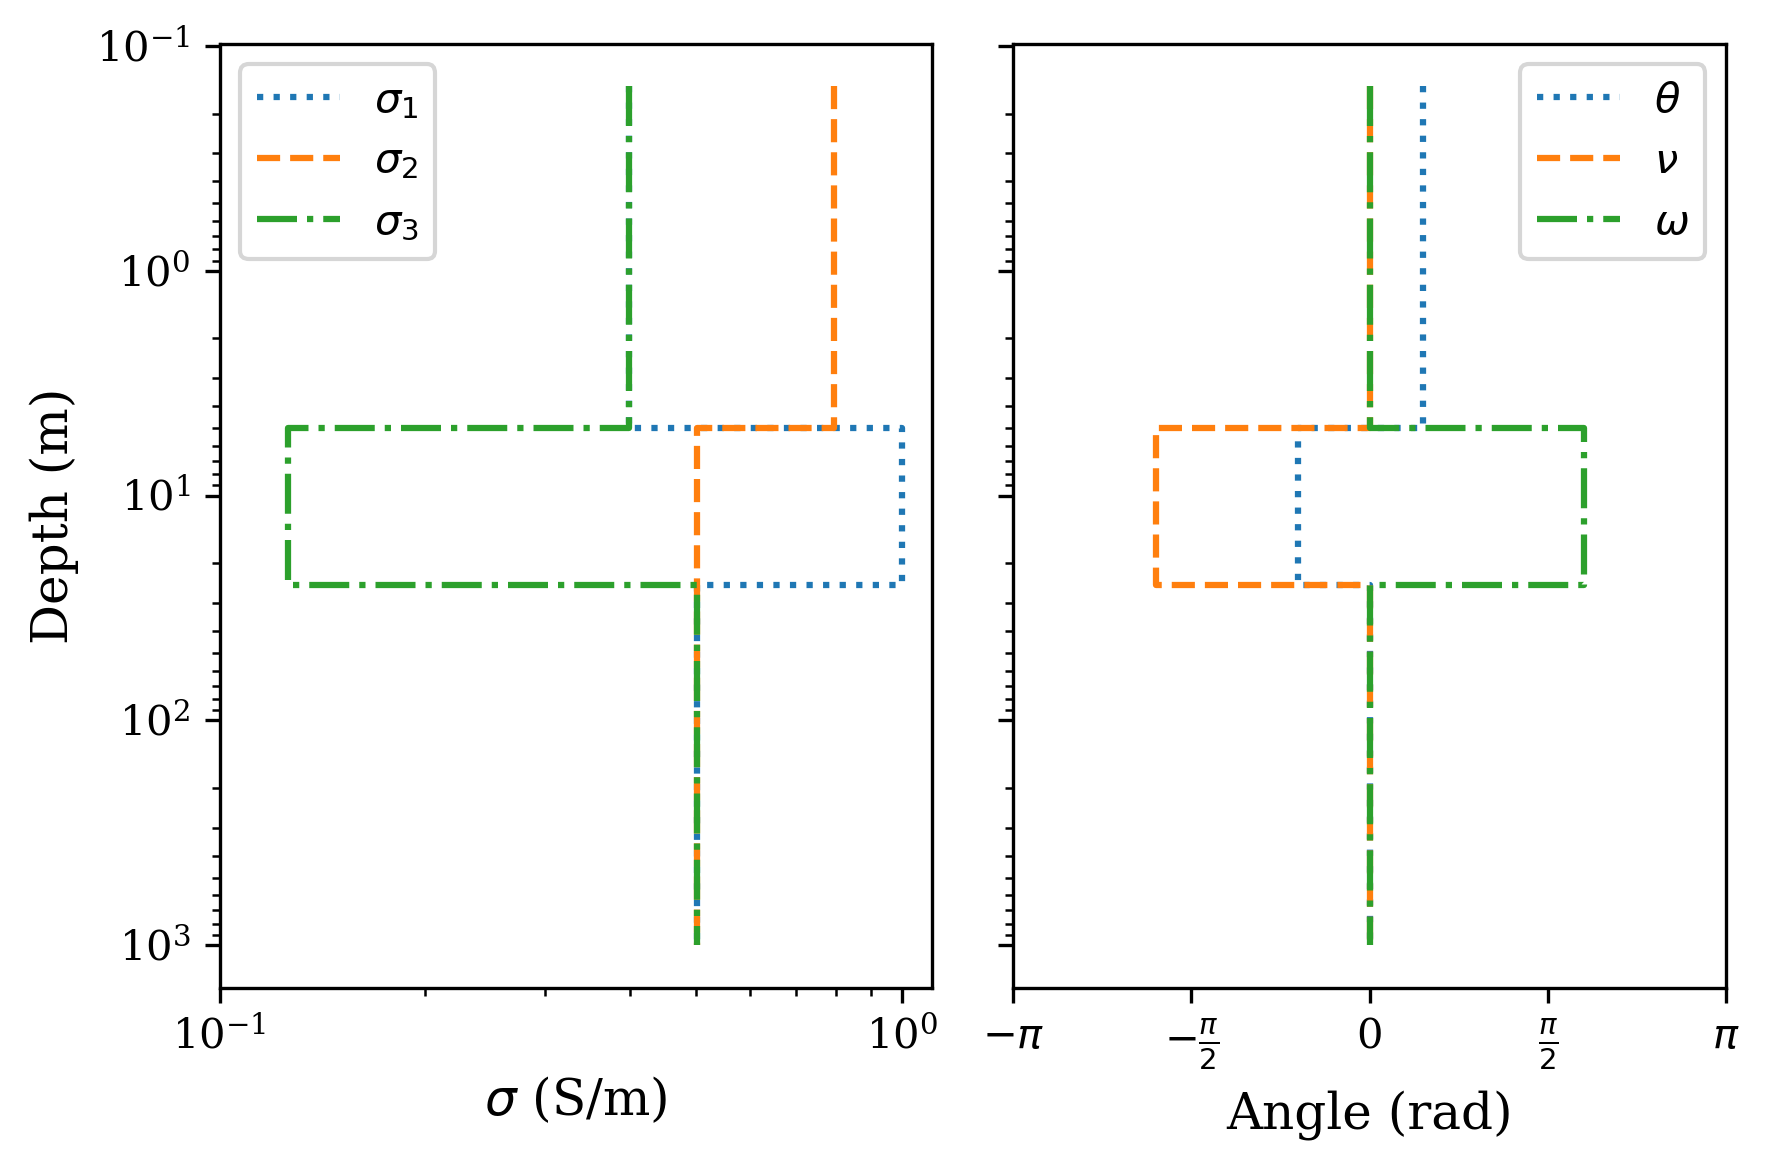

In [9]:
plot_model(m_true,z_true)

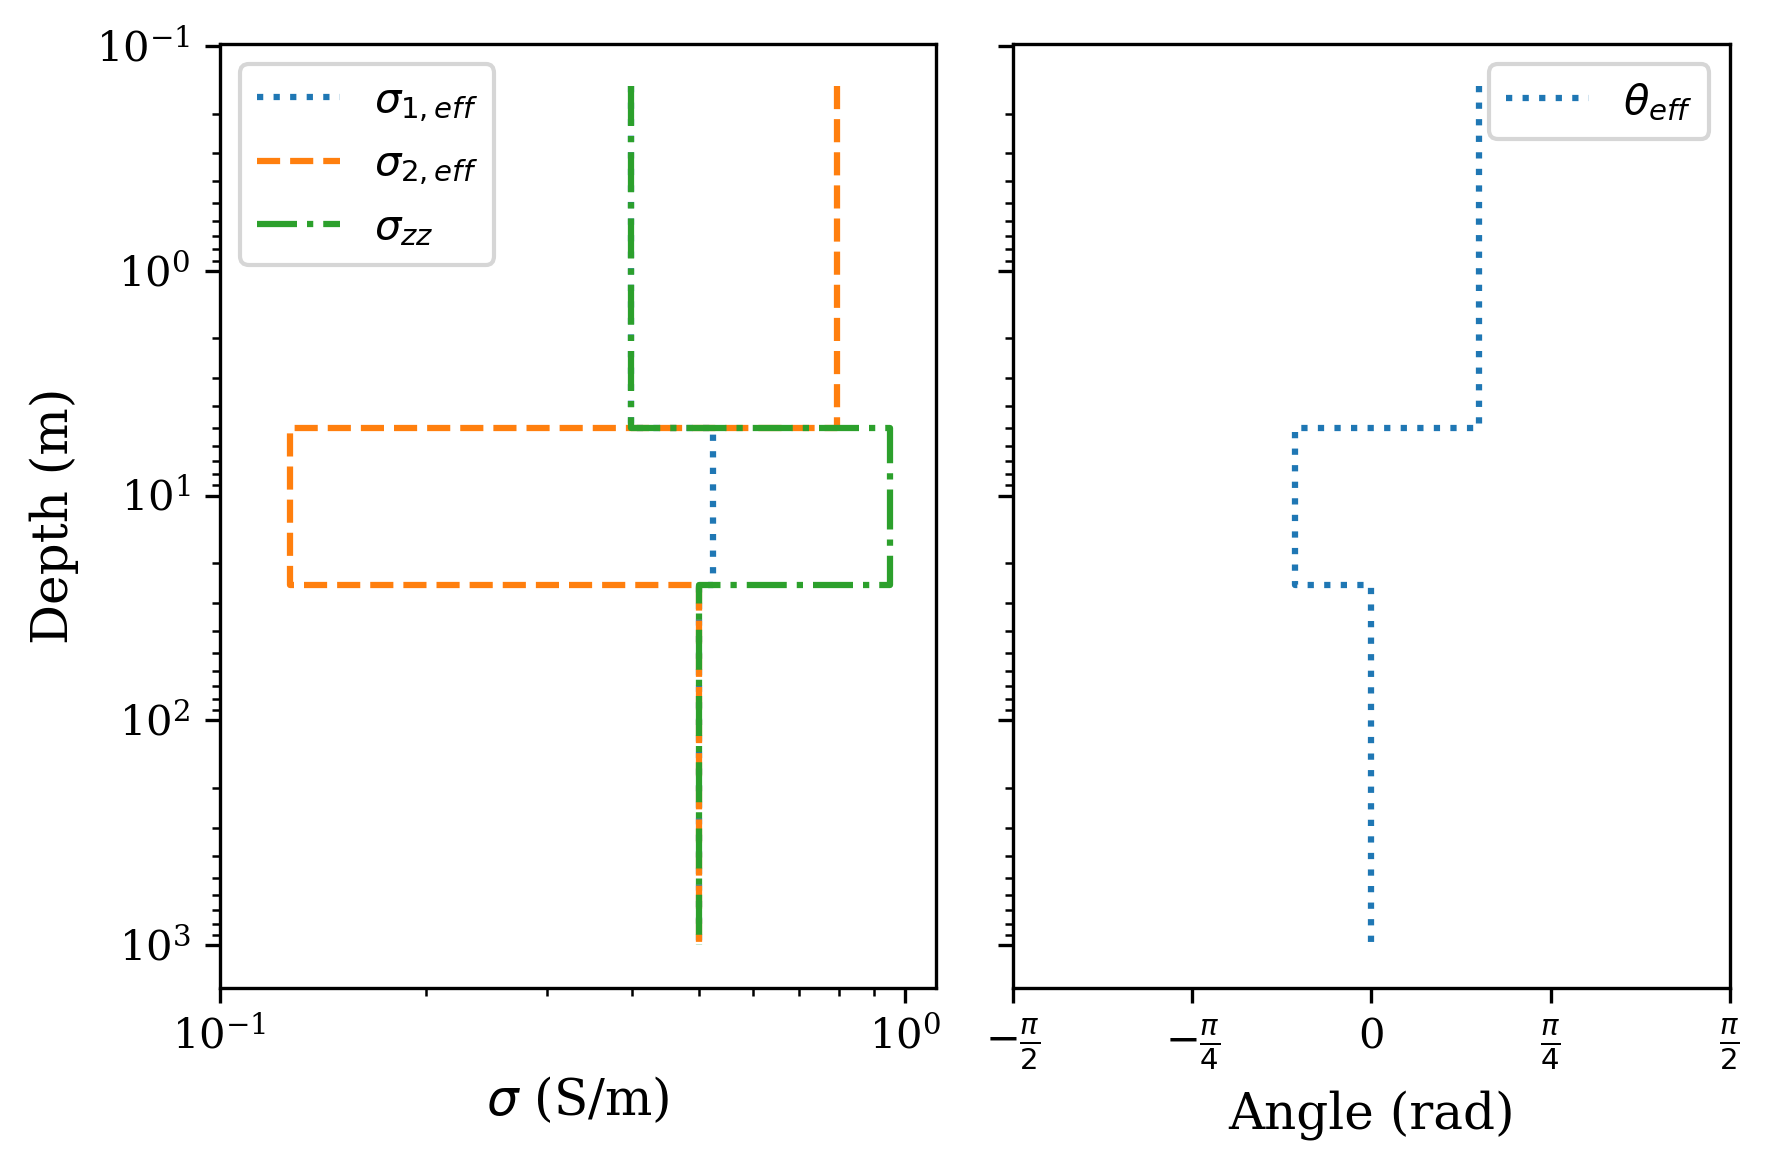

In [10]:
plot_eff_model(m_true,z_true)

Text(0, 0.5, 'a (m)')

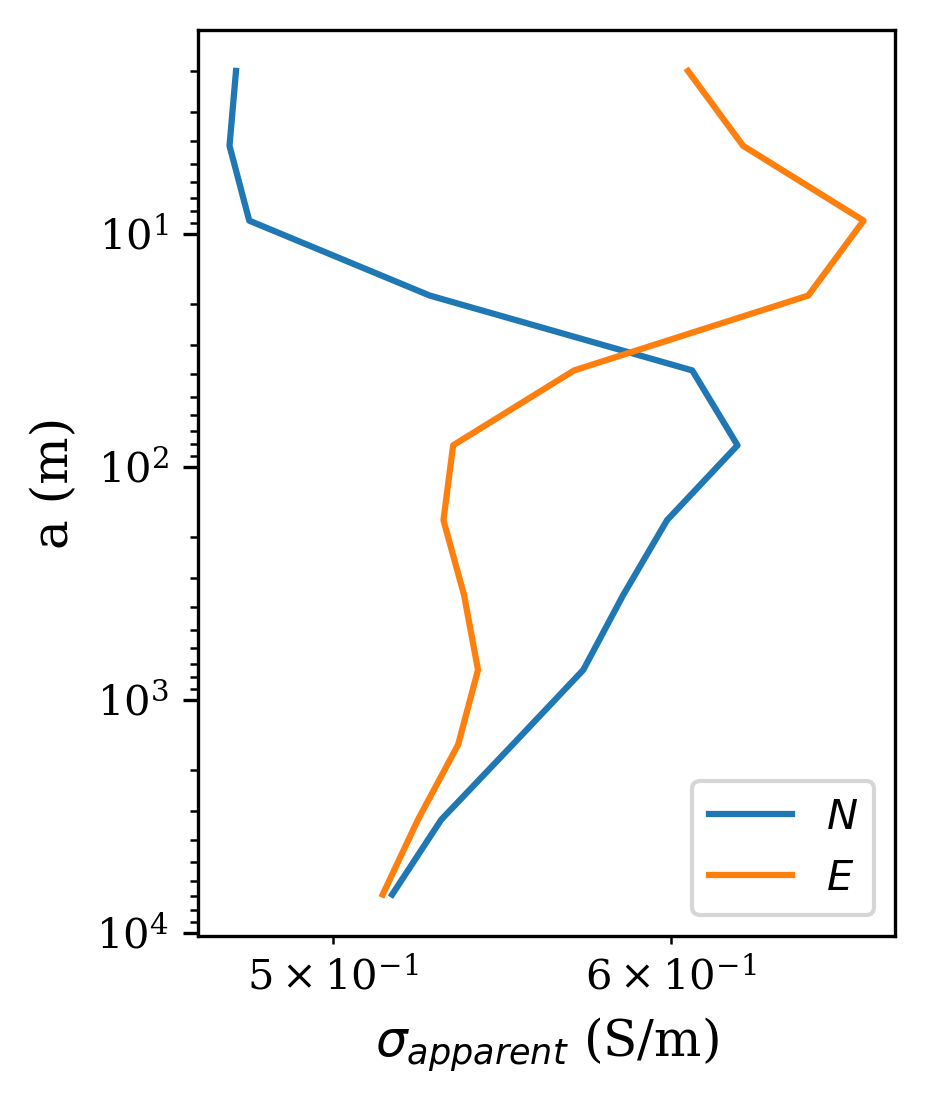

In [11]:
# plotting true and observered
data = np.load('Models/cross/data.npz')
rhoa_true = data['rhoa_true']
plt.figure(figsize=(3,4),dpi=300)
n_points = 12
plt.plot(rhoa_true[:n_points], zplotMN[:n_points], color='C0', label=r'$N$')
plt.plot(rhoa_true[15:15+n_points], zplotMN[15:15+n_points], color='C1', label=r'$E$')

#plt.plot(rhoa_obs[:n_points], zplotMN[:n_points], '+', color='C0')
#plt.plot(rhoa_obs[15:15+n_points], zplotMN[15:15+n_points], '+', color='C1')

plt.xscale('log')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel(r'$\sigma_{apparent}$ (S/m)')
plt.ylabel(r'a (m)')

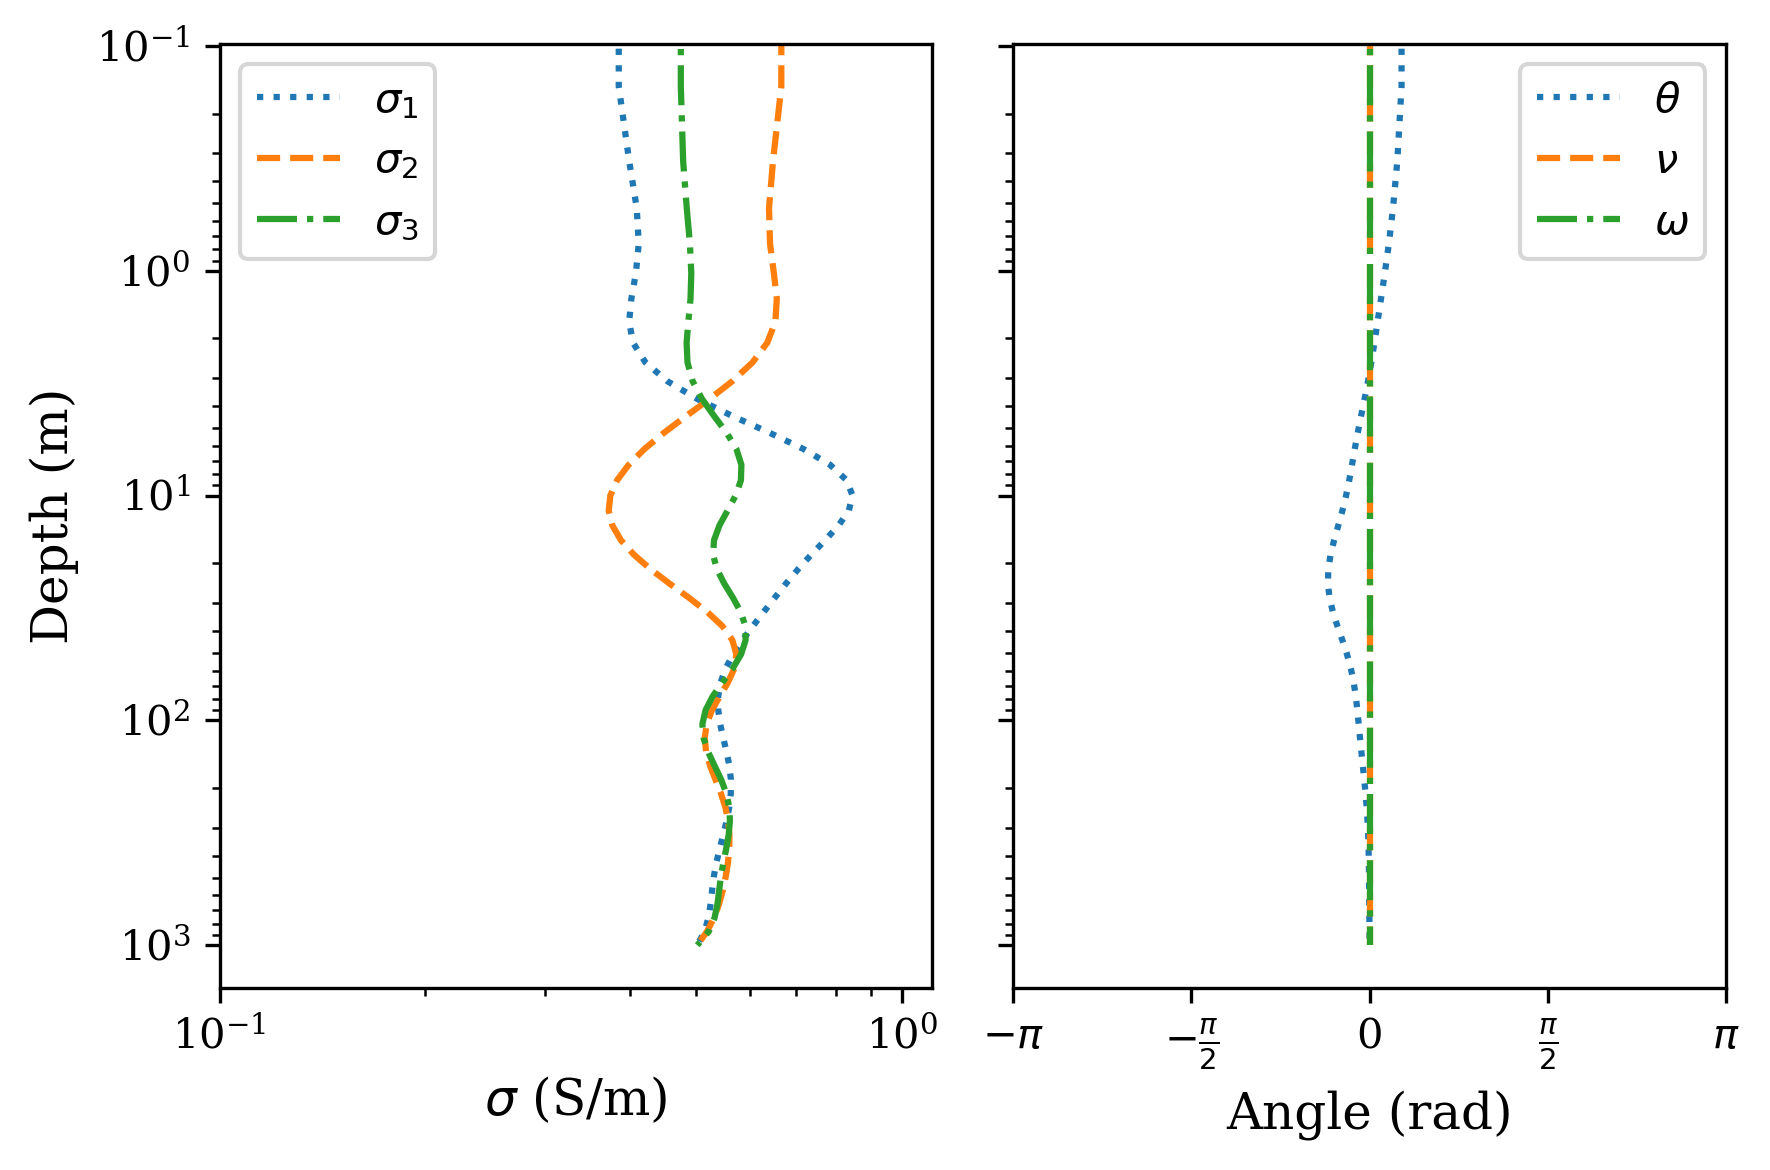

In [12]:
plot_model(m_smooth,zs)

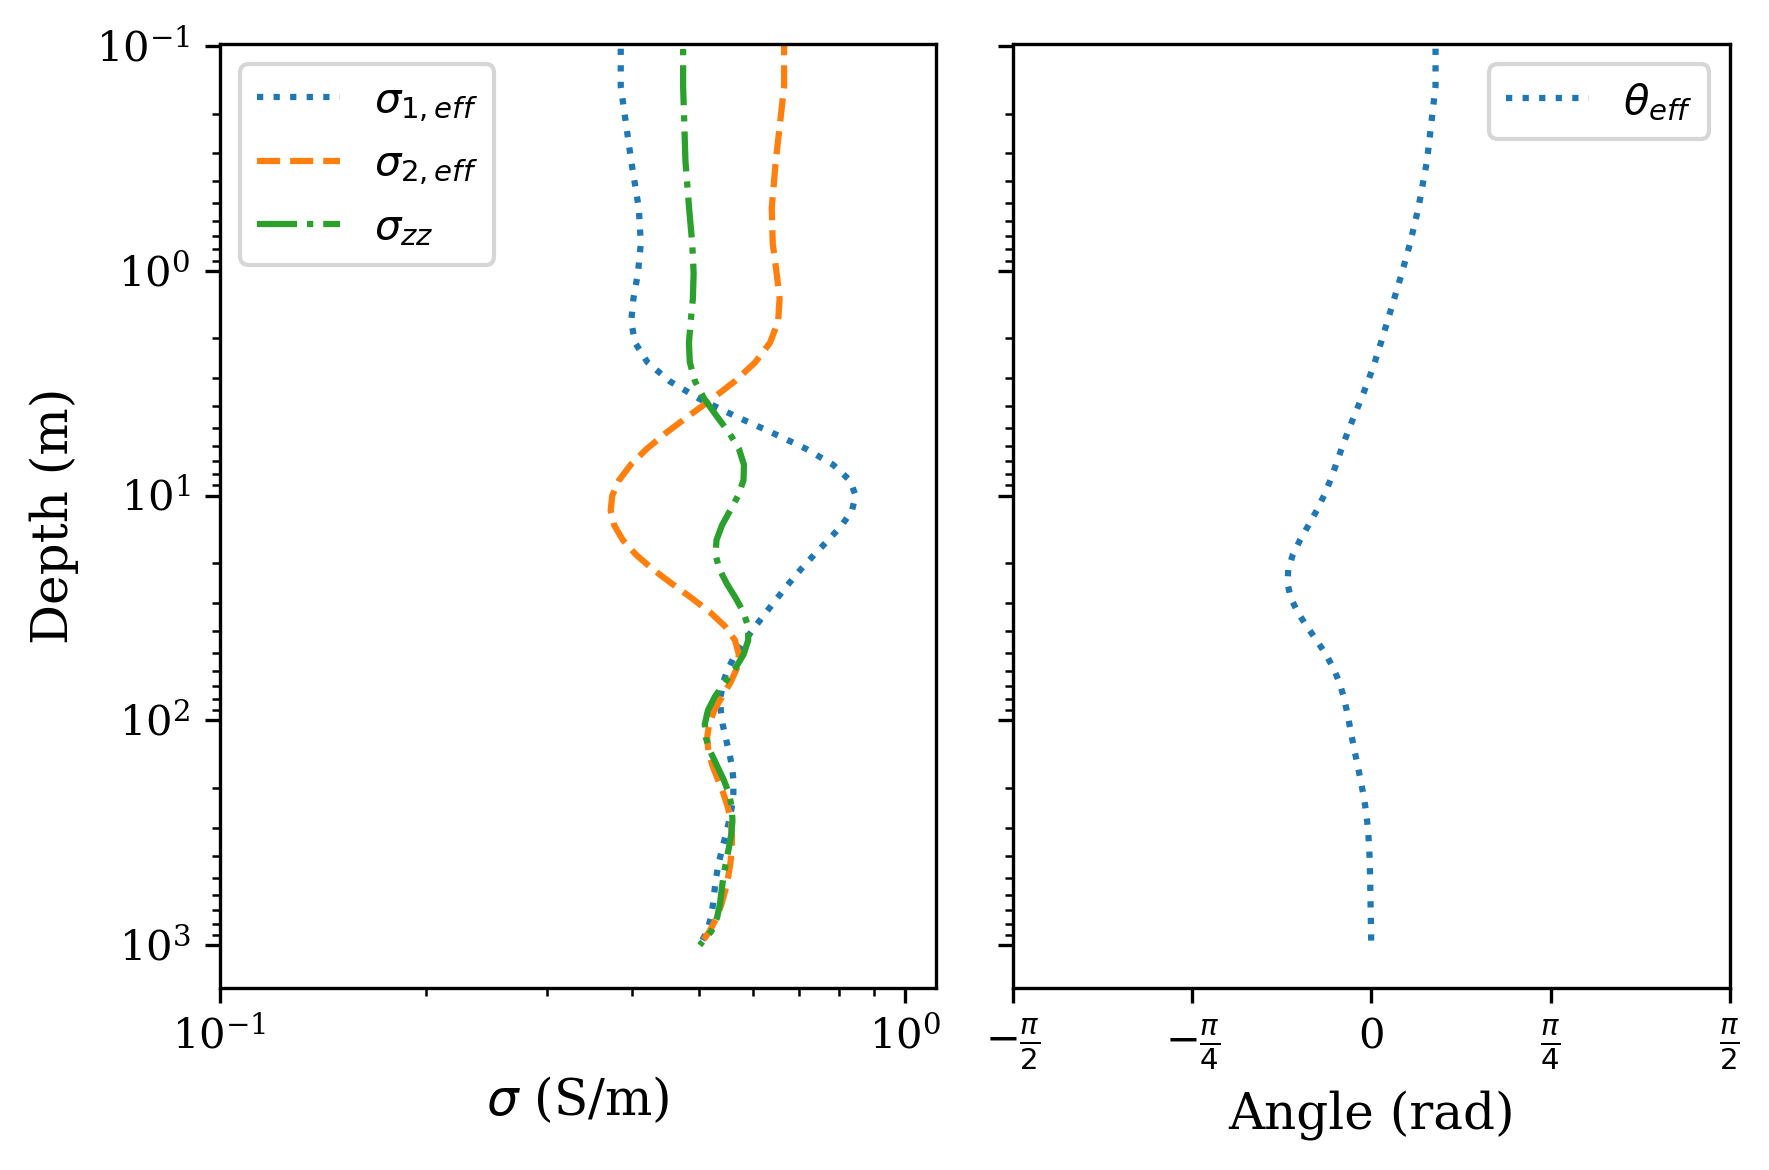

In [13]:
plot_eff_model(m_smooth,zs)

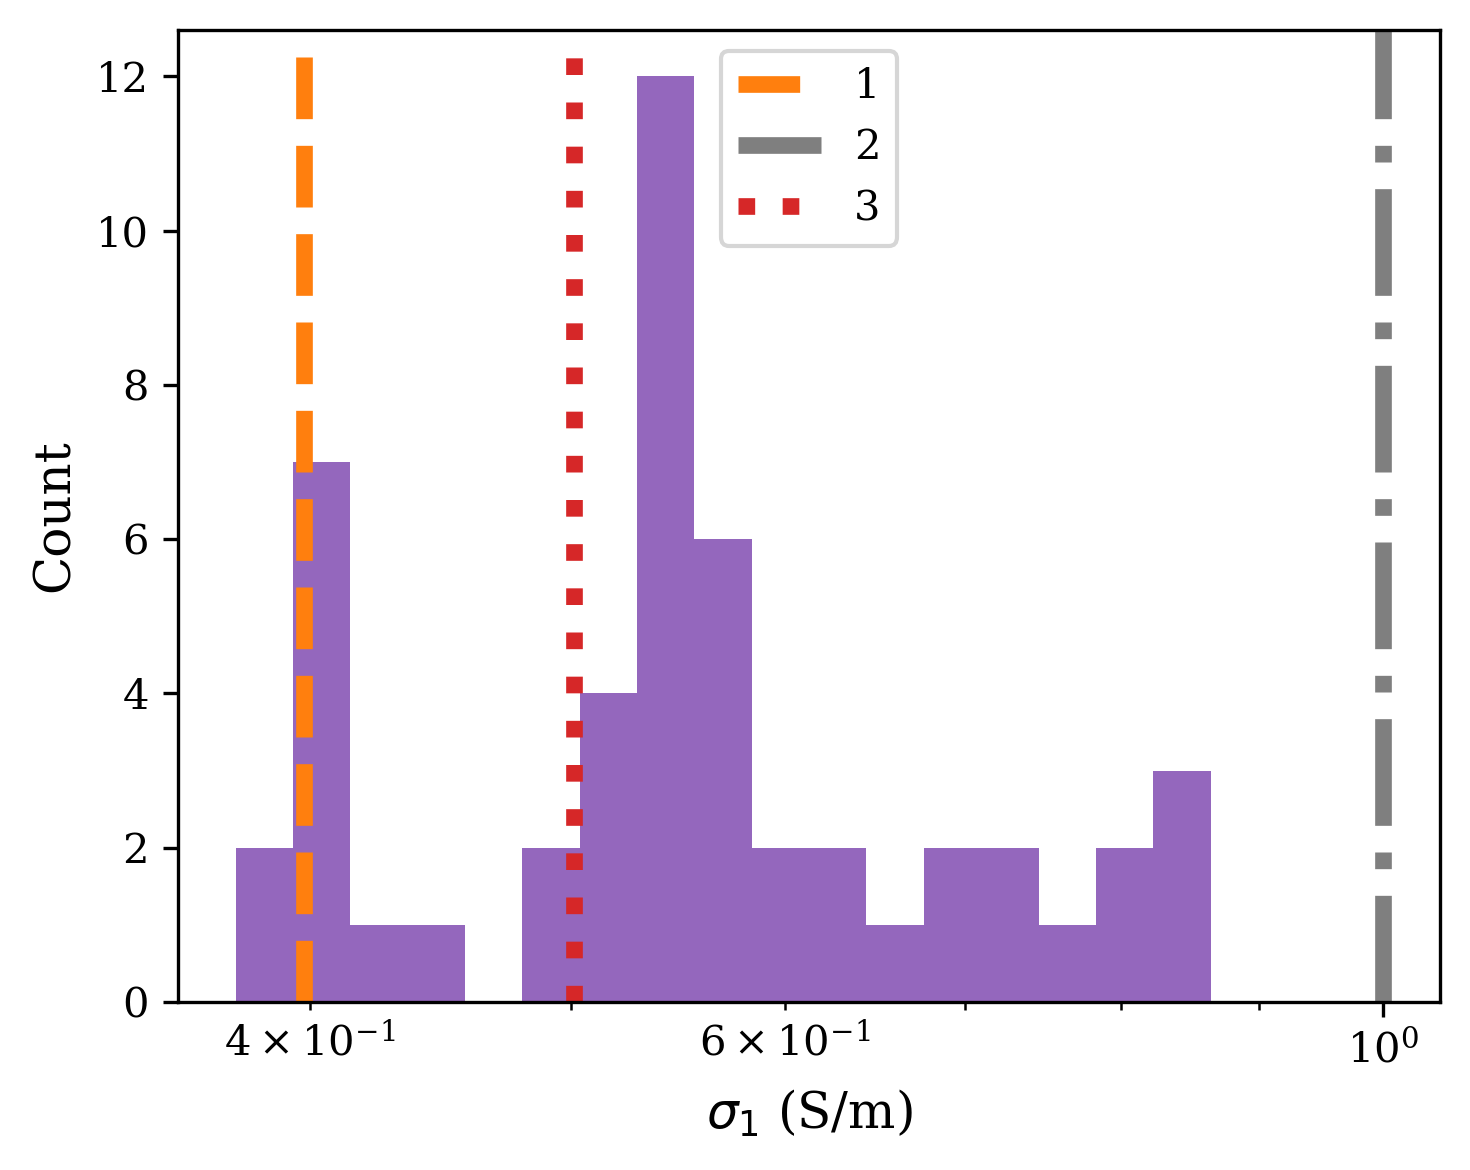

In [14]:
hist(m_smooth[0], tk[:,0],r'$\sigma_1$ (S/m)')

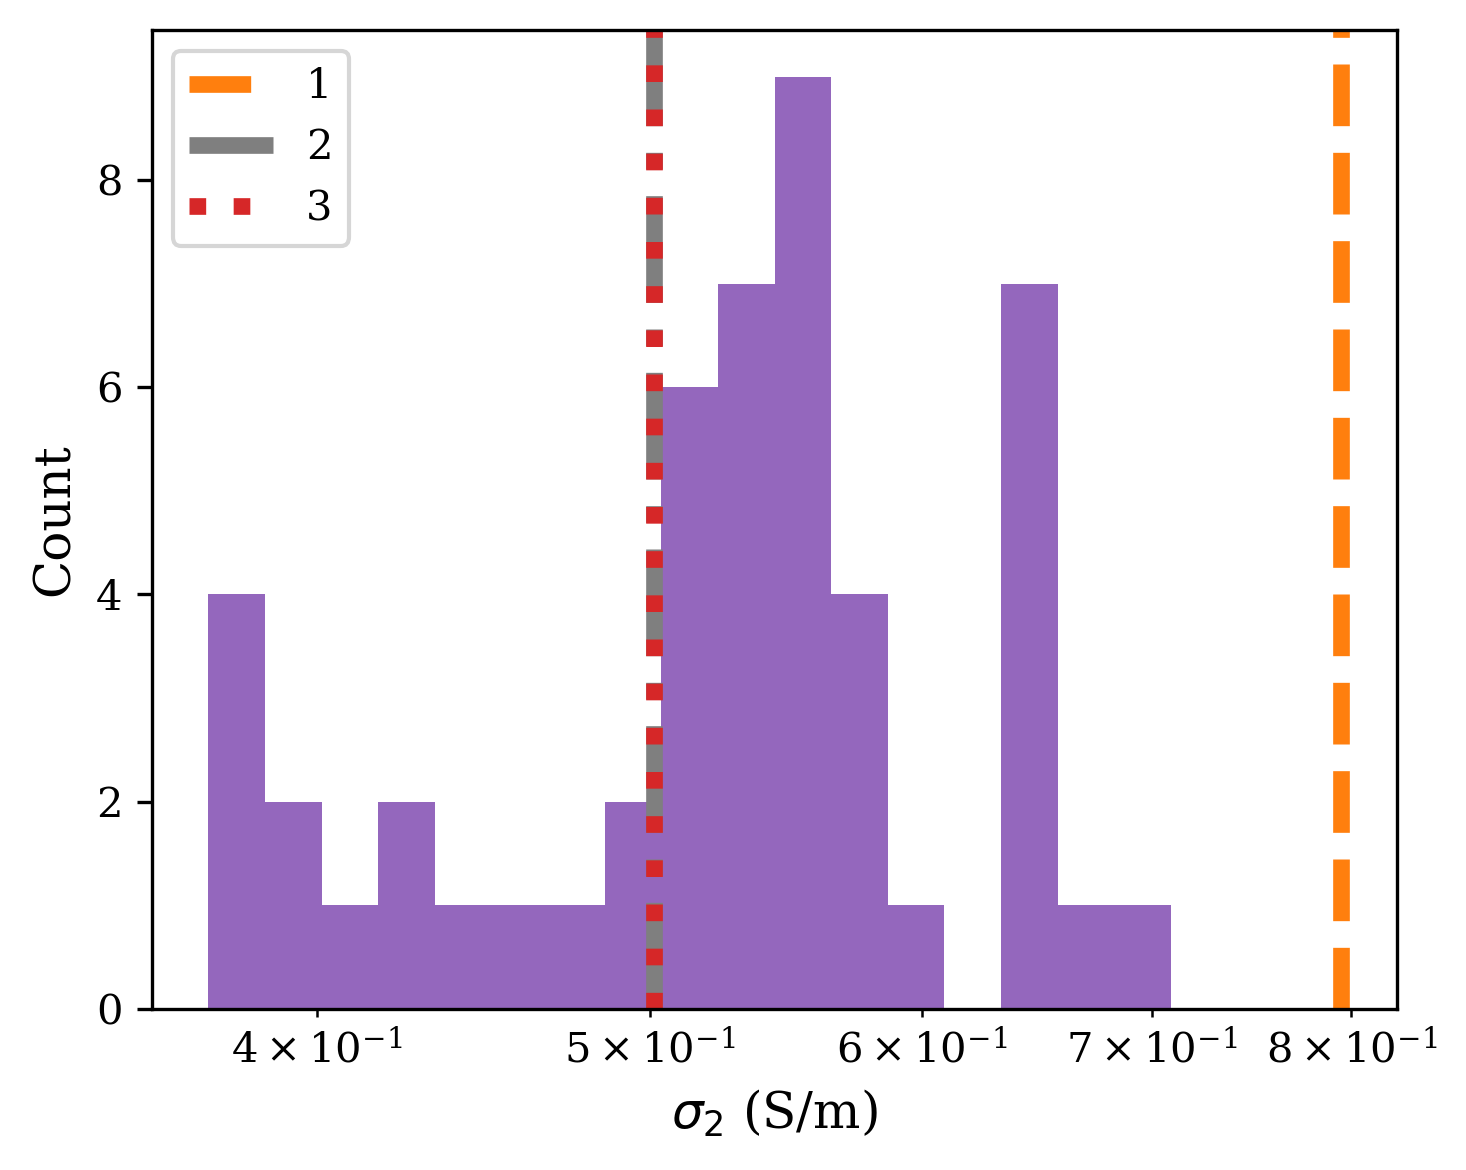

In [15]:
hist(m_smooth[1], tk[:,1],r'$\sigma_2$ (S/m)')

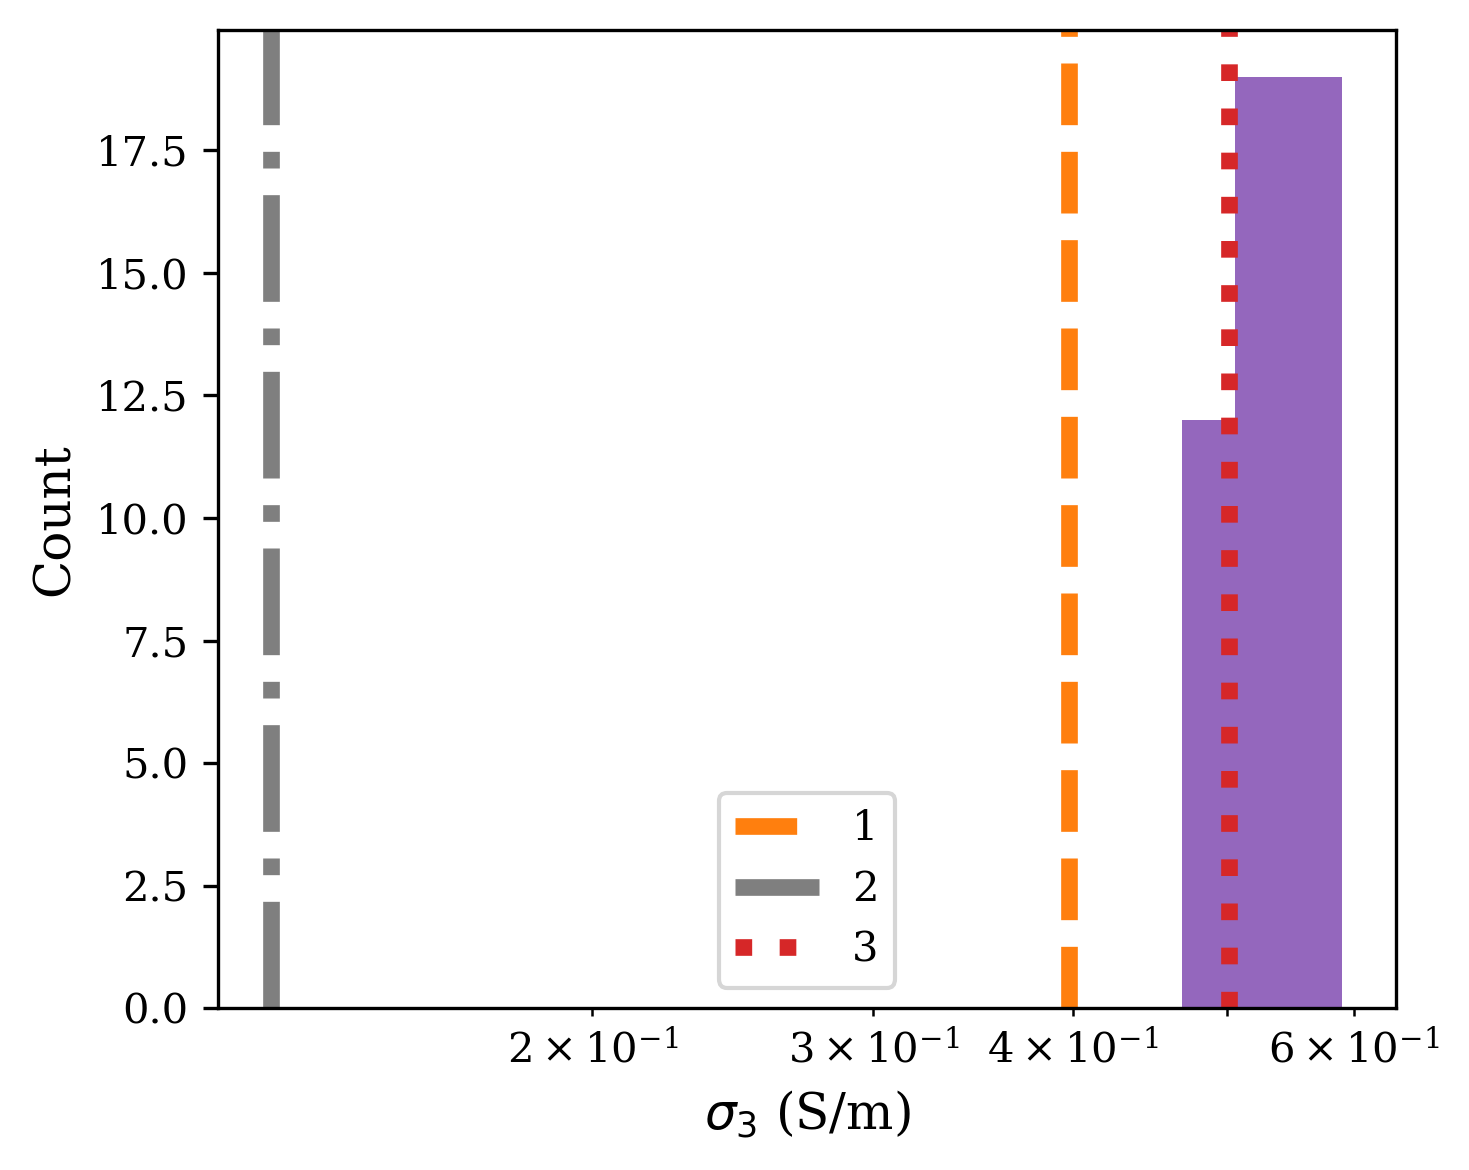

In [16]:
hist(m_smooth[2], tk[:,2], r'$\sigma_3$ (S/m)')

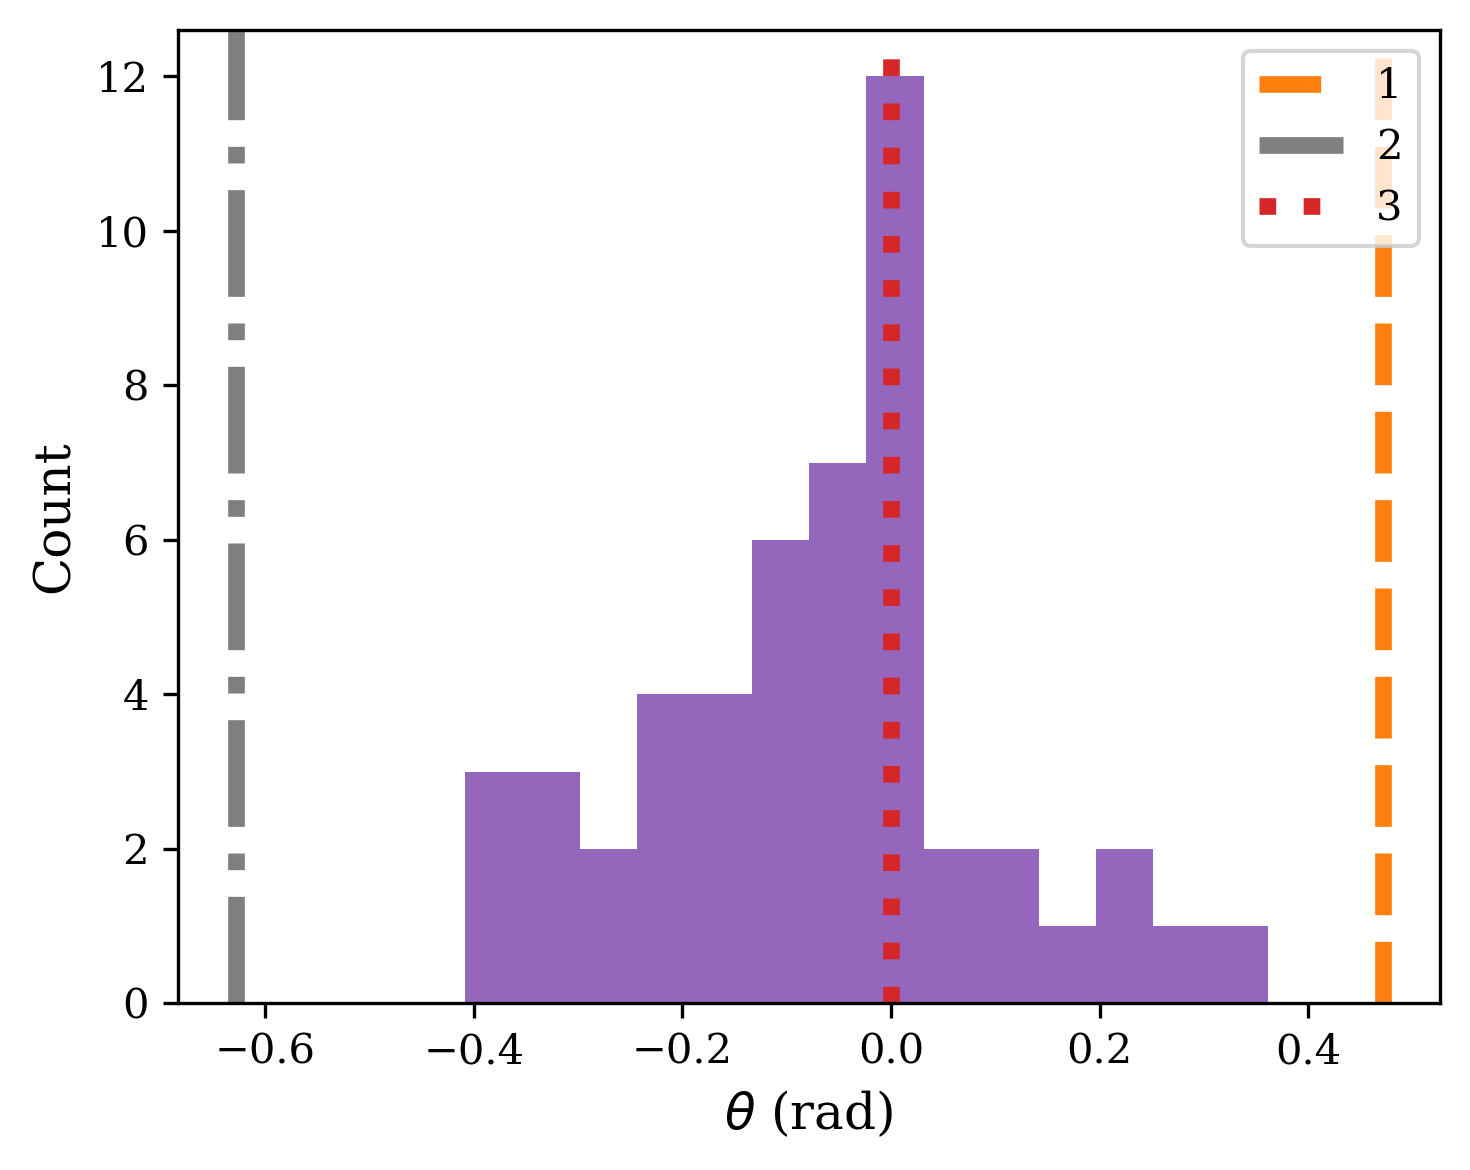

In [17]:
hist(m_smooth[3], tk[:,3], r'$\theta$ (rad)',log=False)

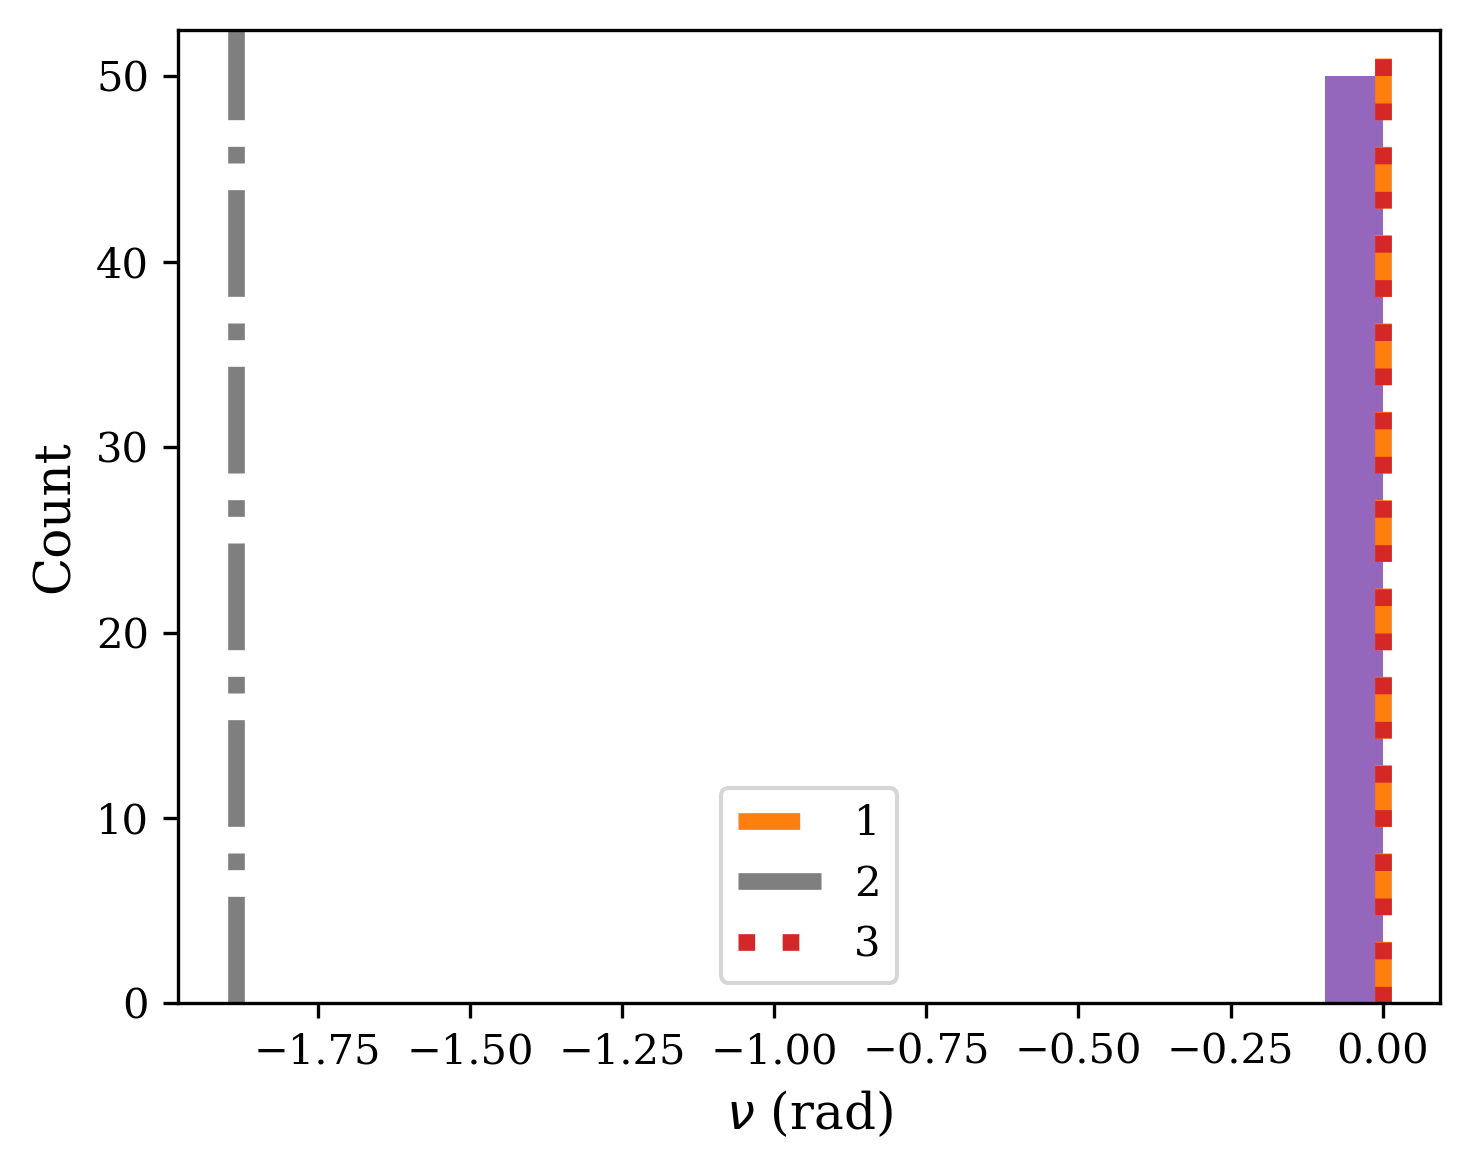

In [18]:
hist(m_smooth[4], tk[:,4], r'$\nu$ (rad)',log=False)

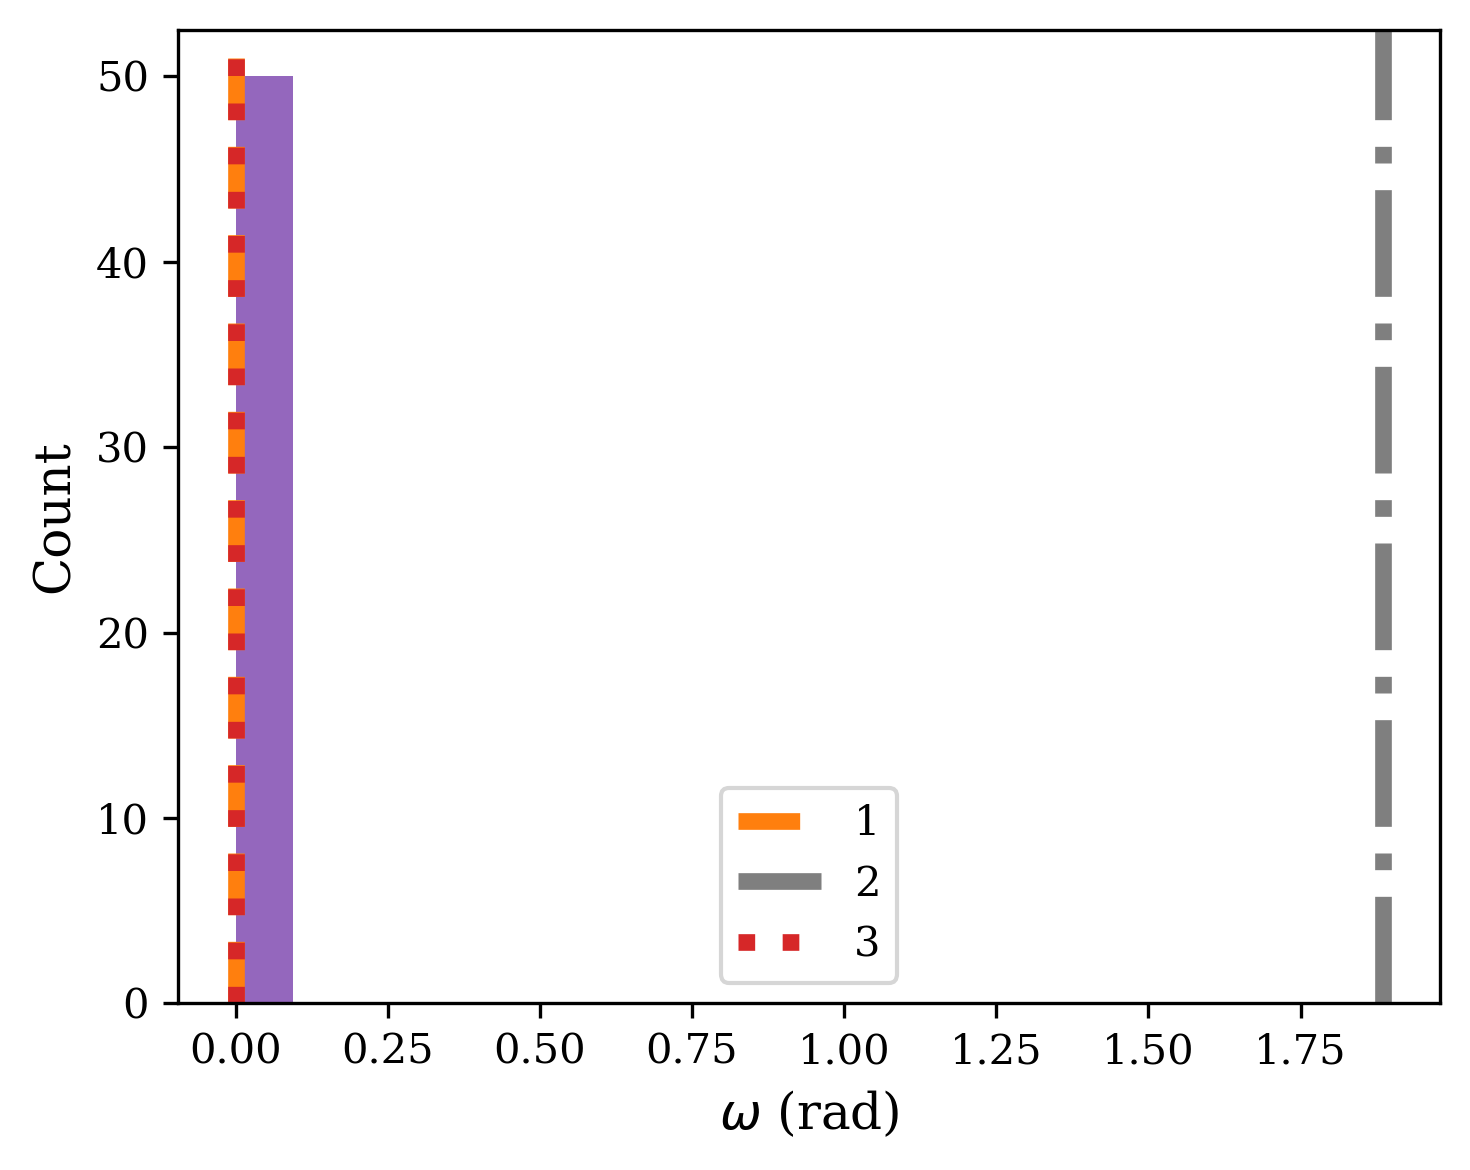

In [19]:
hist(m_smooth[5], tk[:,5], r'$\omega$ (rad)',log=False)

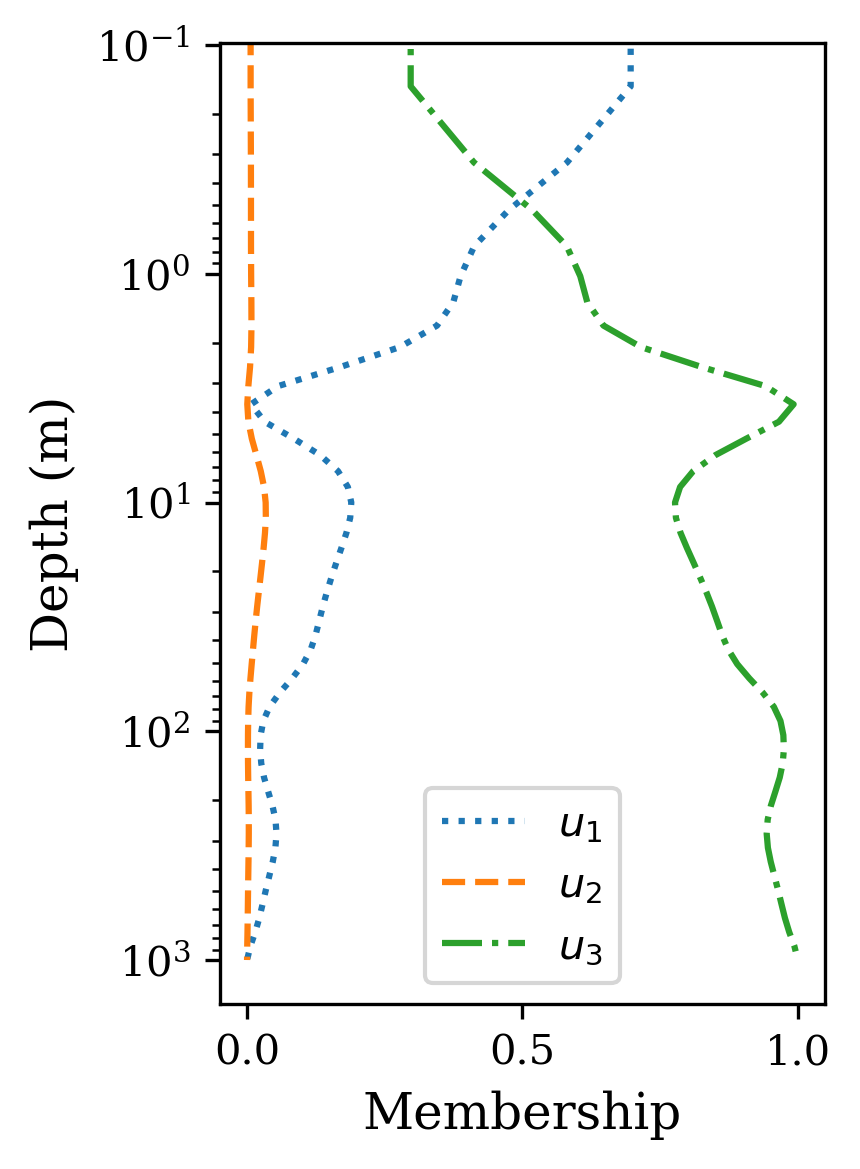

In [20]:
plot_membership(m_smooth, tk, w=np.array([1,1,1,1,1,1]))

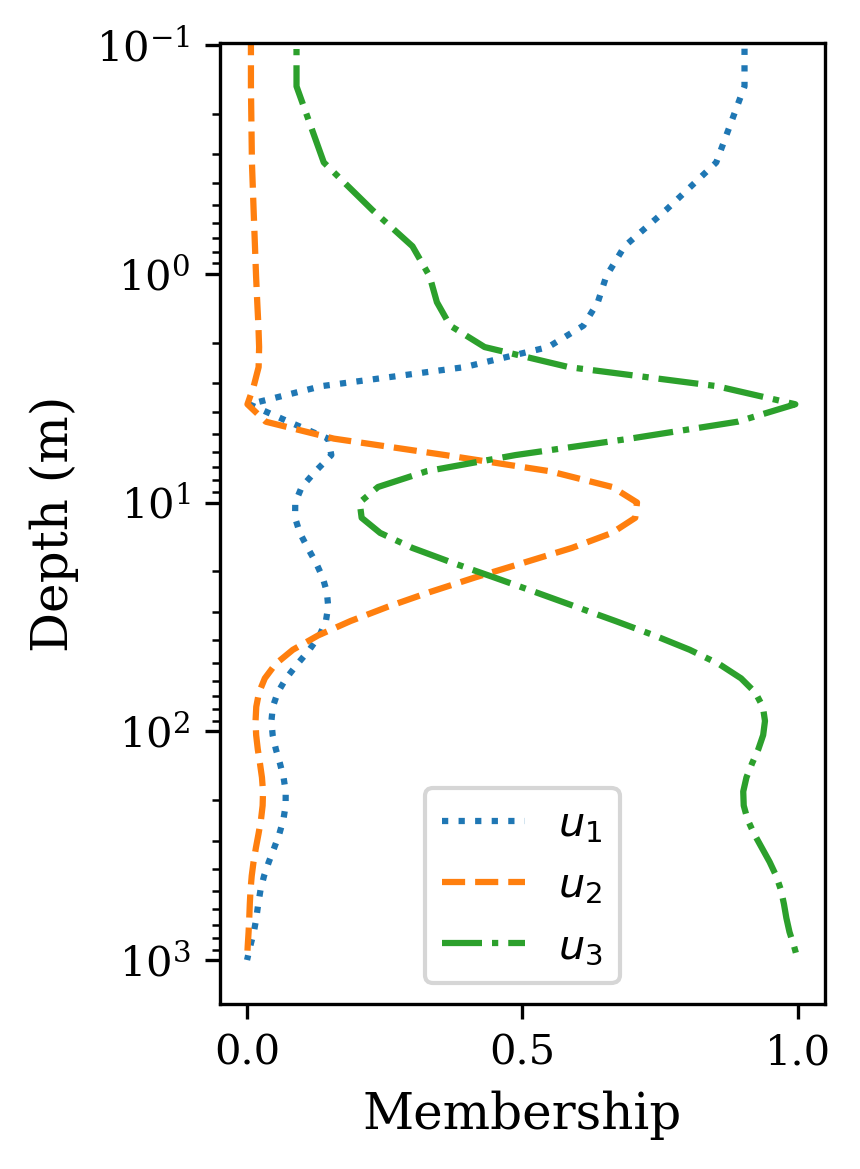

In [21]:
plot_membership(m_smooth, tk, w=np.array([500,1,1,100,1,1]))

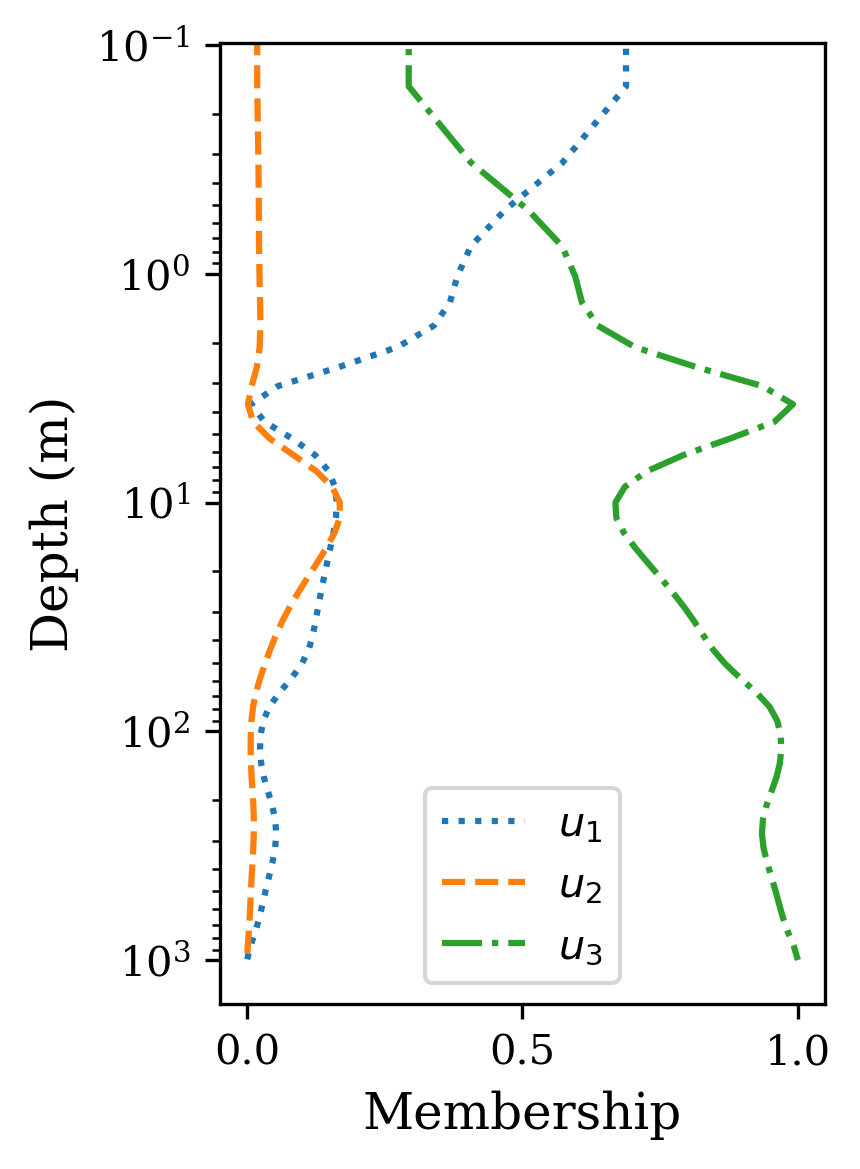

In [22]:
plot_eff_membership(m_smooth, tk, w=np.array([1,1,1,1]))

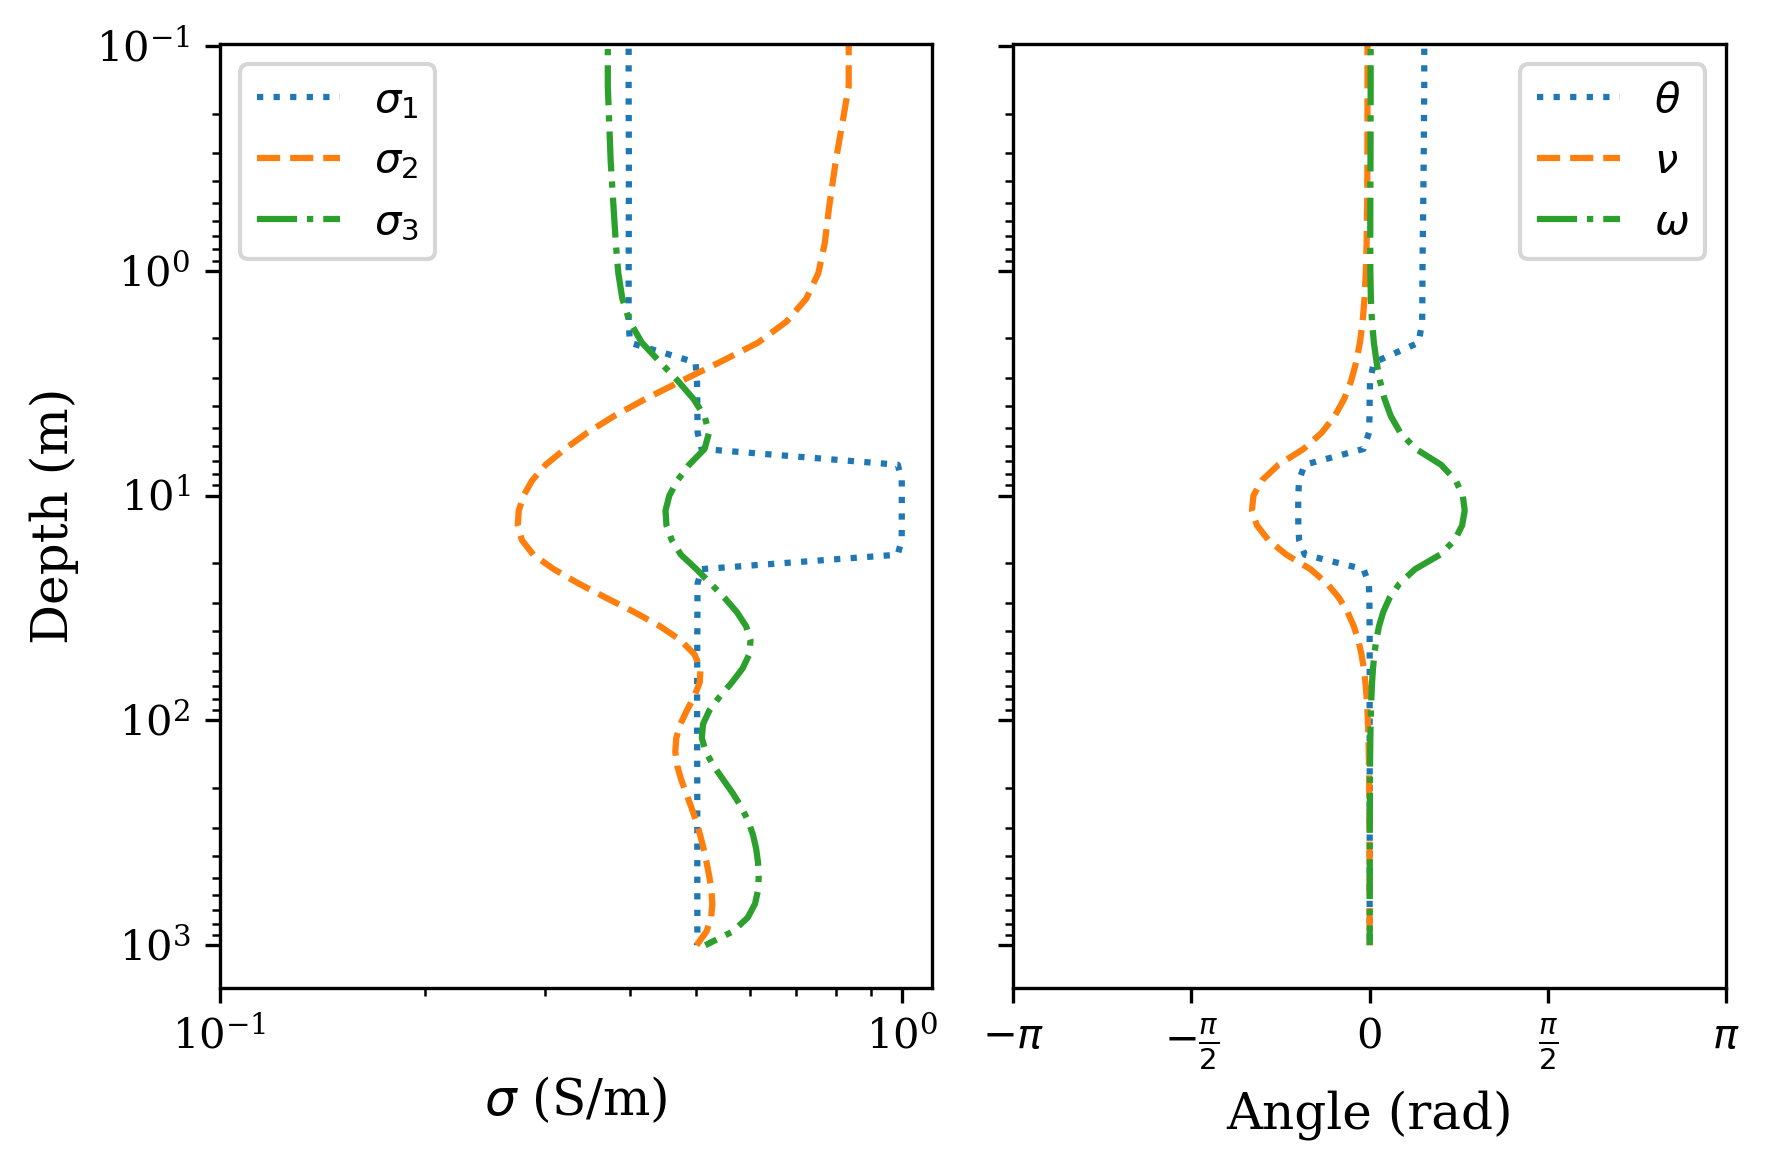

In [23]:
m_fcm = np.load('Models/cross/m_fcm1_x.npy')
m_fcm = m_fcm.reshape(6,-1).copy()
m_fcm[:3] = np.exp(m_fcm[:3])
plot_model(m_fcm,zs)

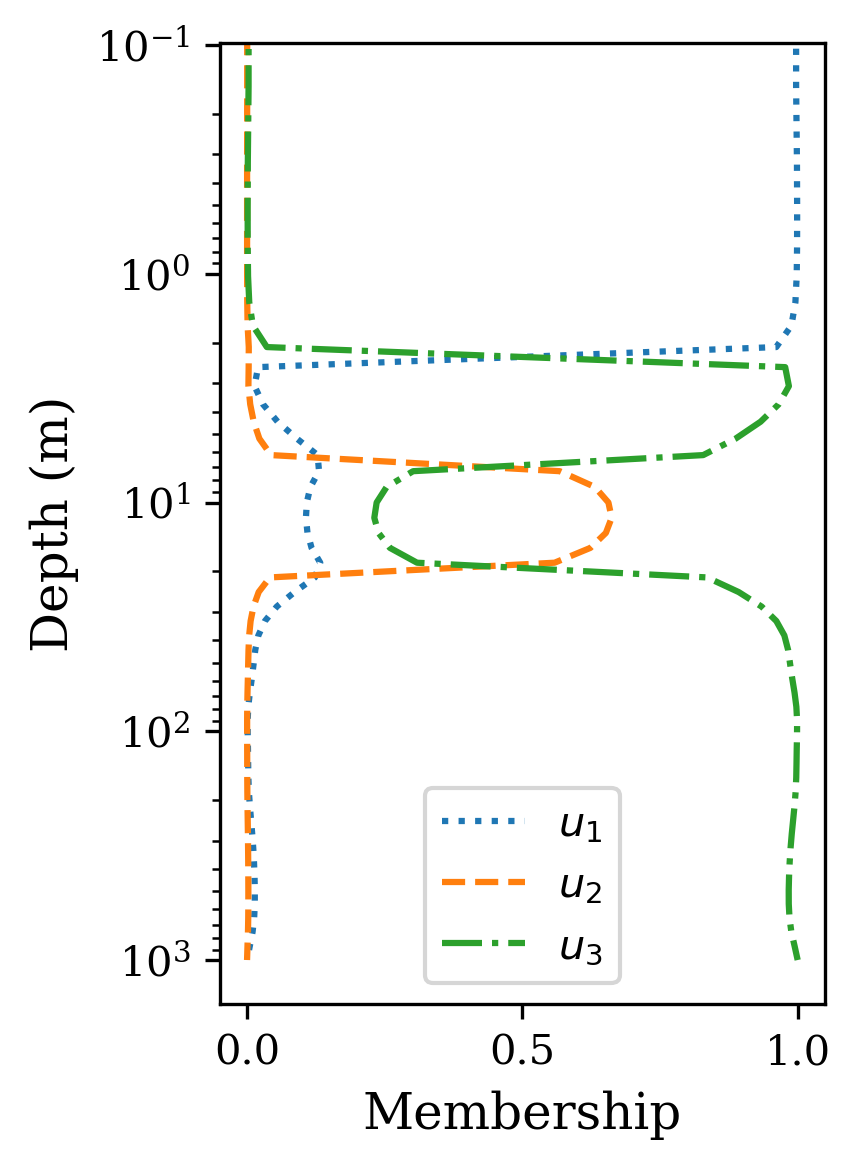

In [24]:
plot_membership(m_fcm, tk, w=np.array([10,1,1,10,1,1]))

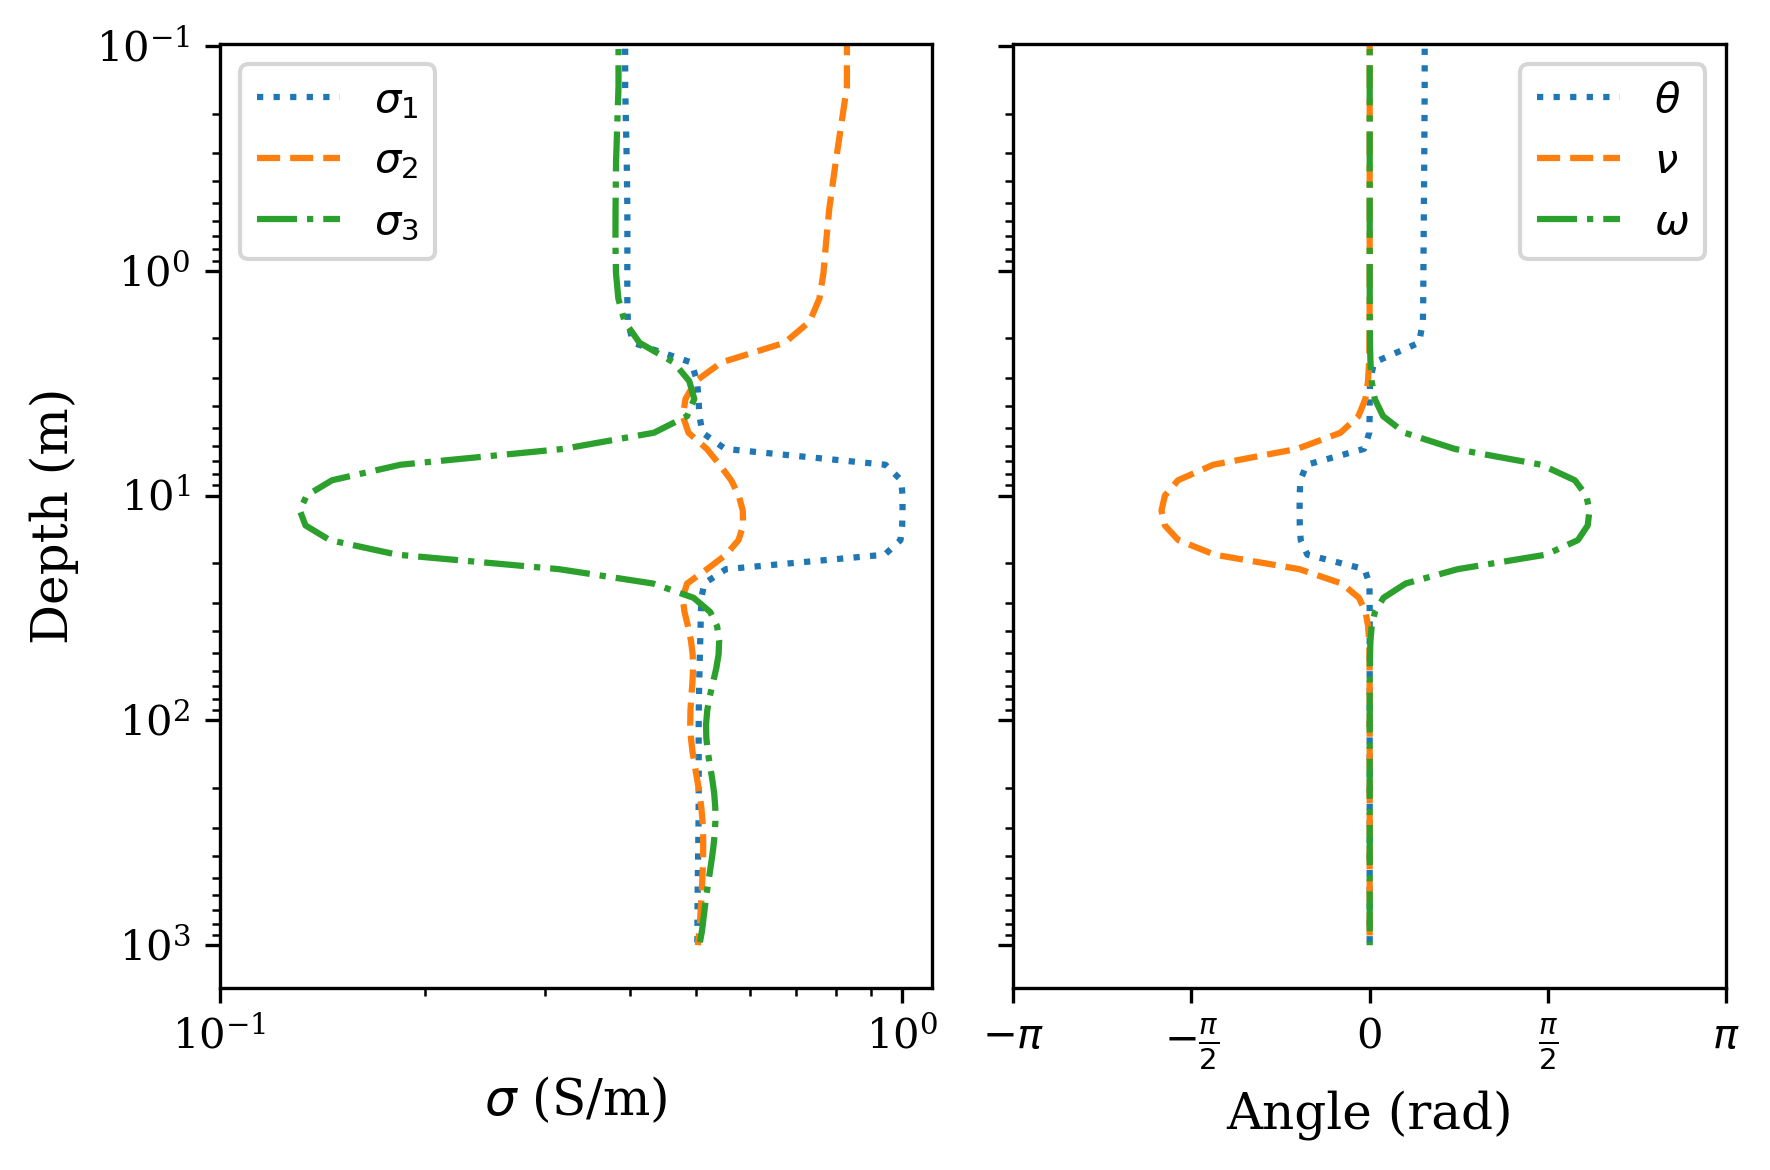

In [25]:
m_fcm2 = np.load('Models/cross/m_fcm2_x.npy').reshape(6, -1)
m_fcm2[:3] = np.exp(m_fcm2[:3])
plot_model(m_fcm2,zs)

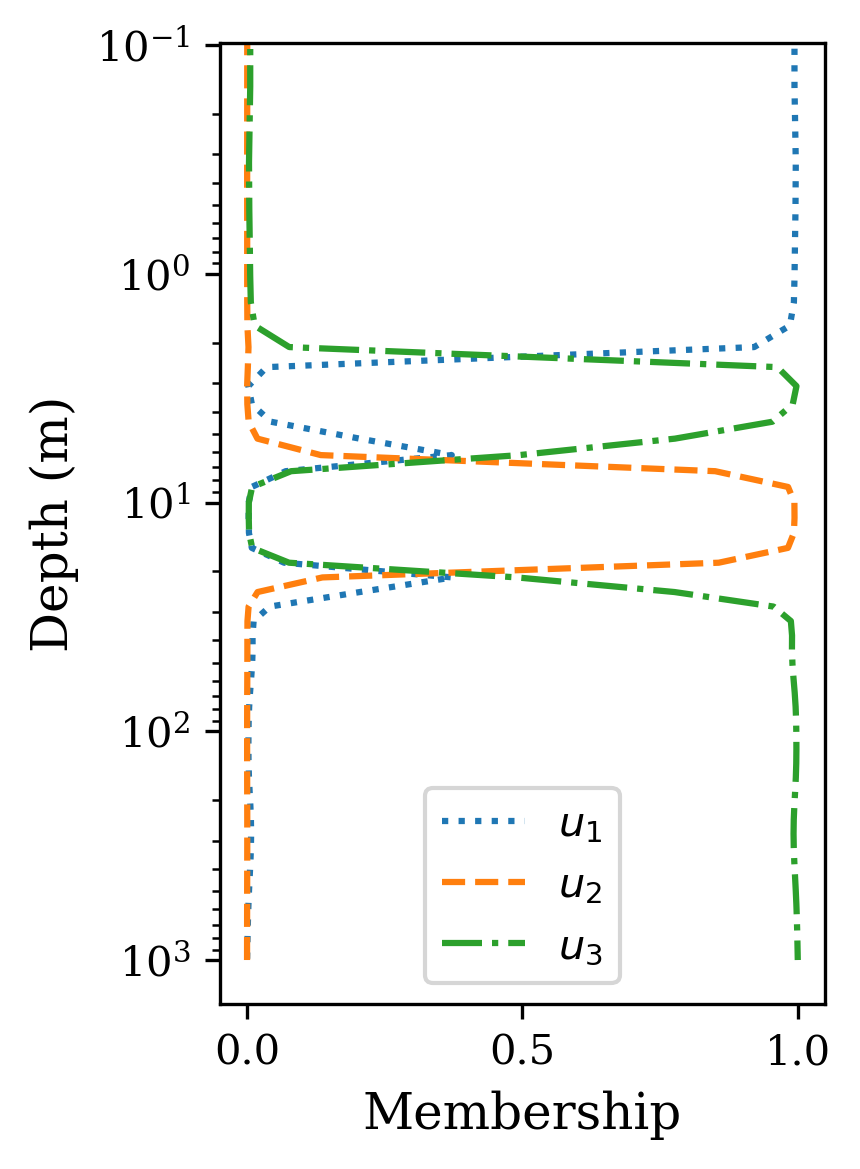

In [26]:
plot_membership(m_fcm2, tk, w=np.array([1,1,1,1,1,1]))

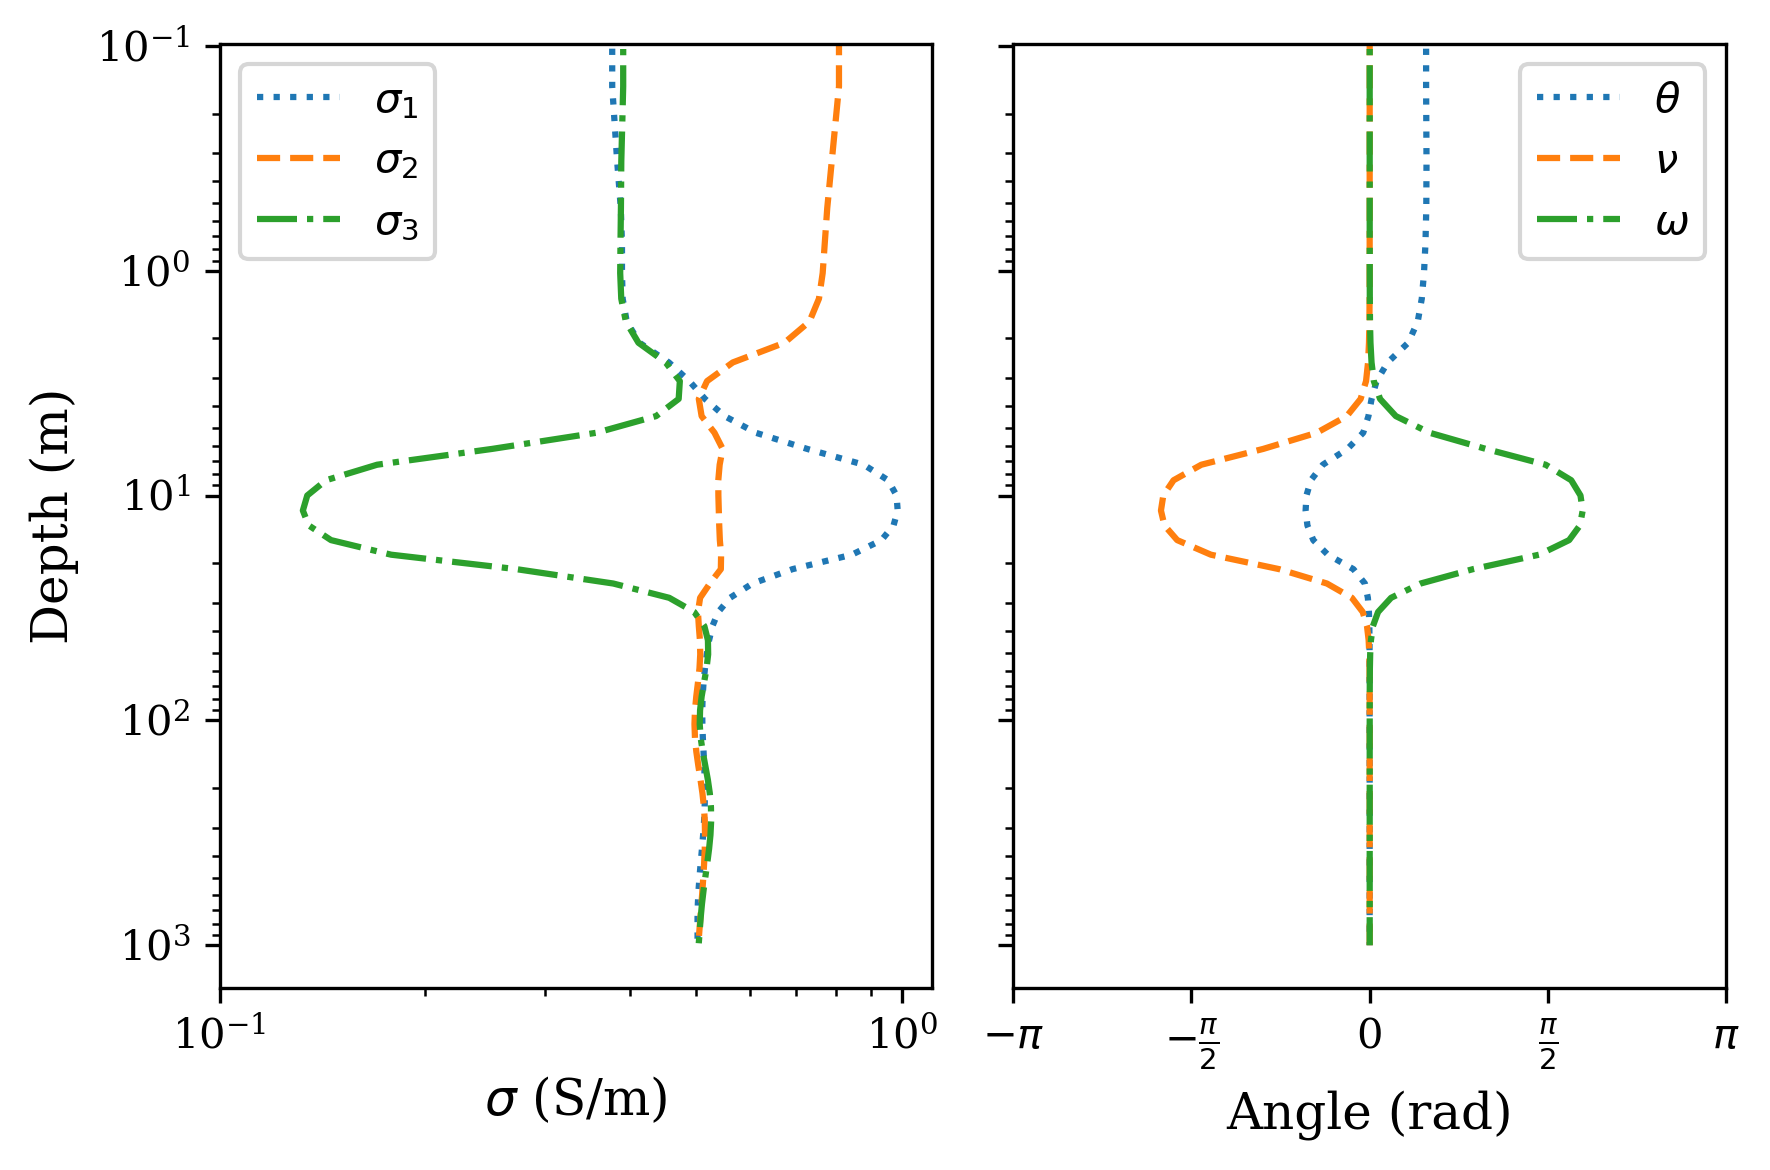

In [27]:
m_fcm3 = np.load('Models/cross/m_fcm3_x.npy').reshape(6,-1)
m_fcm3[:3] = np.exp(m_fcm3[:3])
plot_model(m_fcm3,zs)

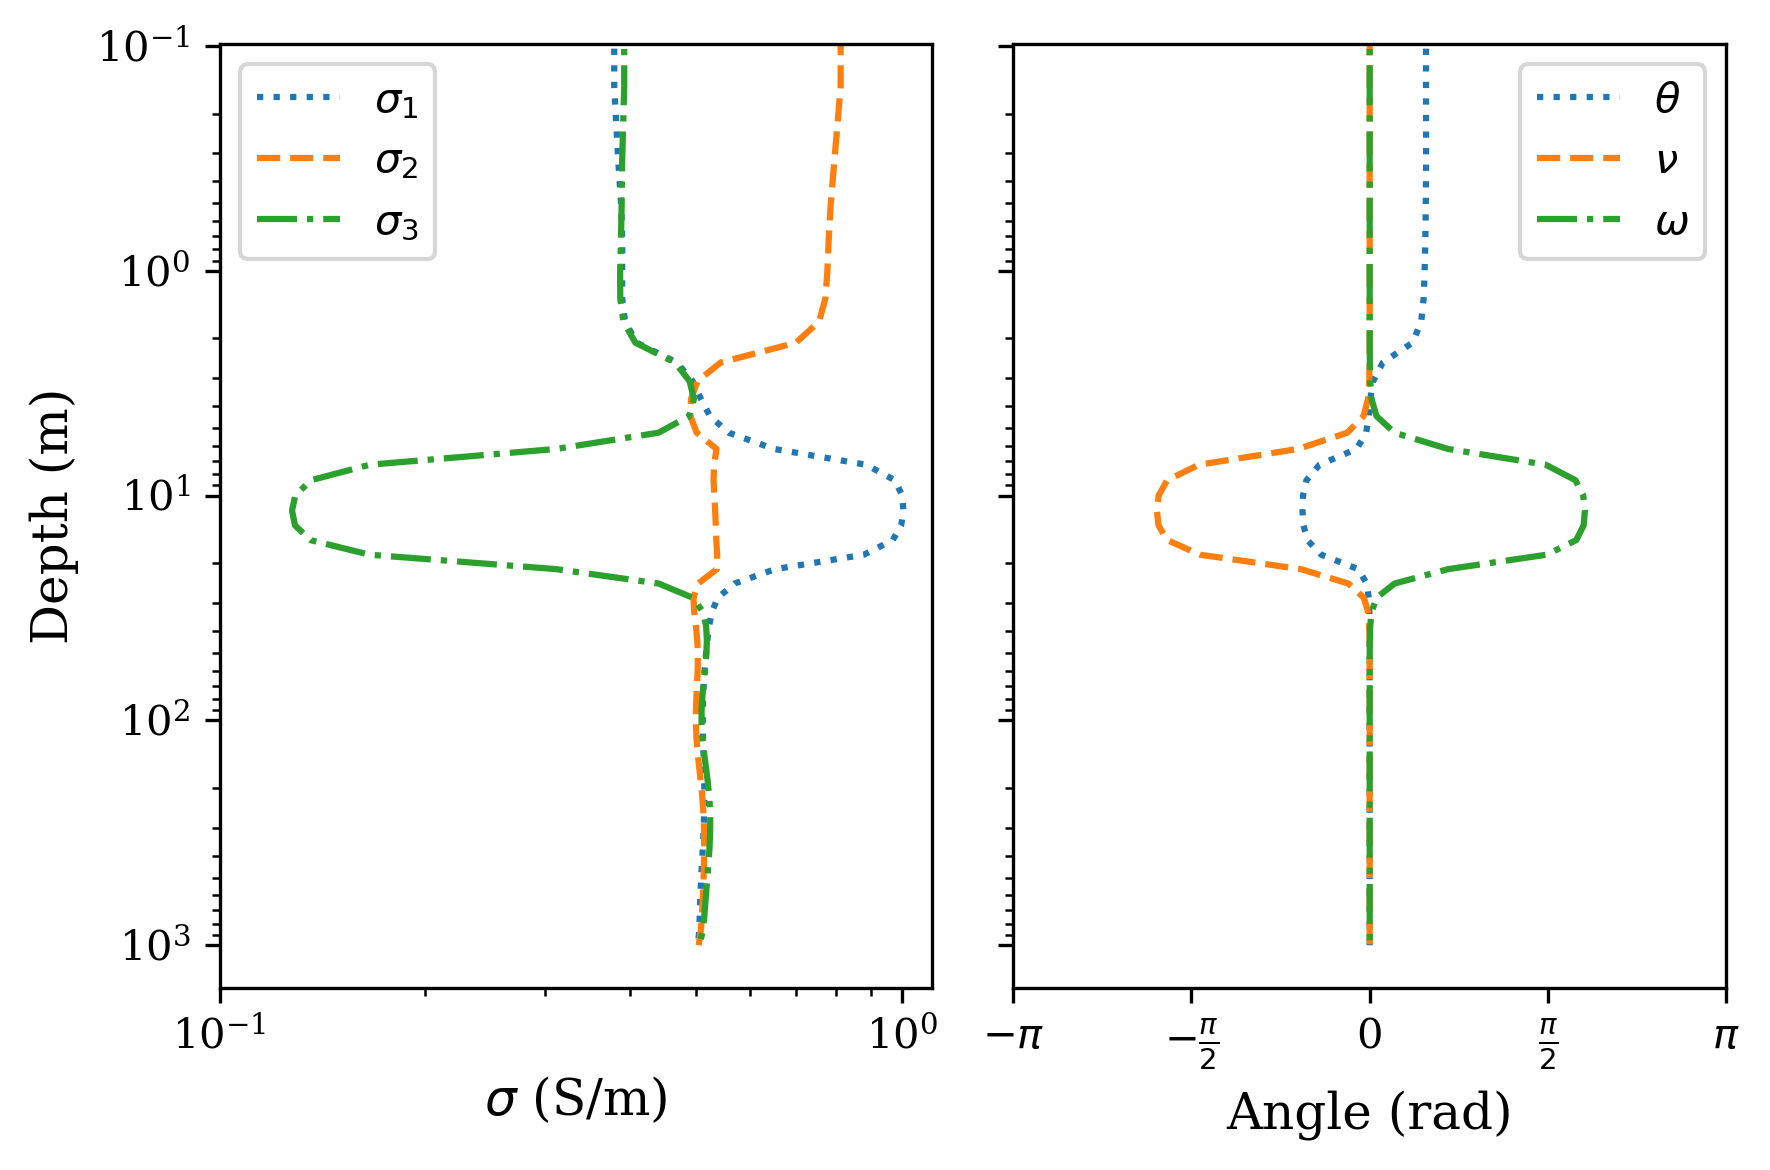

In [28]:
m_fcmF = np.load('Models/cross/m_fcm_final_x.npy').reshape(6,-1)
m_fcmF[:3] = np.exp(m_fcmF[:3])
plot_model(m_fcmF,zs)

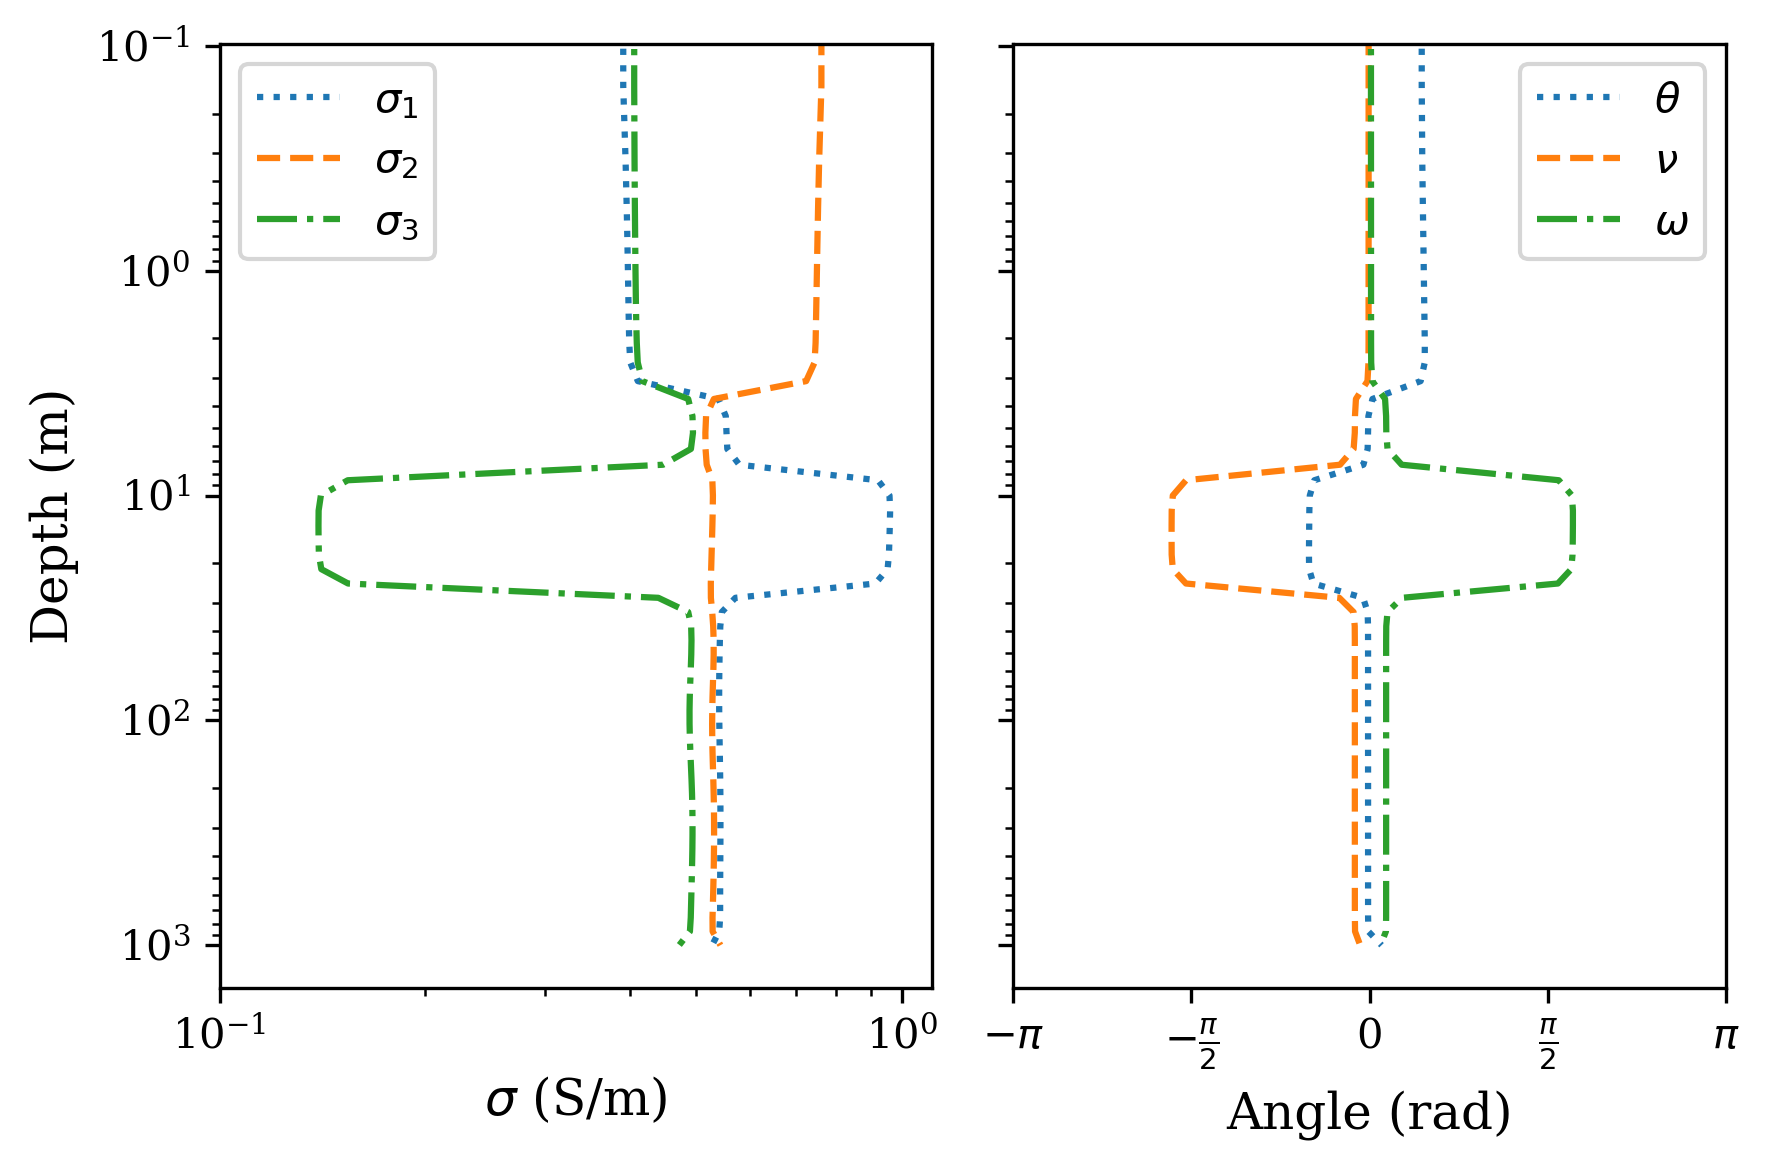

In [30]:
m_fcmE = np.load('Models/cross/m_fcm_eff.npy').reshape(6,-1)
m_fcmE[:3] = np.exp(m_fcmE[:3])
plot_model(m_fcmE, zs)

# Model 1 *

In [31]:
m_smooth = np.load('Models/star_cross/beta2.npy').reshape(6,-1)
m_smooth[:3] = np.exp(m_smooth[:3])

sig1 = [10**-0.4, 10**0.0, 10**-.3]
sig2 = [10**-0.1, 10**-.3, 10**-.3]
sig3 = [10**-0.4, 10**-.9, 10**-.3]
alpha = [3*np.pi/20, -np.pi/5, 0]
betas = [0, -3*np.pi/5, 0]
gamma = [0, 3*np.pi/5, 0]
z = [0, 5, 25]

x_lims_sig = (0.1, 1.109174815262401)
tk = np.c_[sig1, sig2, sig3, alpha, betas, gamma]

z_true = [zs[1], z[1], z[1], z[2], z[2], zs[-1]]
s1_true_plot = [sig1[0],sig1[0],sig1[1],sig1[1],sig1[2],sig1[2]]
s2_true_plot = [sig2[0],sig2[0],sig2[1],sig2[1],sig2[2],sig2[2]]
s3_true_plot = [sig3[0],sig3[0],sig3[1],sig3[1],sig3[2],sig3[2]]
nu_true_plot = [alpha[0], alpha[0], alpha[1], alpha[1], alpha[2], alpha[2]]
phi_true_plot = [betas[0], betas[0], betas[1], betas[1], betas[2], betas[2]]
omega_true_plot = [gamma[0], gamma[0], gamma[1], gamma[1], gamma[2], gamma[2]]
m_true = np.r_[s1_true_plot,s2_true_plot,s3_true_plot,nu_true_plot,phi_true_plot,omega_true_plot]

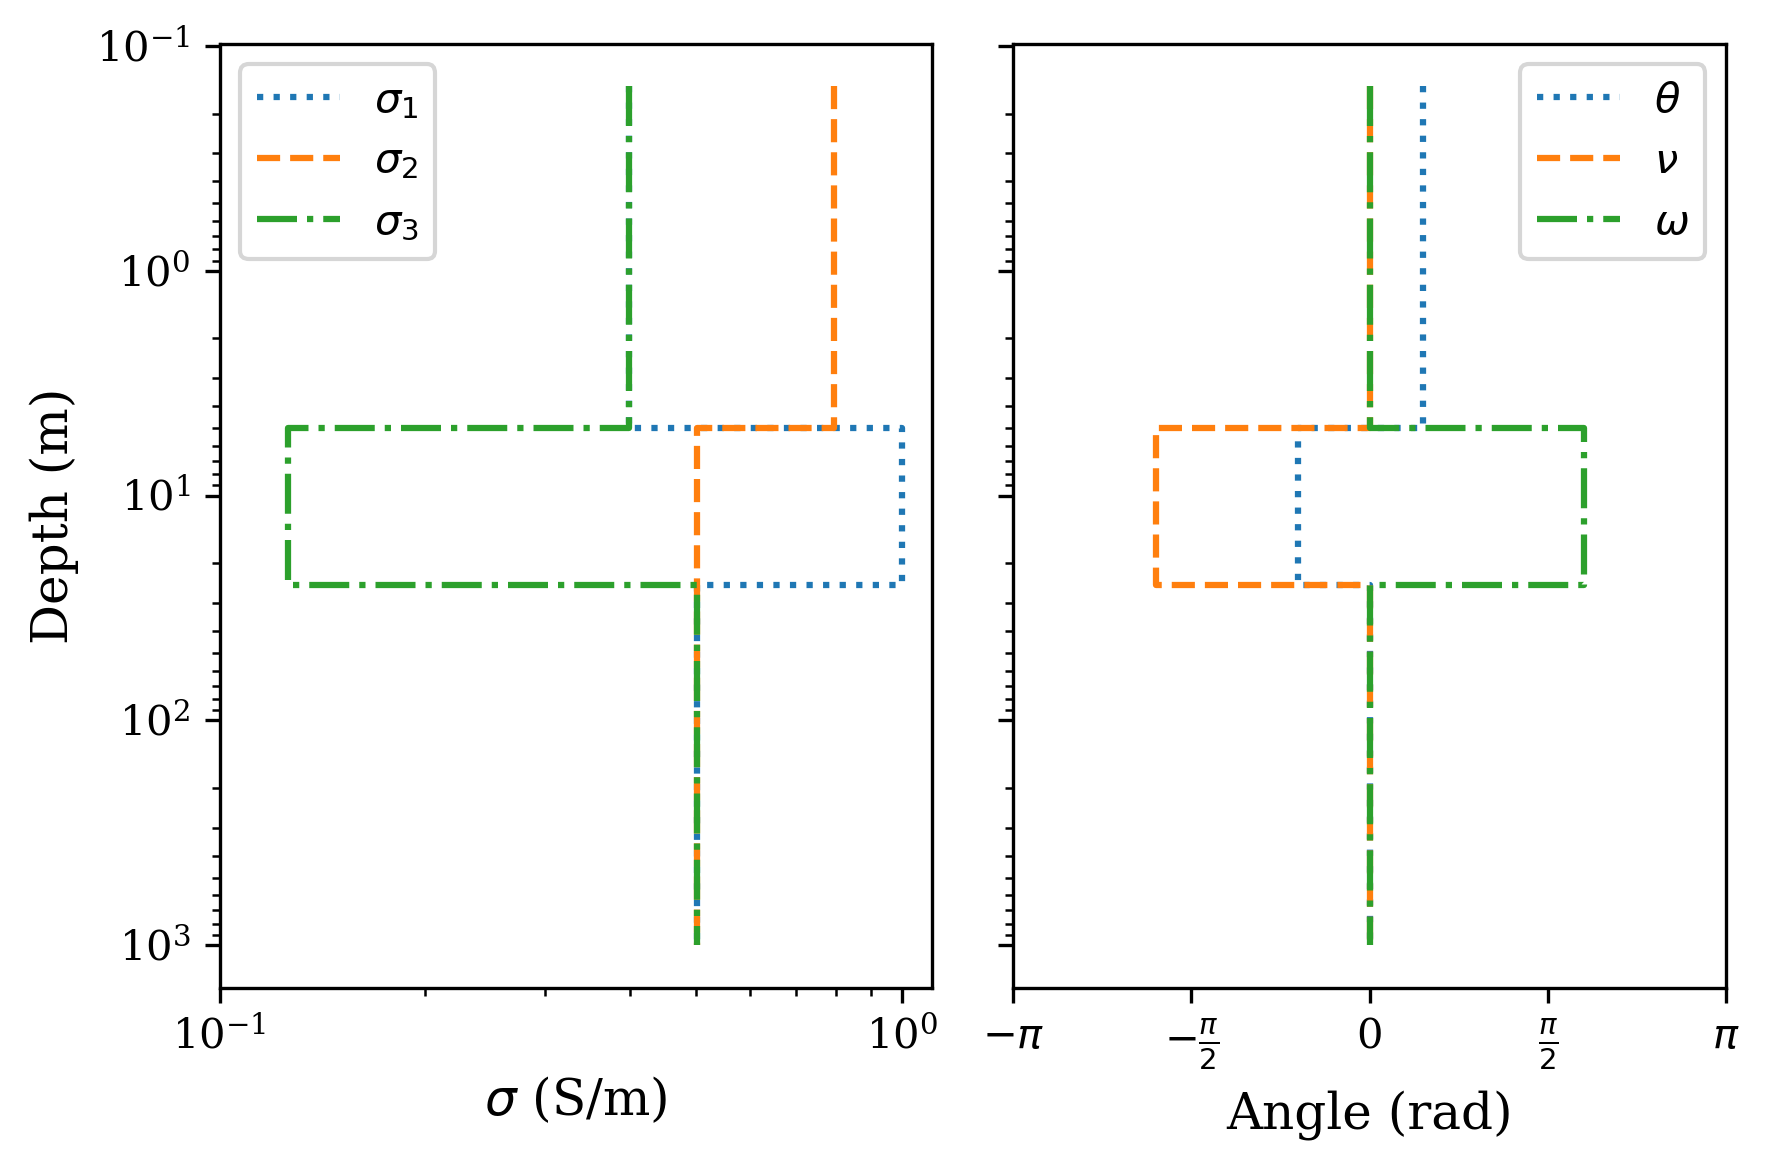

In [32]:
plot_model(m_true,z_true)

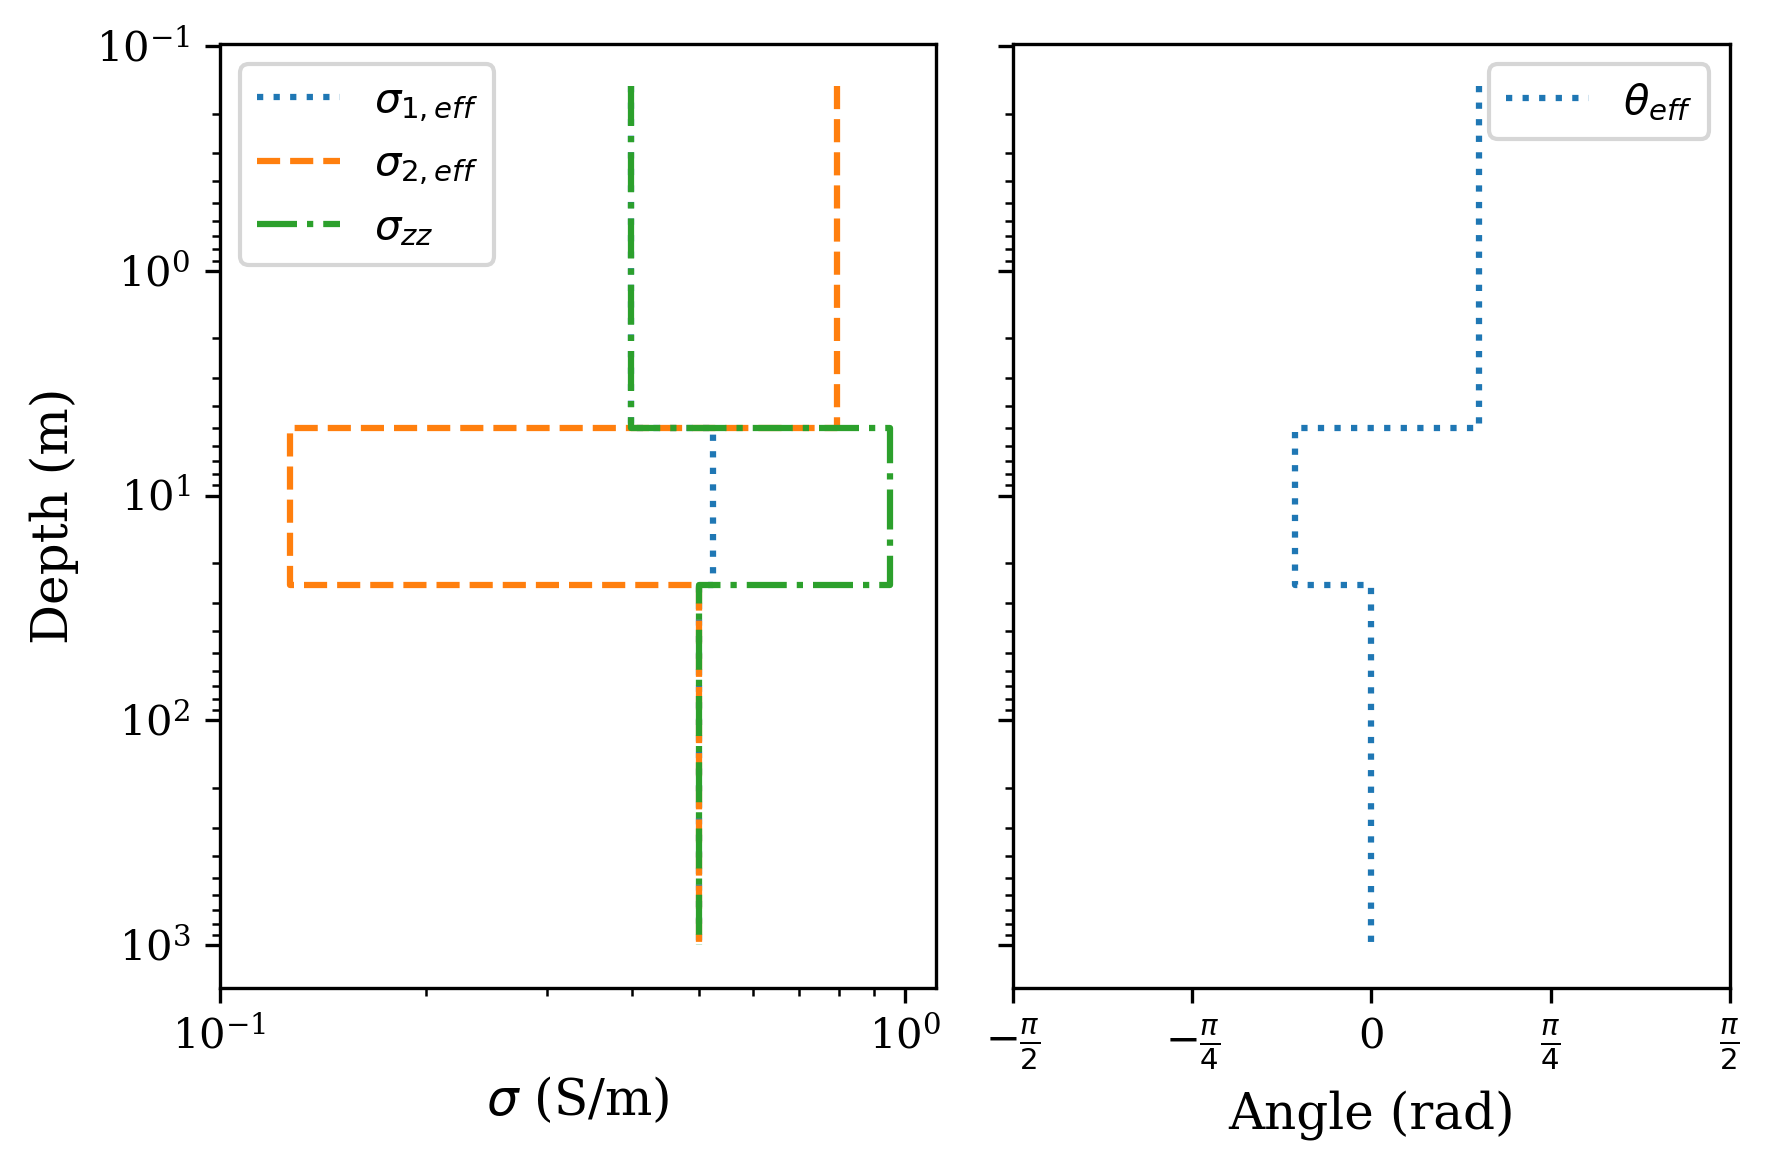

In [33]:
plot_eff_model(m_true,z_true)

Text(0, 0.5, 'a (m)')

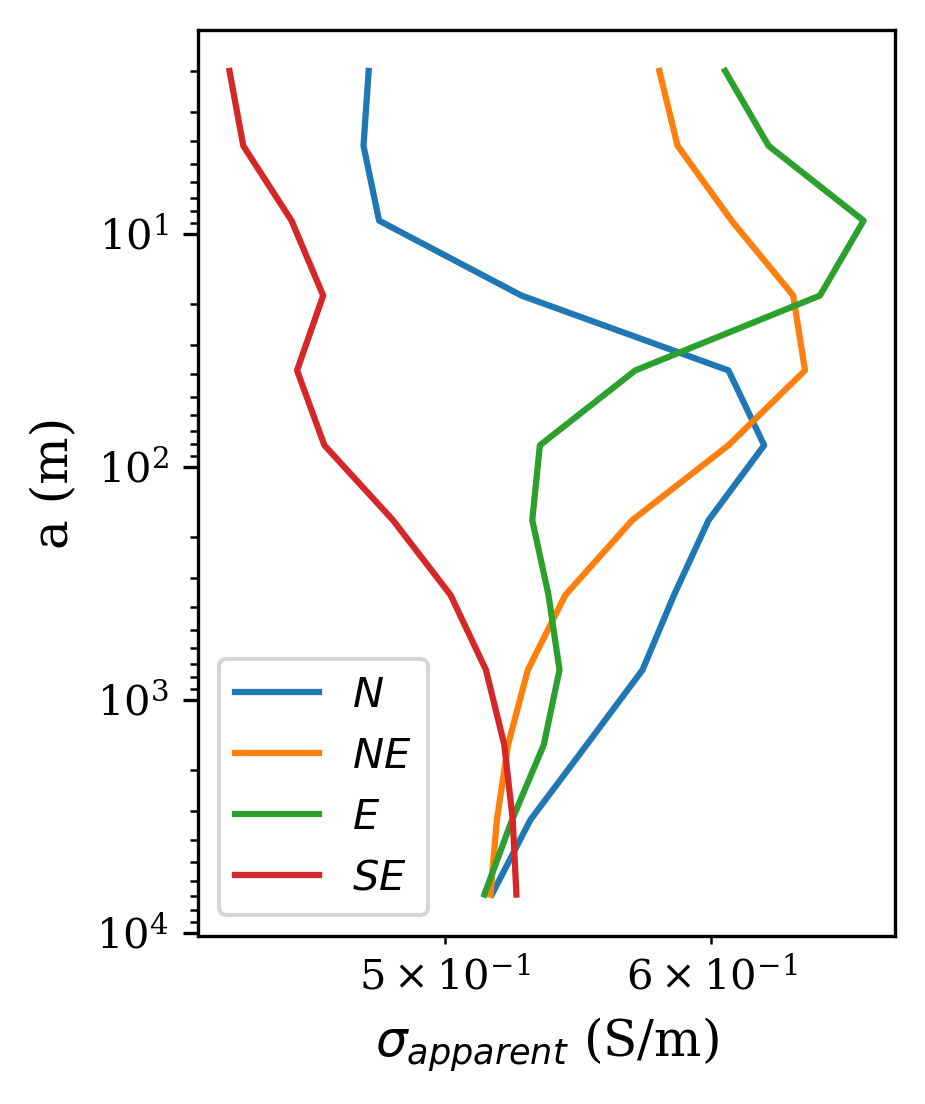

In [34]:
# plotting true and observered
data = np.load('Models/star_cross/data.npz')
rhoa_true = data['rhoa_true']
plt.figure(figsize=(3,4),dpi=300)
n_points = 12
plt.plot(rhoa_true[:n_points], zplotMN[:n_points], color='C0', label=r'$N$')
plt.plot(rhoa_true[15:15+n_points], zplotMN[15:15+n_points], color='C1', label=r'$NE$')
plt.plot(rhoa_true[30:30+n_points], zplotMN[30:30+n_points], color='C2', label=r'$E$')
plt.plot(rhoa_true[45:45+n_points], zplotMN[45:45+n_points], color='C3', label=r'$SE$')

#plt.plot(rhoa_obs[:n_points], zplotMN[:n_points], '+', color='C0')
#plt.plot(rhoa_obs[15:15+n_points], zplotMN[15:15+n_points], '+', color='C1')

plt.xscale('log')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel(r'$\sigma_{apparent}$ (S/m)')
plt.ylabel(r'a (m)')

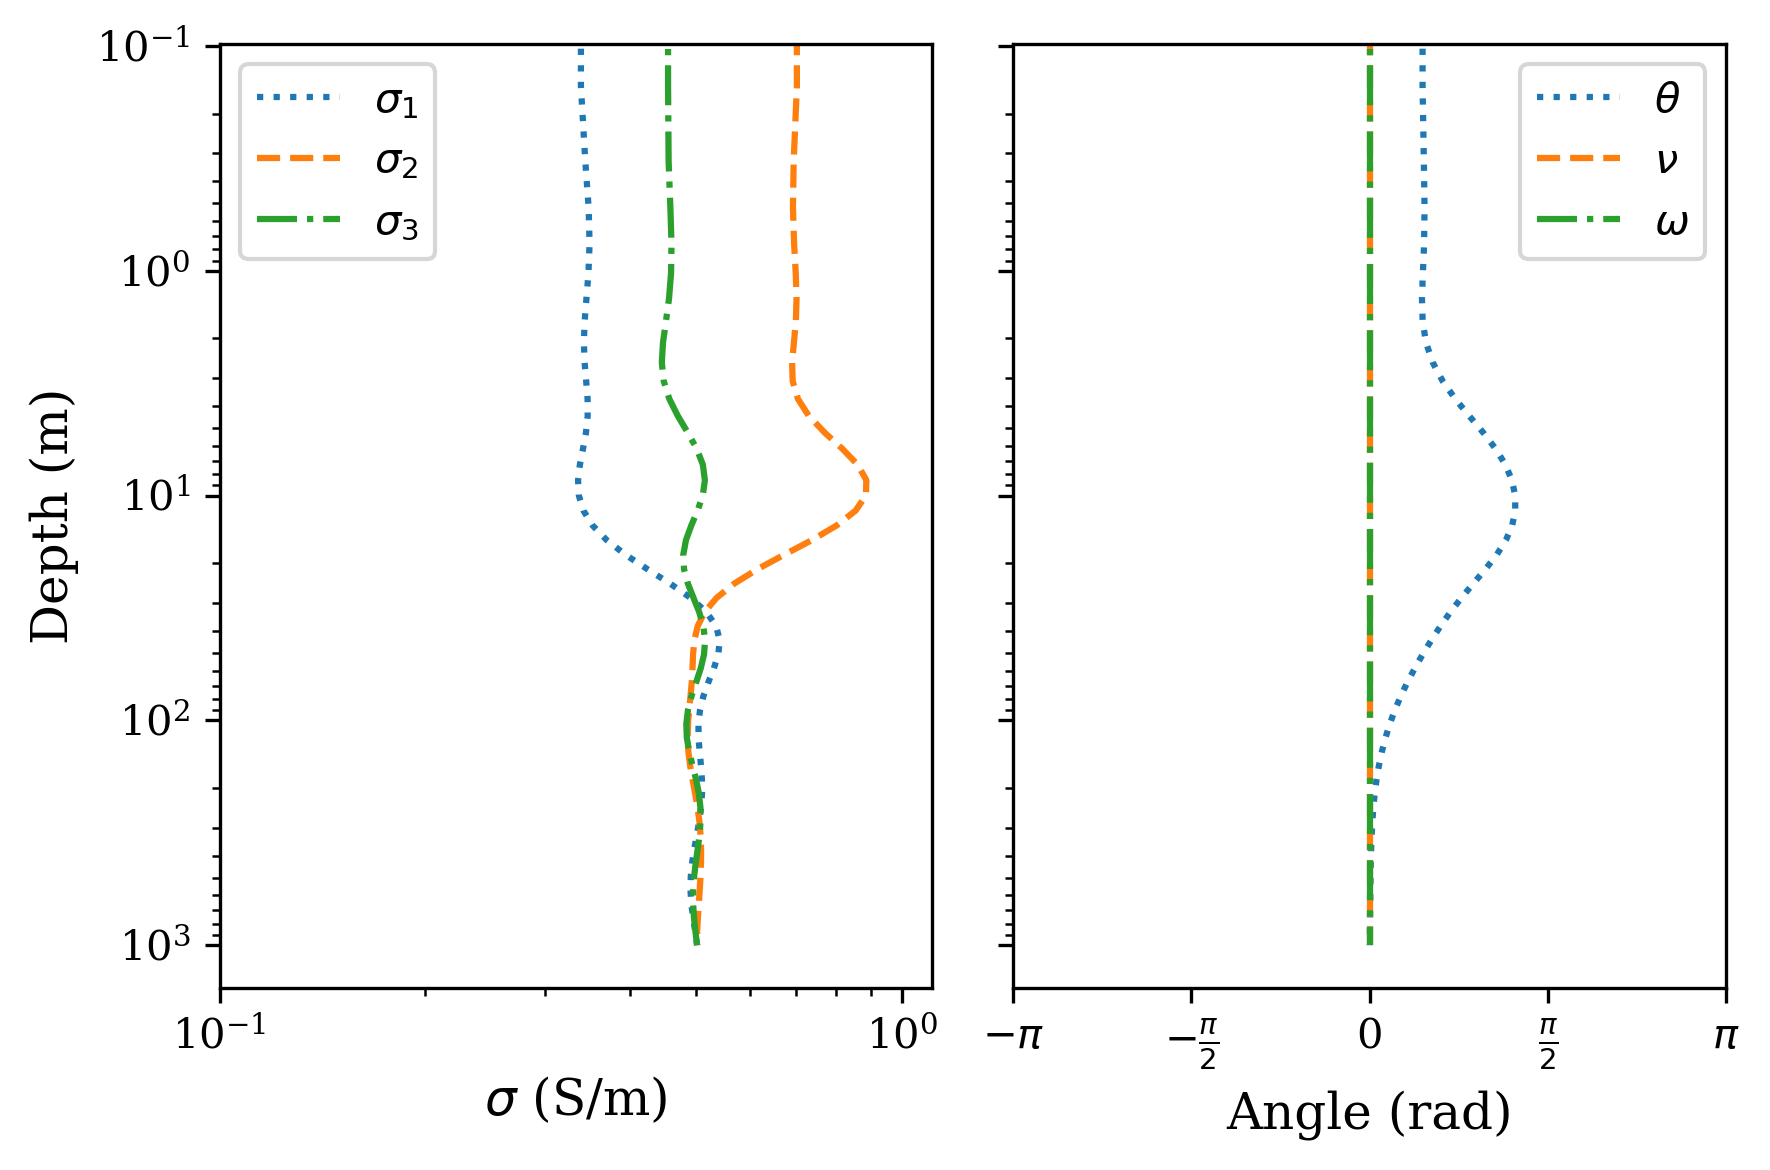

In [35]:
plot_model(m_smooth,zs)

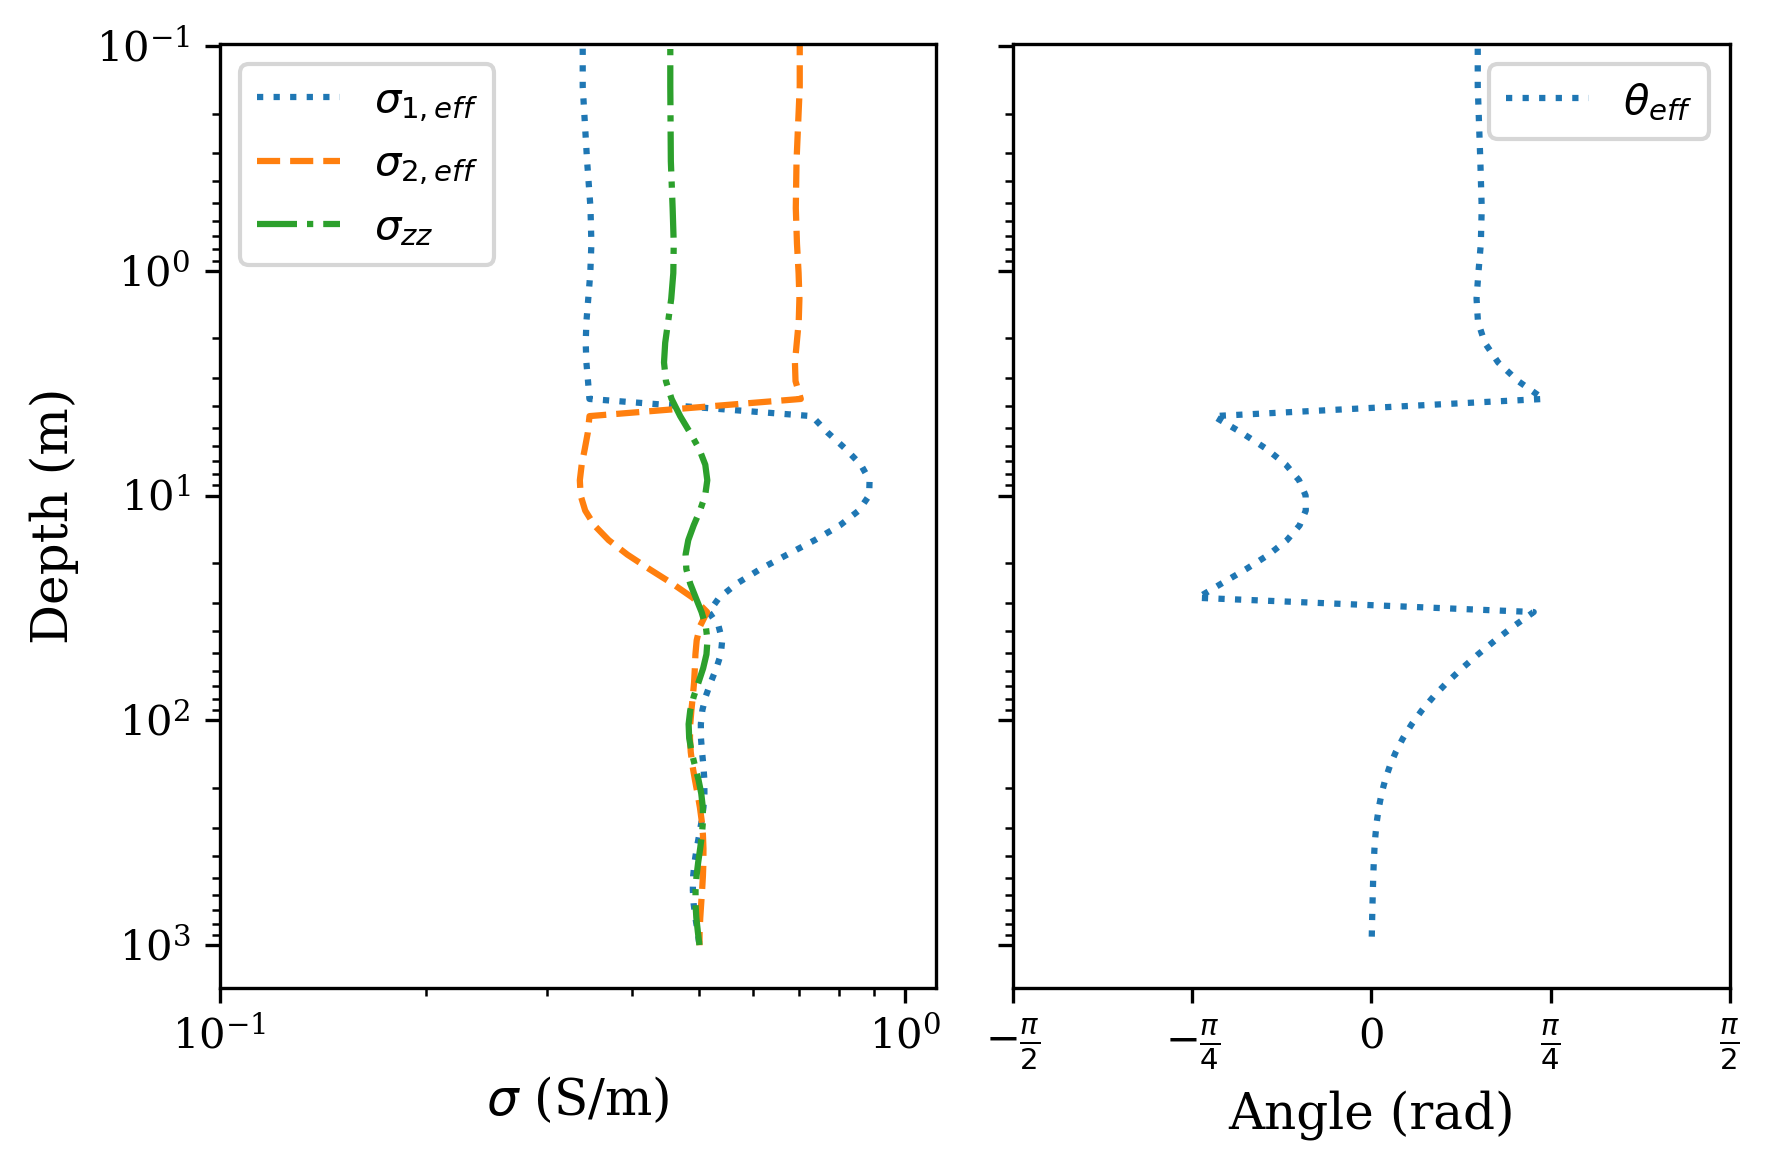

In [36]:
plot_eff_model(m_smooth,zs)

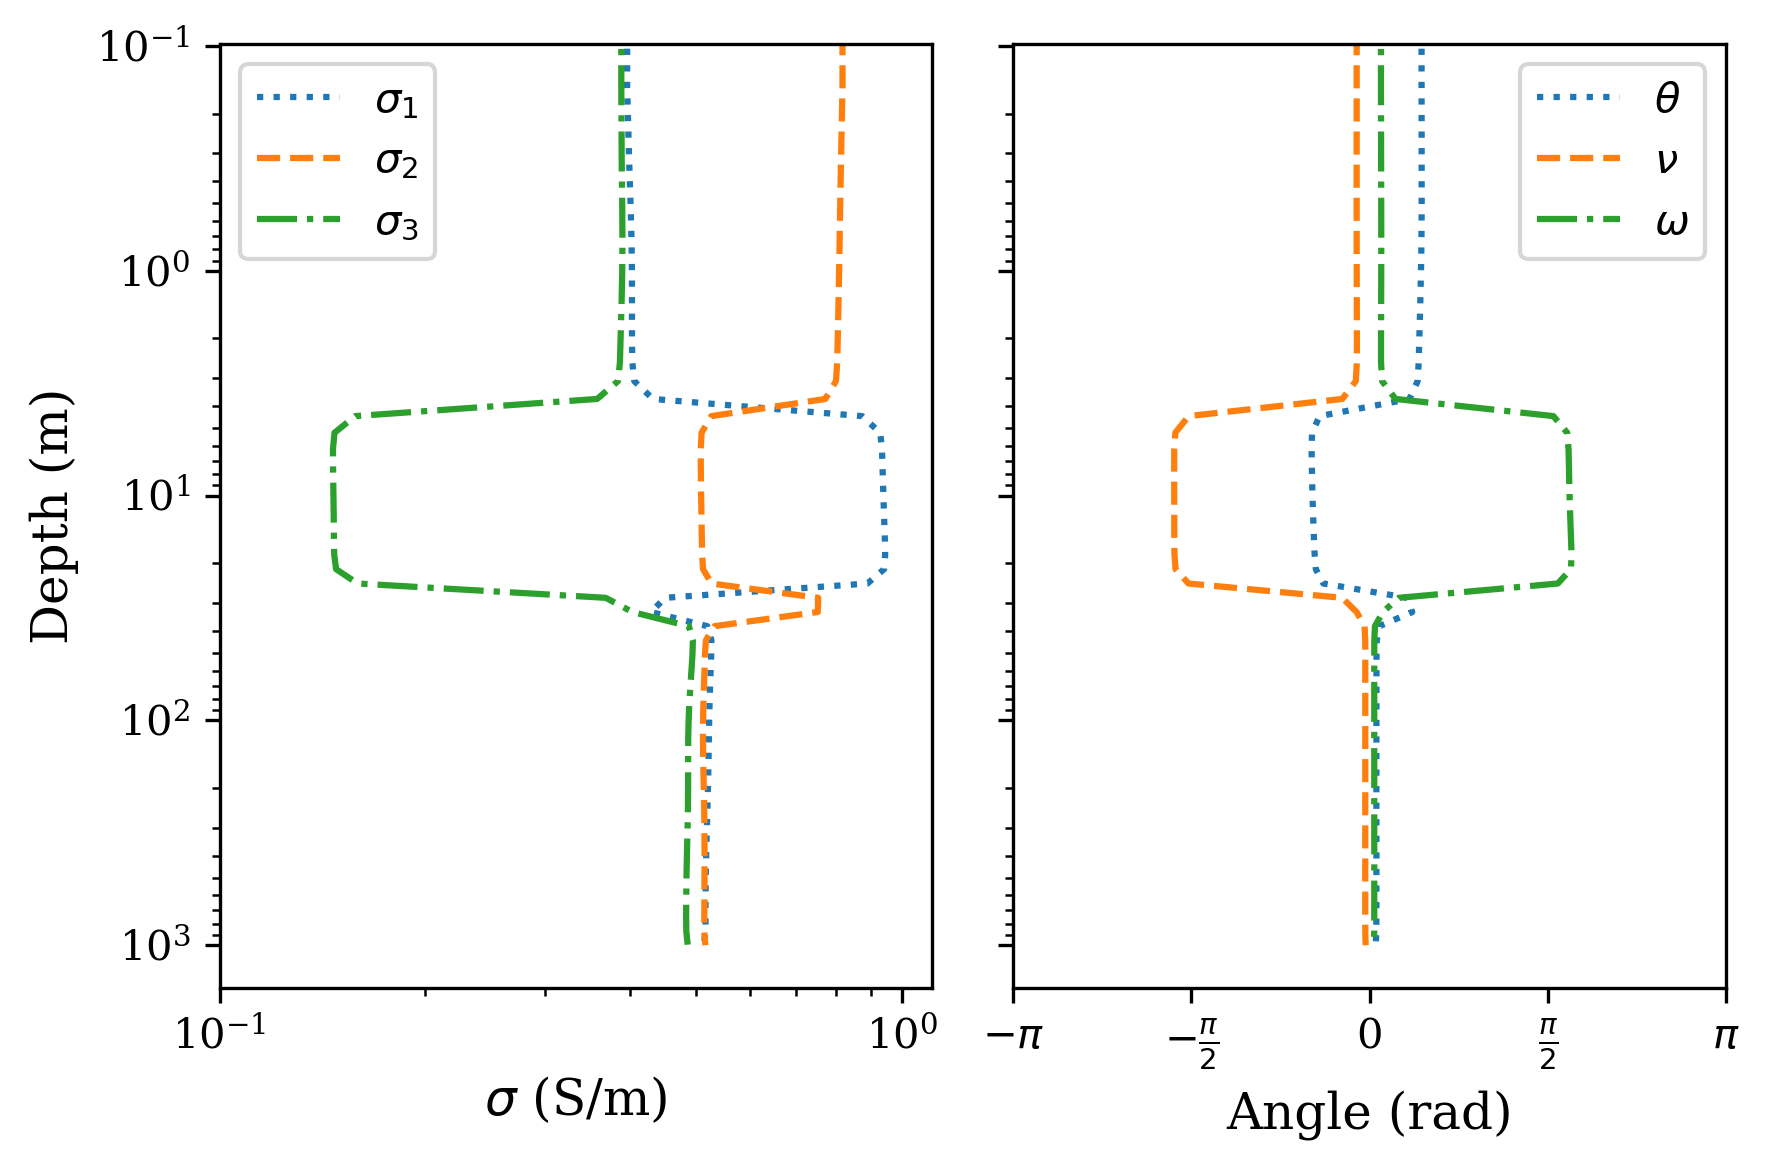

In [38]:
m_fcmE = np.load('Models/star_cross/m_fcm_eff.npy').reshape(6,-1)
m_fcmE[:3] = np.exp(m_fcmE[:3])
plot_model(m_fcmE, zs)

# Model 2

In [39]:
m_smooth = np.load('Models/mod2/beta2.npy').reshape(6,-1)
m_smooth[:3] = np.exp(m_smooth[:3])

sig1 = [10**-0.4, 10**-0.9, 10**-0.25]
sig2 = [10**-0.2, 10**-0.3, 10**-0.25]
sig3 = [10**-0.1, 10**-0.0, 10**-0.25]
alpha = [3*np.pi/20, -np.pi/8, 0]
betas = [0, -3*np.pi/8, 0]
gamma = [0, 3*np.pi/8, 0]
z = [0, 15, 35]

x_lims_sig = (0.1, 1.109174815262401)
tk = np.c_[sig1, sig2, sig3, alpha, betas, gamma]

z_true = [zs[1], z[1], z[1], z[2], z[2], zs[-1]]
s1_true_plot = [sig1[0],sig1[0],sig1[1],sig1[1],sig1[2],sig1[2]]
s2_true_plot = [sig2[0],sig2[0],sig2[1],sig2[1],sig2[2],sig2[2]]
s3_true_plot = [sig3[0],sig3[0],sig3[1],sig3[1],sig3[2],sig3[2]]
nu_true_plot = [alpha[0], alpha[0], alpha[1], alpha[1], alpha[2], alpha[2]]
phi_true_plot = [betas[0], betas[0], betas[1], betas[1], betas[2], betas[2]]
omega_true_plot = [gamma[0], gamma[0], gamma[1], gamma[1], gamma[2], gamma[2]]
m_true = np.r_[s1_true_plot,s2_true_plot,s3_true_plot,nu_true_plot,phi_true_plot,omega_true_plot]

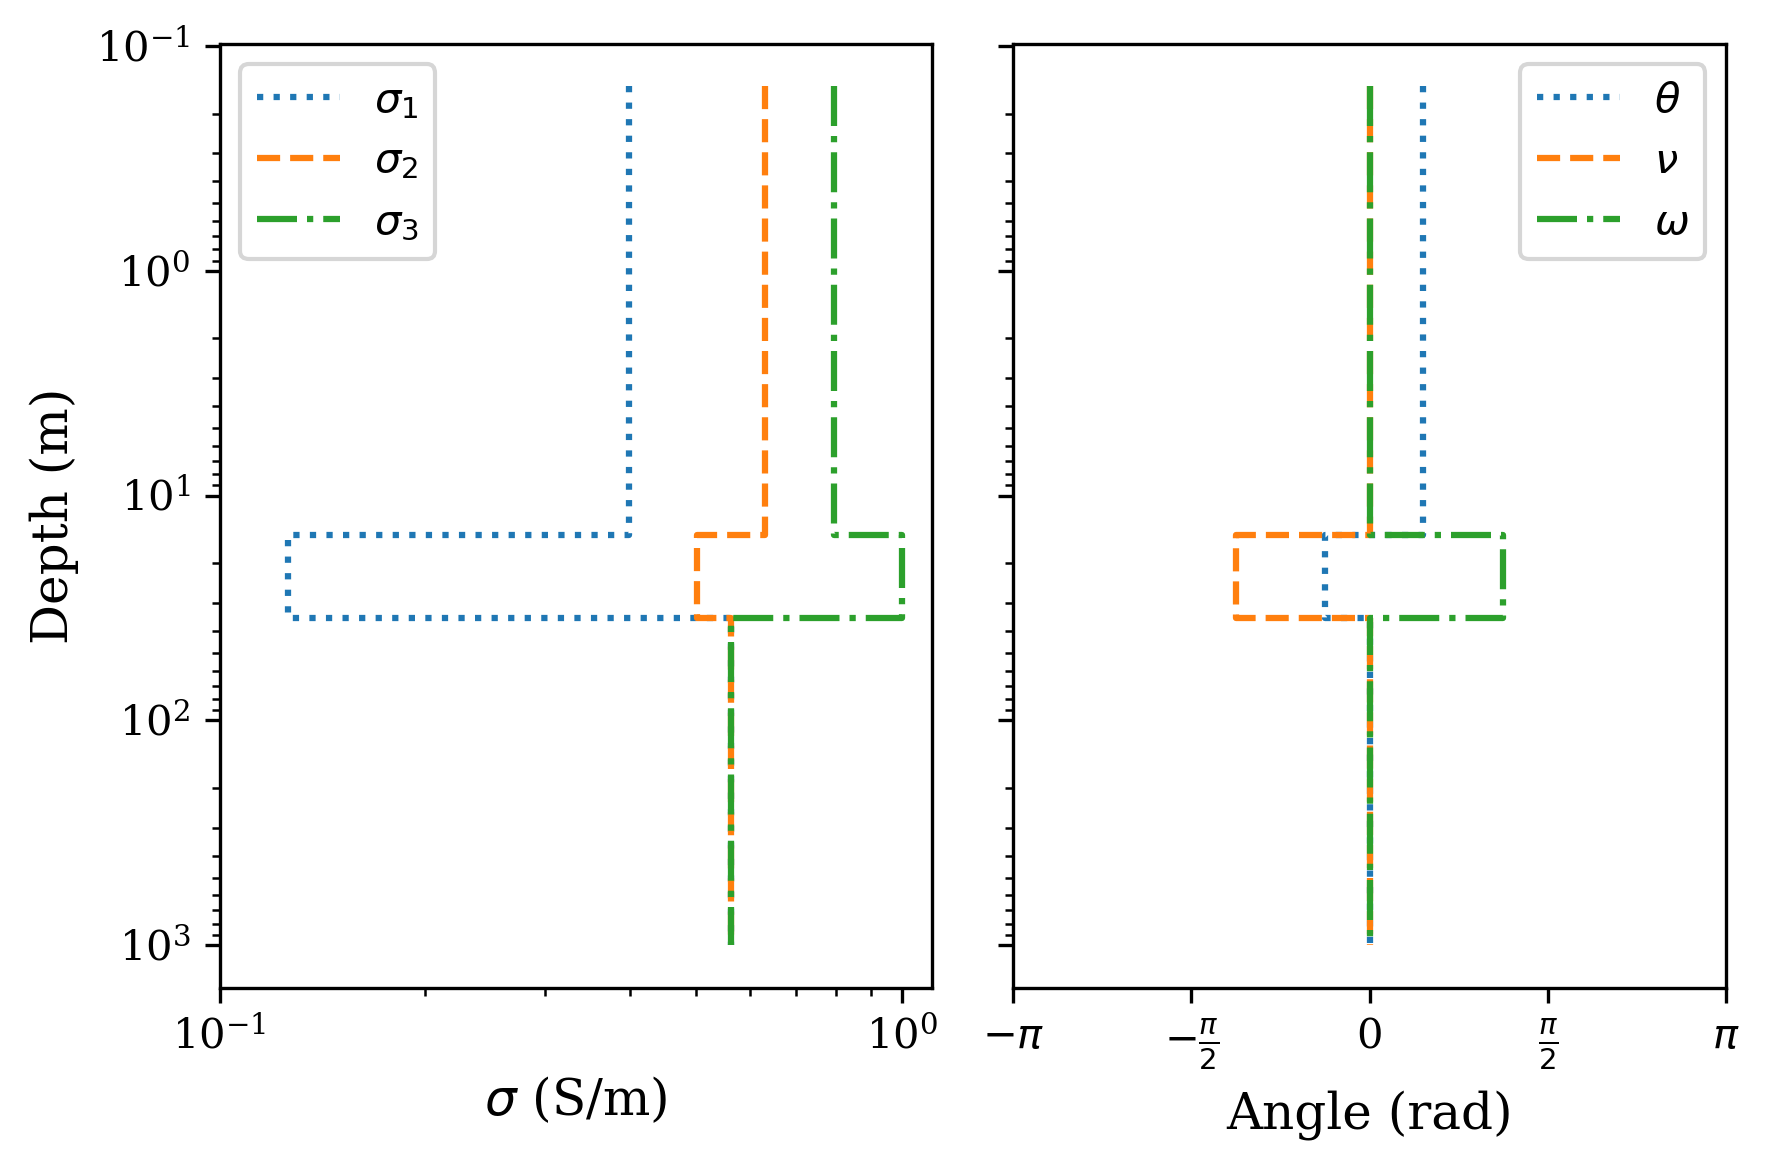

In [40]:
plot_model(m_true,z_true)

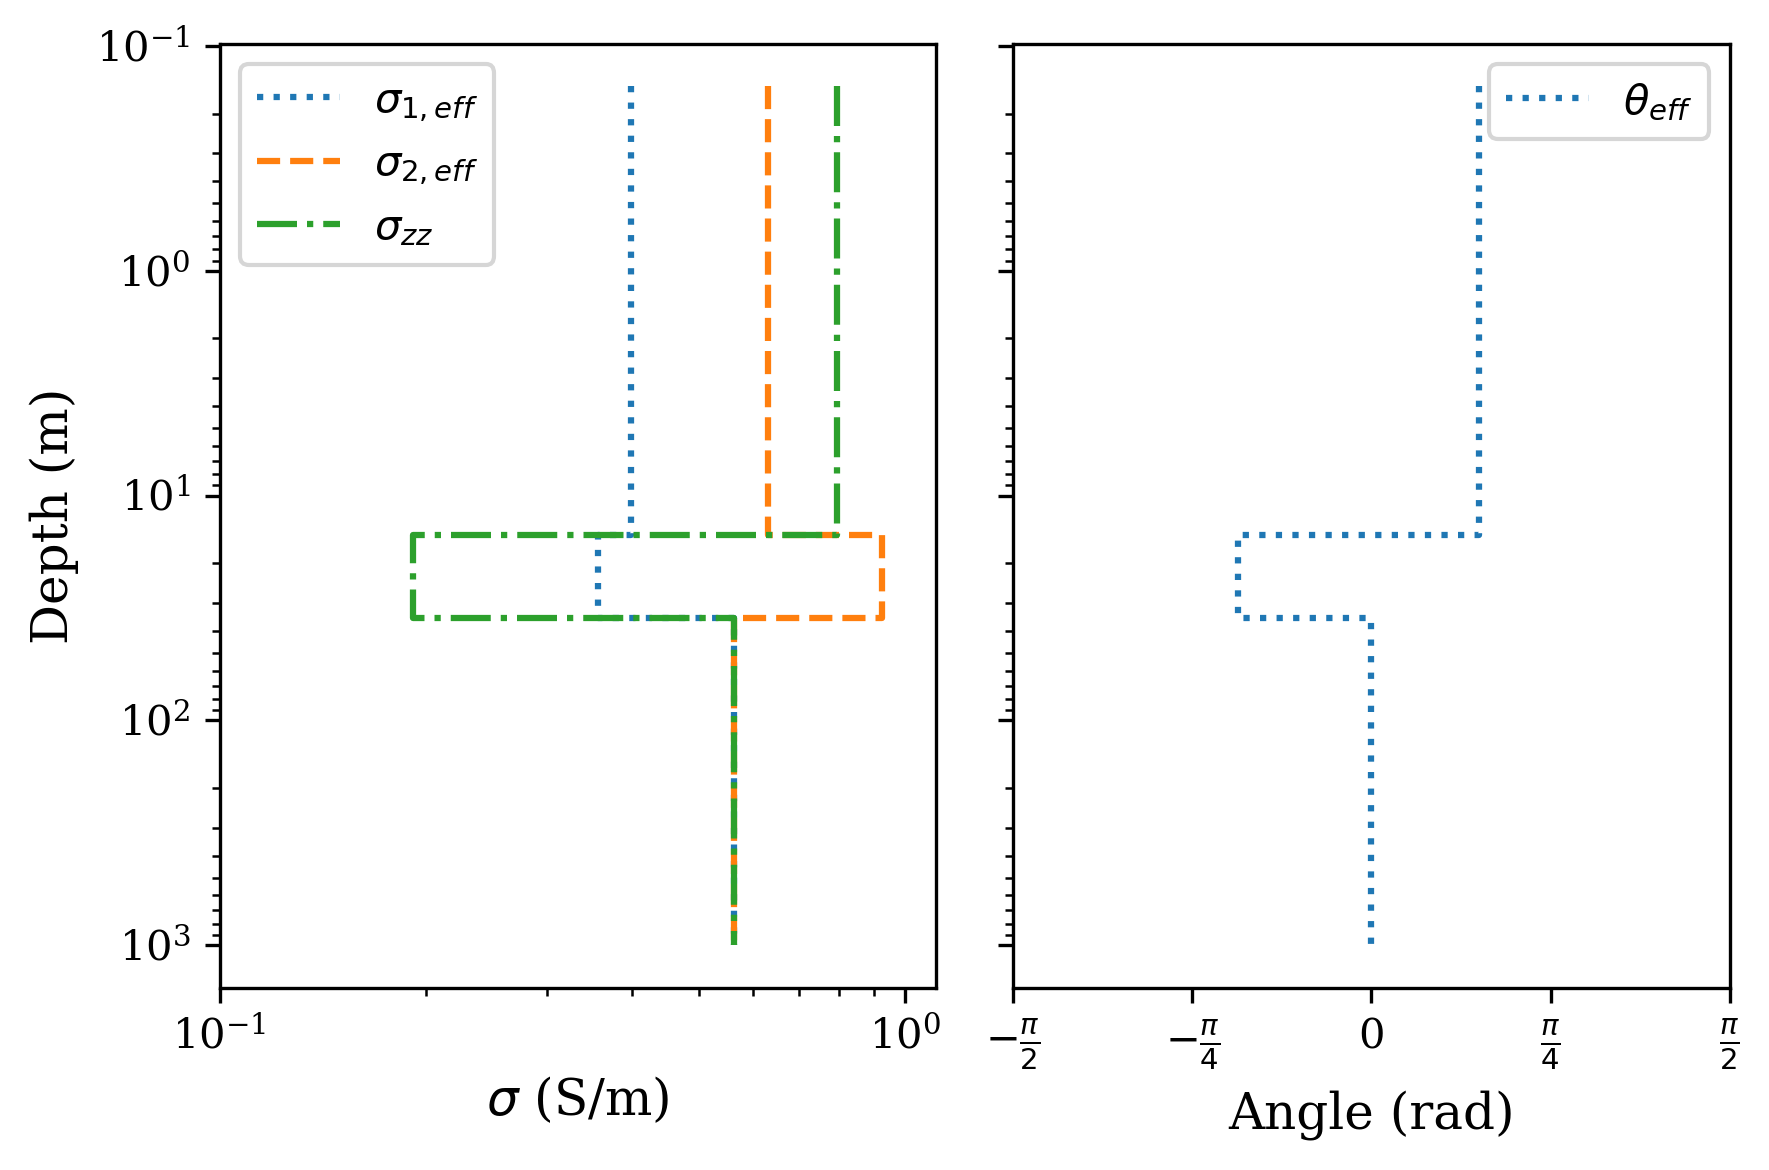

In [41]:
plot_eff_model(m_true,z_true)

Text(0, 0.5, 'a (m)')

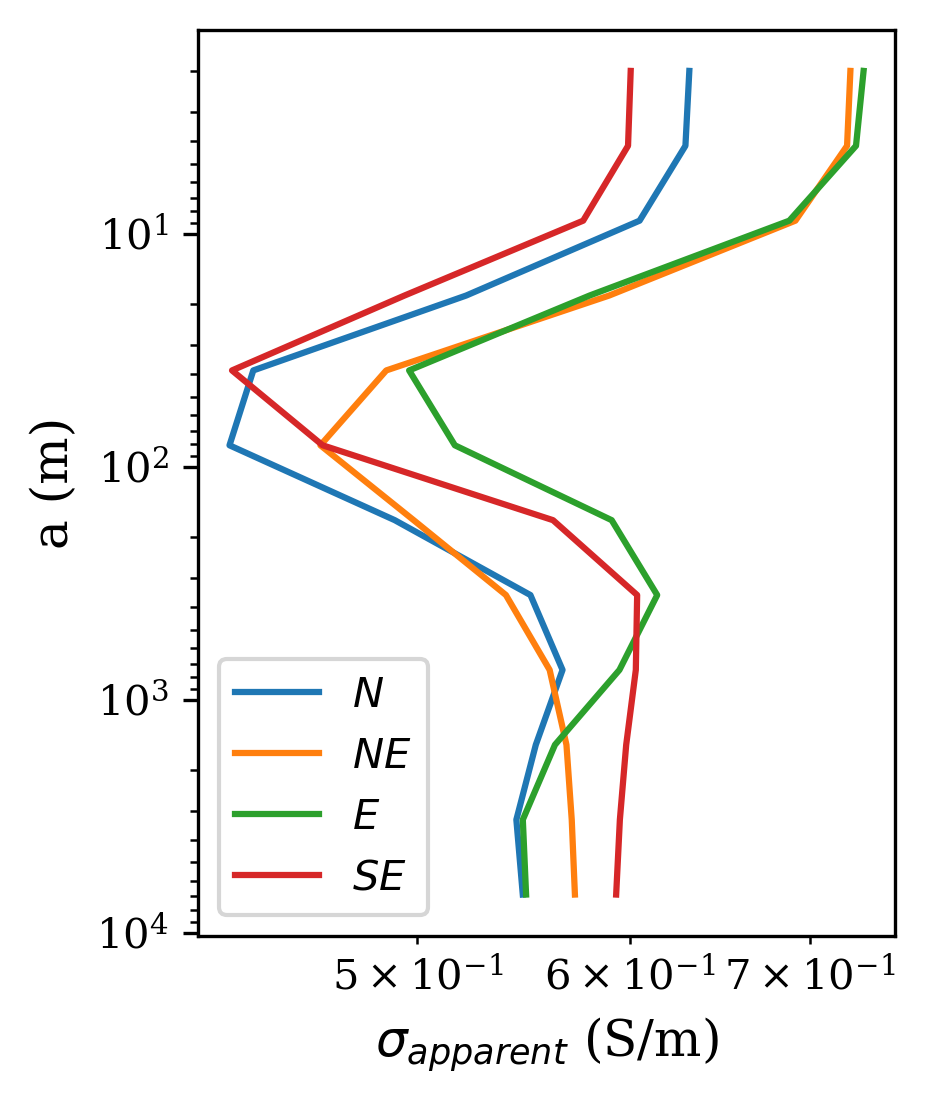

In [42]:
# plotting true and observered
data = np.load('Models/mod2/data.npz')
rhoa_true = data['rhoa_true']
plt.figure(figsize=(3,4),dpi=300)
n_points = 12
plt.plot(rhoa_true[:n_points], zplotMN[:n_points], color='C0', label=r'$N$')
plt.plot(rhoa_true[15:15+n_points], zplotMN[15:15+n_points], color='C1', label=r'$NE$')
plt.plot(rhoa_true[30:30+n_points], zplotMN[30:30+n_points], color='C2', label=r'$E$')
plt.plot(rhoa_true[45:45+n_points], zplotMN[45:45+n_points], color='C3', label=r'$SE$')

#plt.plot(rhoa_obs[:n_points], zplotMN[:n_points], '+', color='C0')
#plt.plot(rhoa_obs[15:15+n_points], zplotMN[15:15+n_points], '+', color='C1')

plt.xscale('log')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel(r'$\sigma_{apparent}$ (S/m)')
plt.ylabel(r'a (m)')

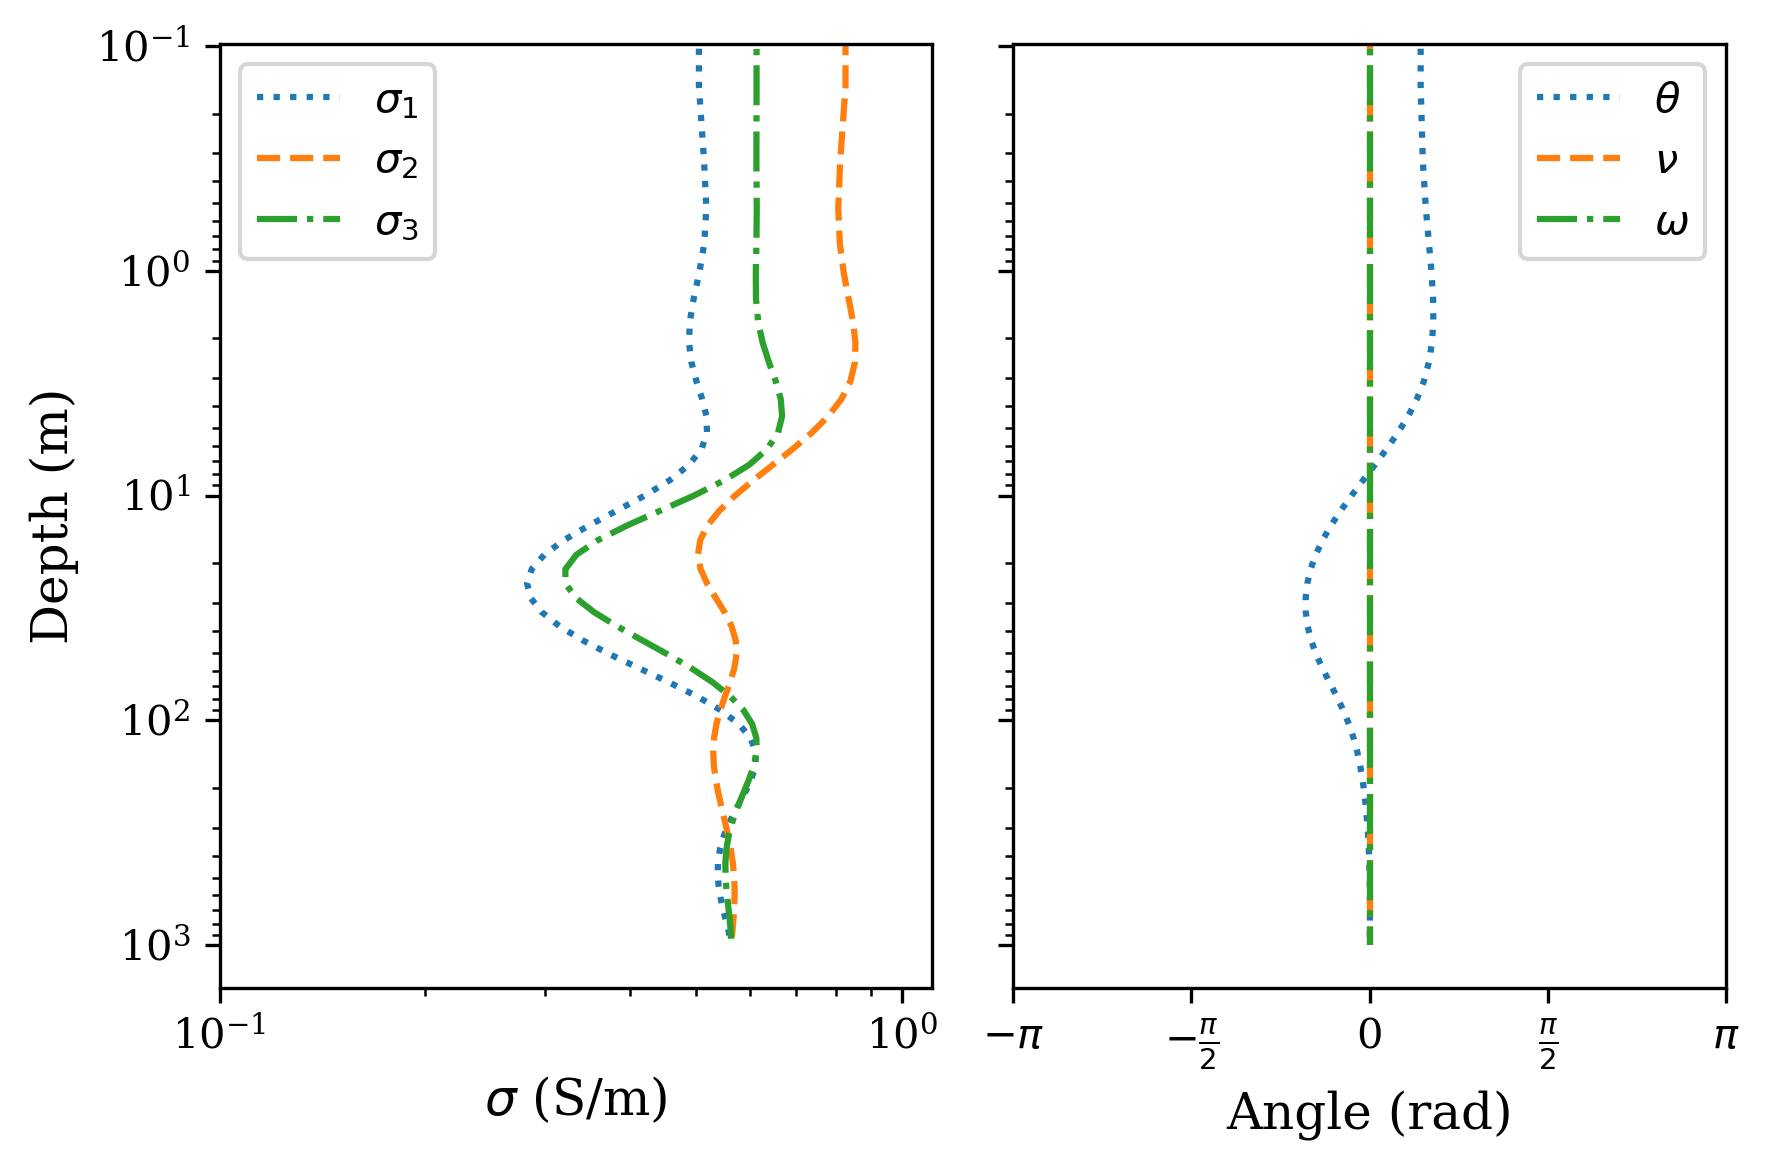

In [43]:
plot_model(m_smooth,zs)

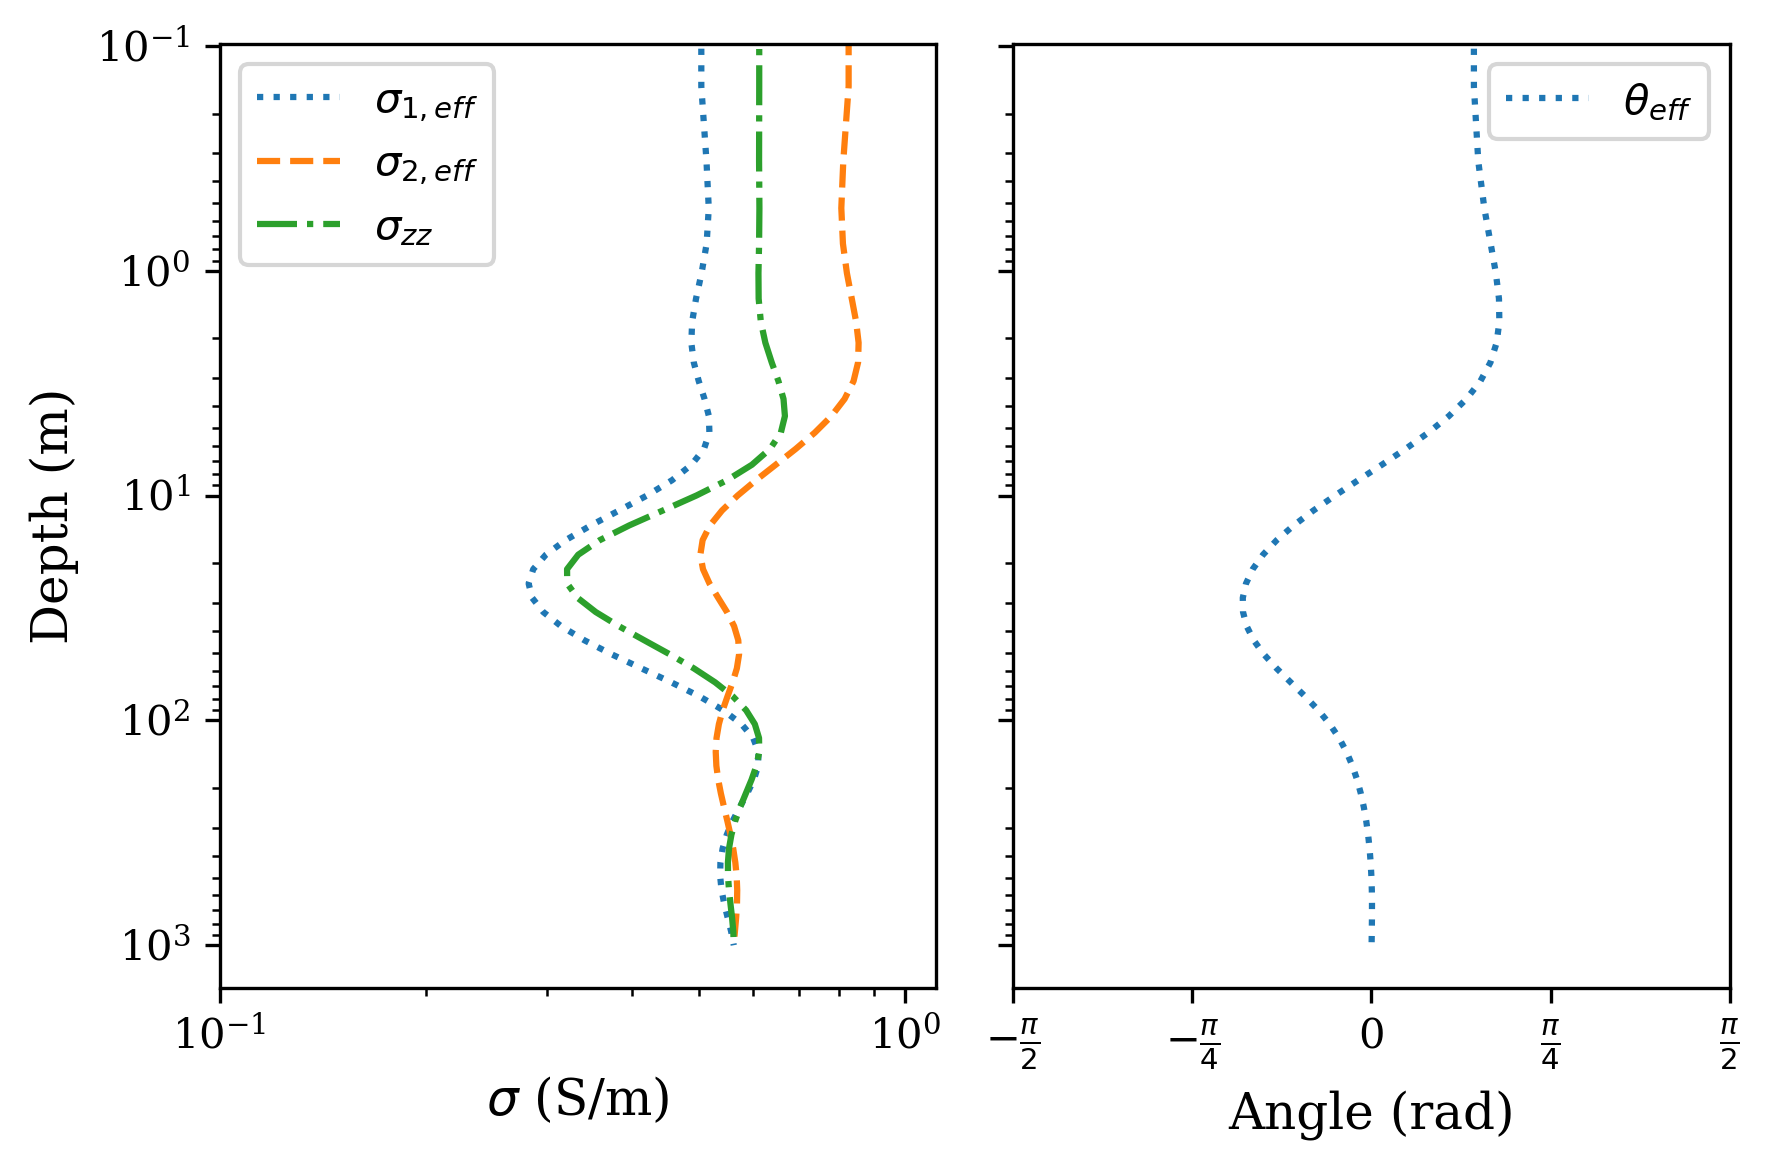

In [44]:
plot_eff_model(m_smooth,zs)

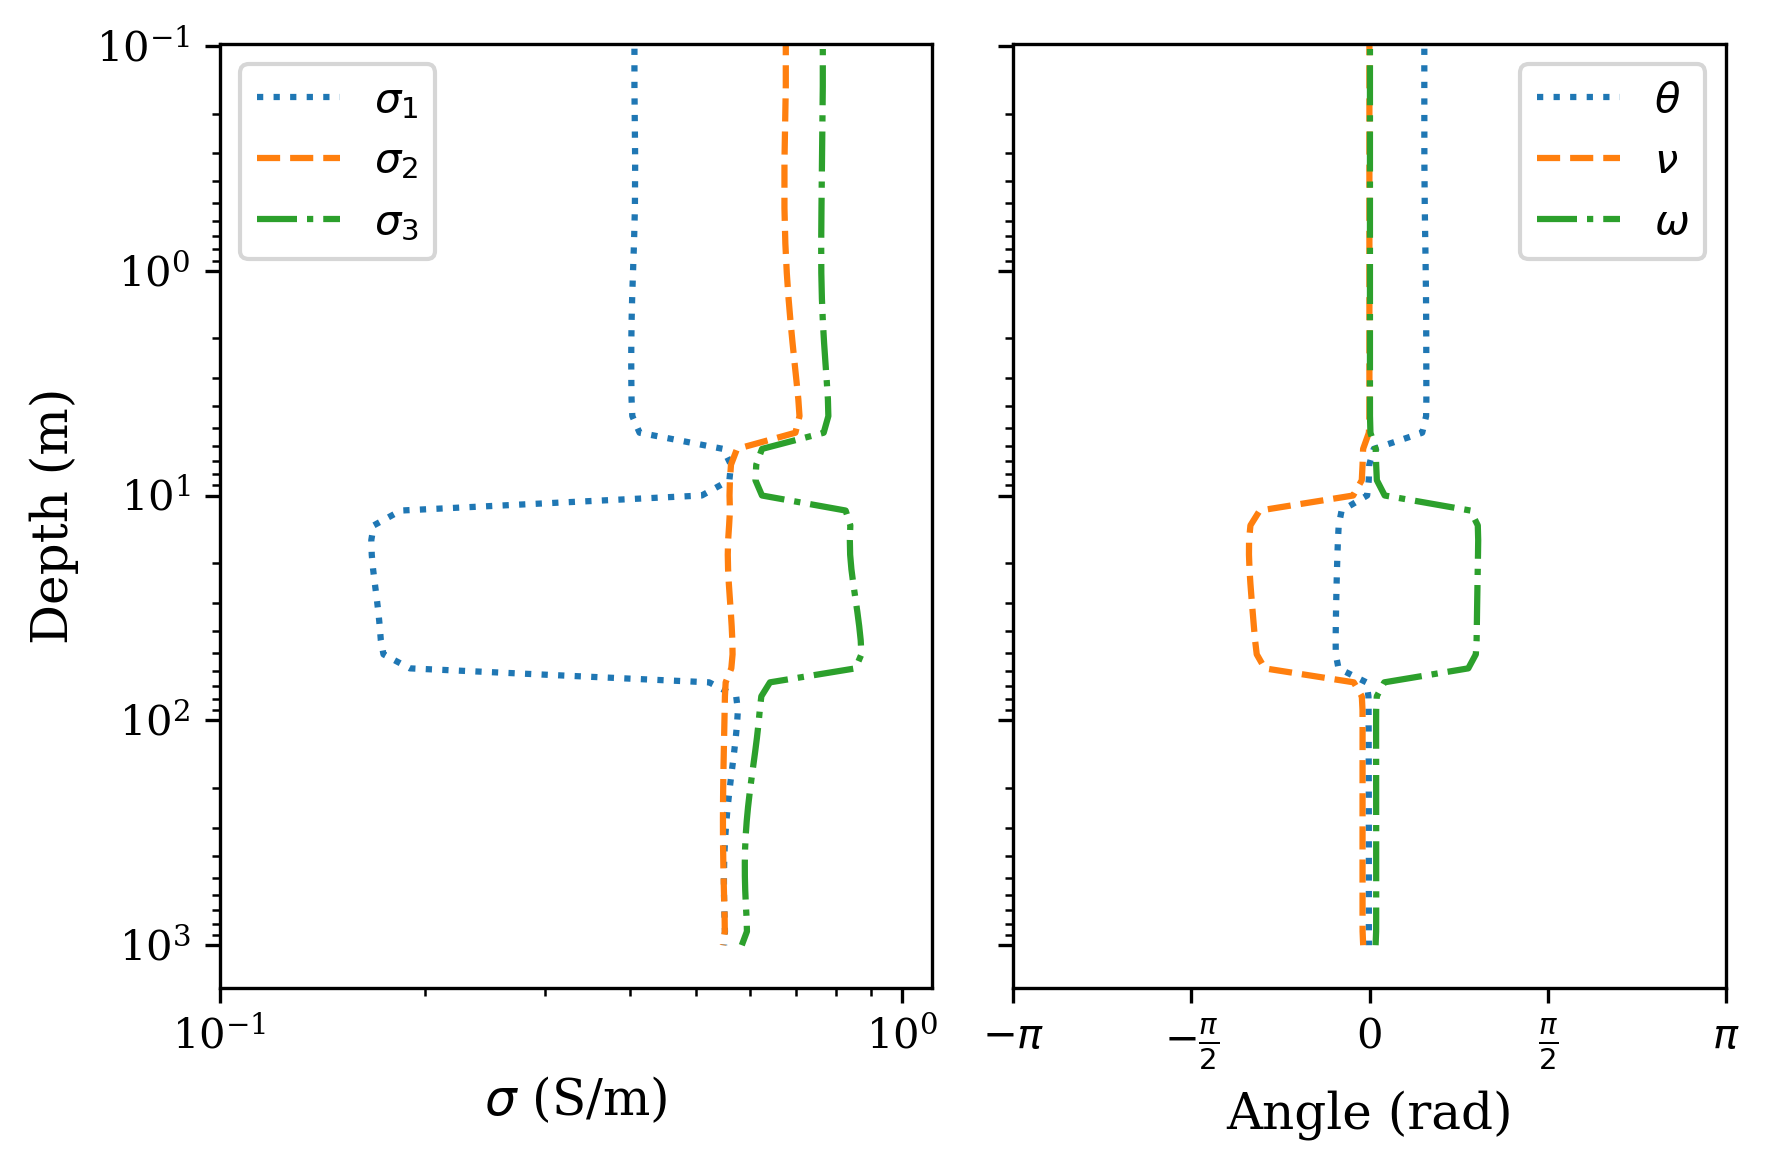

In [45]:
m_fcmE = np.load('Models/mod2/m_fcm_eff.npy').reshape(6,-1)
m_fcmE[:3] = np.exp(m_fcmE[:3])
plot_model(m_fcmE, zs)

# Model 3

In [46]:
m_smooth = np.load('Models/mod3/beta2.npy').reshape(6,-1)
m_smooth[:3] = np.exp(m_smooth[:3])

sig1 = [10**-1, 10**-0.7, 10**0.25]
sig2 = [10**-0.4, 10**-0.3, 10**0]
sig3 = [10**-0.1, 10**-0.0, 10**0.25]
alpha = [5*np.pi/20, np.pi/8, 0]
betas = [3*np.pi/8, -3*np.pi/8, -2*np.pi/10]
gamma = [3*np.pi/16, 3*np.pi/8, np.pi/4]
z = [0, 10, 50]

x_lims_sig = (0.08, 10**0.3)
tk = np.c_[sig1, sig2, sig3, alpha, betas, gamma]

z_true = [zs[1], z[1], z[1], z[2], z[2], zs[-1]]
s1_true_plot = [sig1[0],sig1[0],sig1[1],sig1[1],sig1[2],sig1[2]]
s2_true_plot = [sig2[0],sig2[0],sig2[1],sig2[1],sig2[2],sig2[2]]
s3_true_plot = [sig3[0],sig3[0],sig3[1],sig3[1],sig3[2],sig3[2]]
nu_true_plot = [alpha[0], alpha[0], alpha[1], alpha[1], alpha[2], alpha[2]]
phi_true_plot = [betas[0], betas[0], betas[1], betas[1], betas[2], betas[2]]
omega_true_plot = [gamma[0], gamma[0], gamma[1], gamma[1], gamma[2], gamma[2]]
m_true = np.r_[s1_true_plot,s2_true_plot,s3_true_plot,nu_true_plot,phi_true_plot,omega_true_plot]

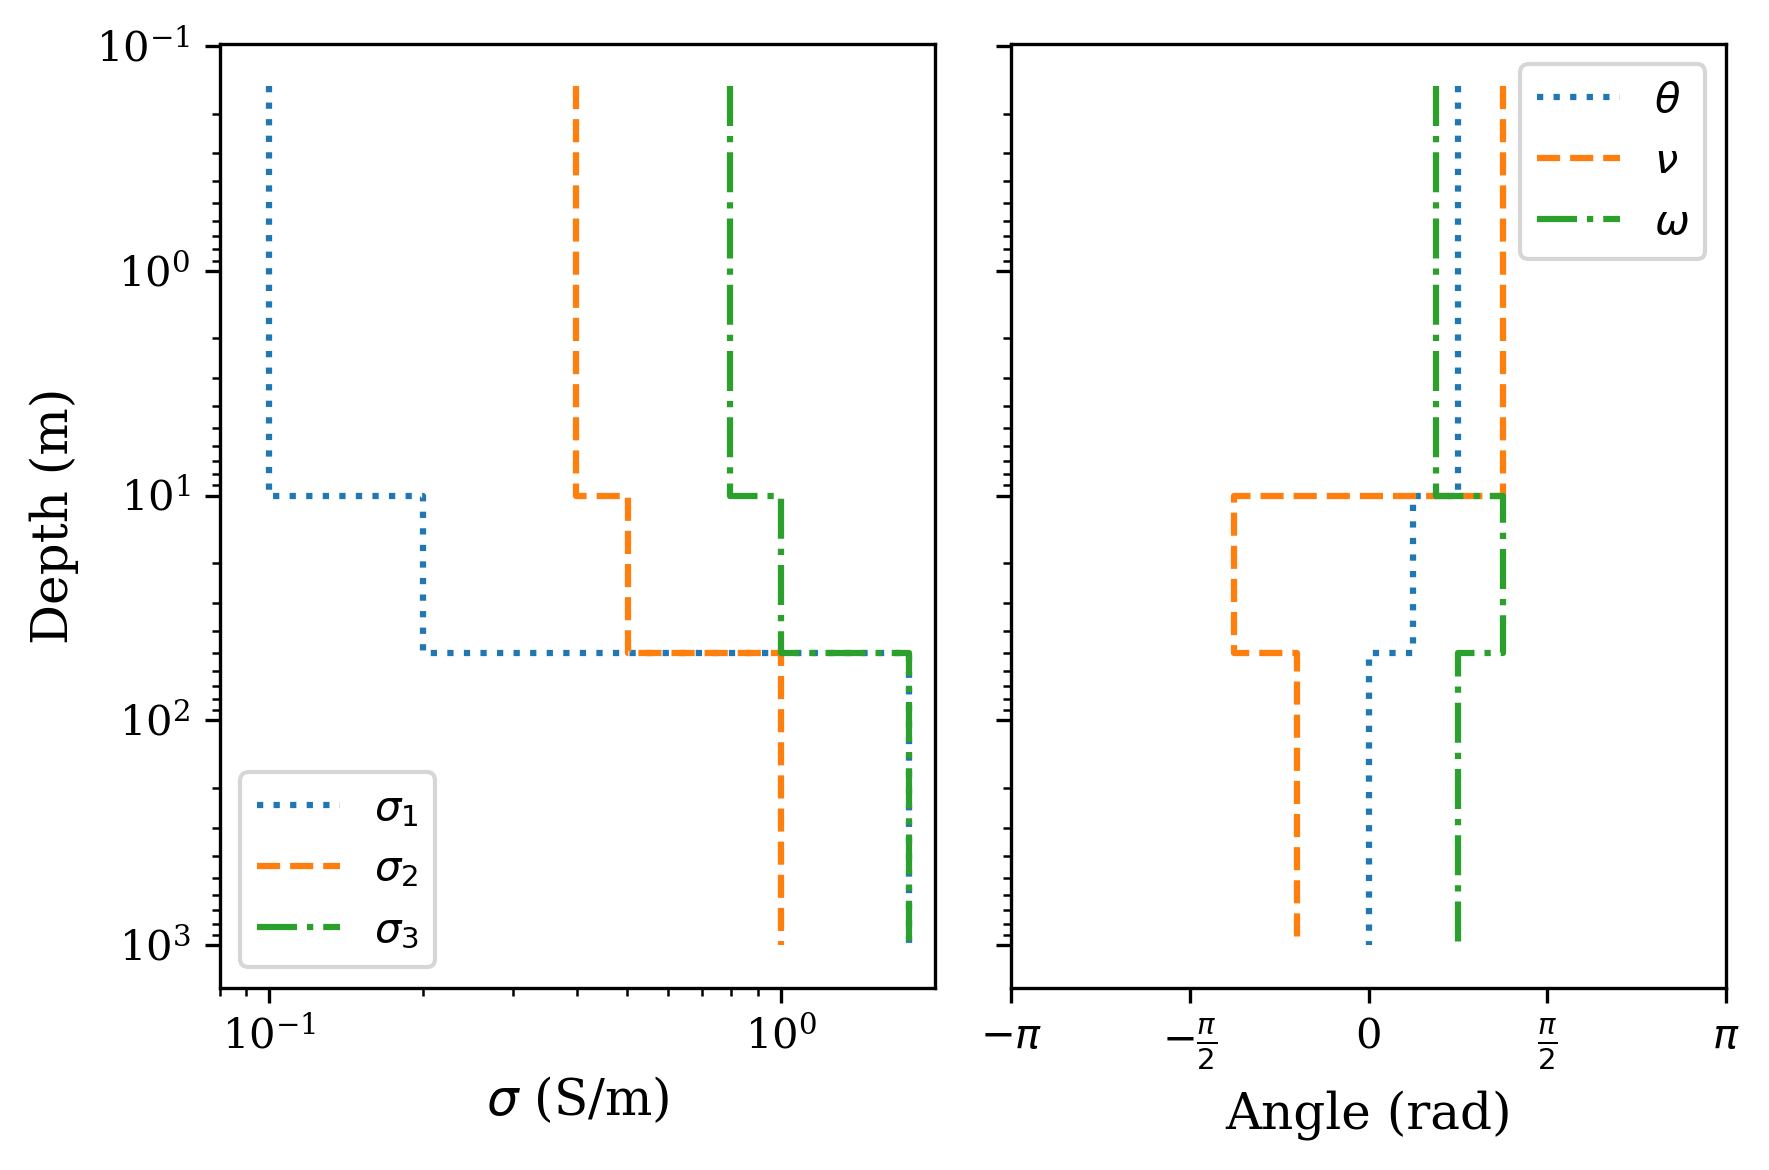

In [47]:
plot_model(m_true,z_true)

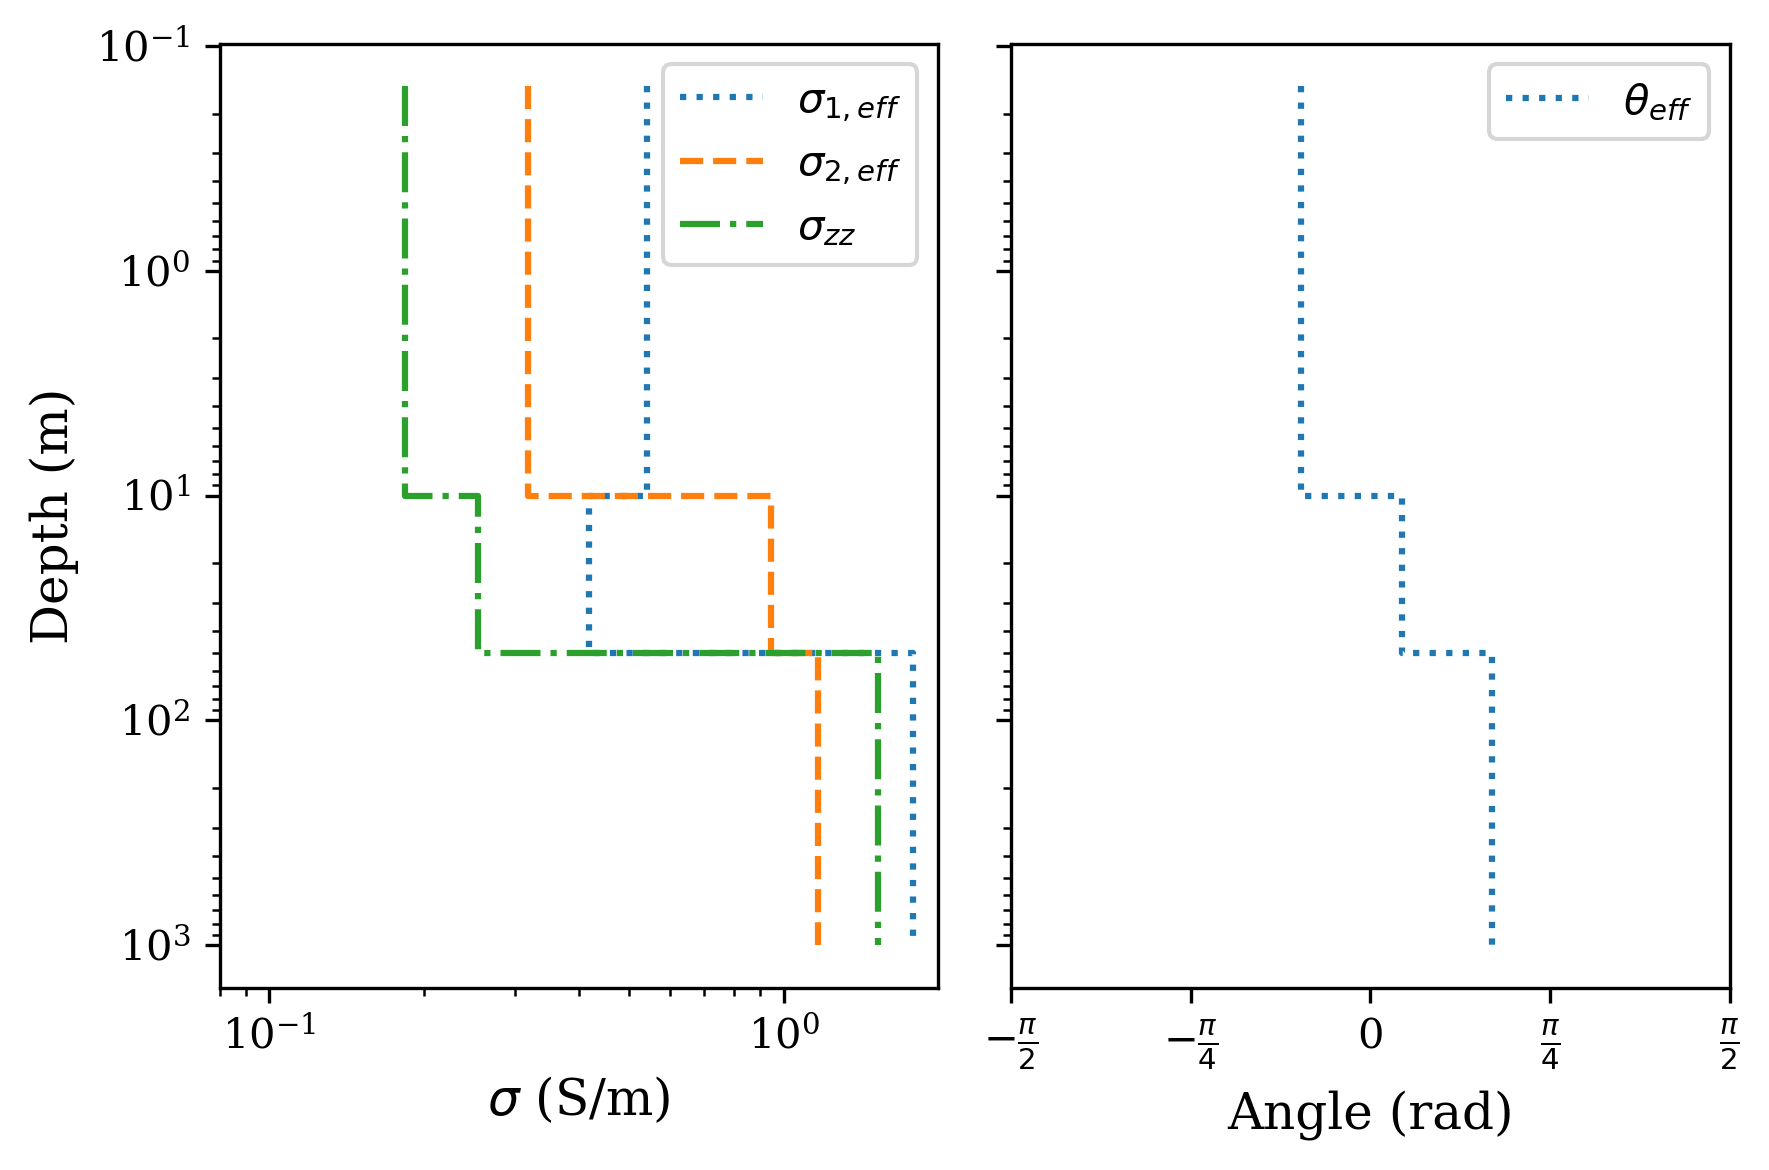

In [48]:
plot_eff_model(m_true,z_true)

Text(0, 0.5, 'a (m)')

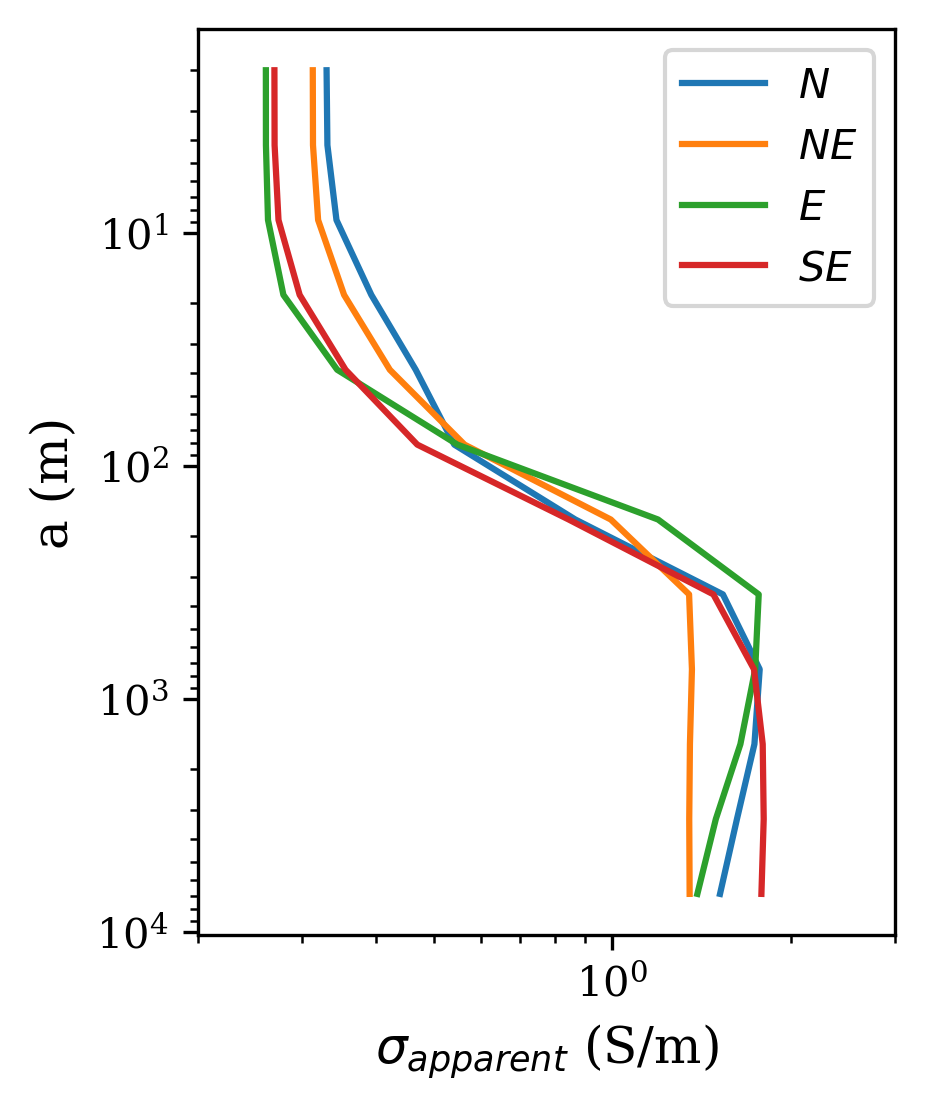

In [49]:
# plotting true and observered
data = np.load('Models/mod3/data.npz')
rhoa_true = data['rhoa_true']
plt.figure(figsize=(3,4),dpi=300)
n_points = 12
plt.plot(rhoa_true[:n_points], zplotMN[:n_points], color='C0', label=r'$N$')
plt.plot(rhoa_true[15:15+n_points], zplotMN[15:15+n_points], color='C1', label=r'$NE$')
plt.plot(rhoa_true[30:30+n_points], zplotMN[30:30+n_points], color='C2', label=r'$E$')
plt.plot(rhoa_true[45:45+n_points], zplotMN[45:45+n_points], color='C3', label=r'$SE$')

#plt.plot(rhoa_obs[:n_points], zplotMN[:n_points], '+', color='C0')
#plt.plot(rhoa_obs[15:15+n_points], zplotMN[15:15+n_points], '+', color='C1')

plt.xlim([0.2,3])
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel(r'$\sigma_{apparent}$ (S/m)')
plt.ylabel(r'a (m)')

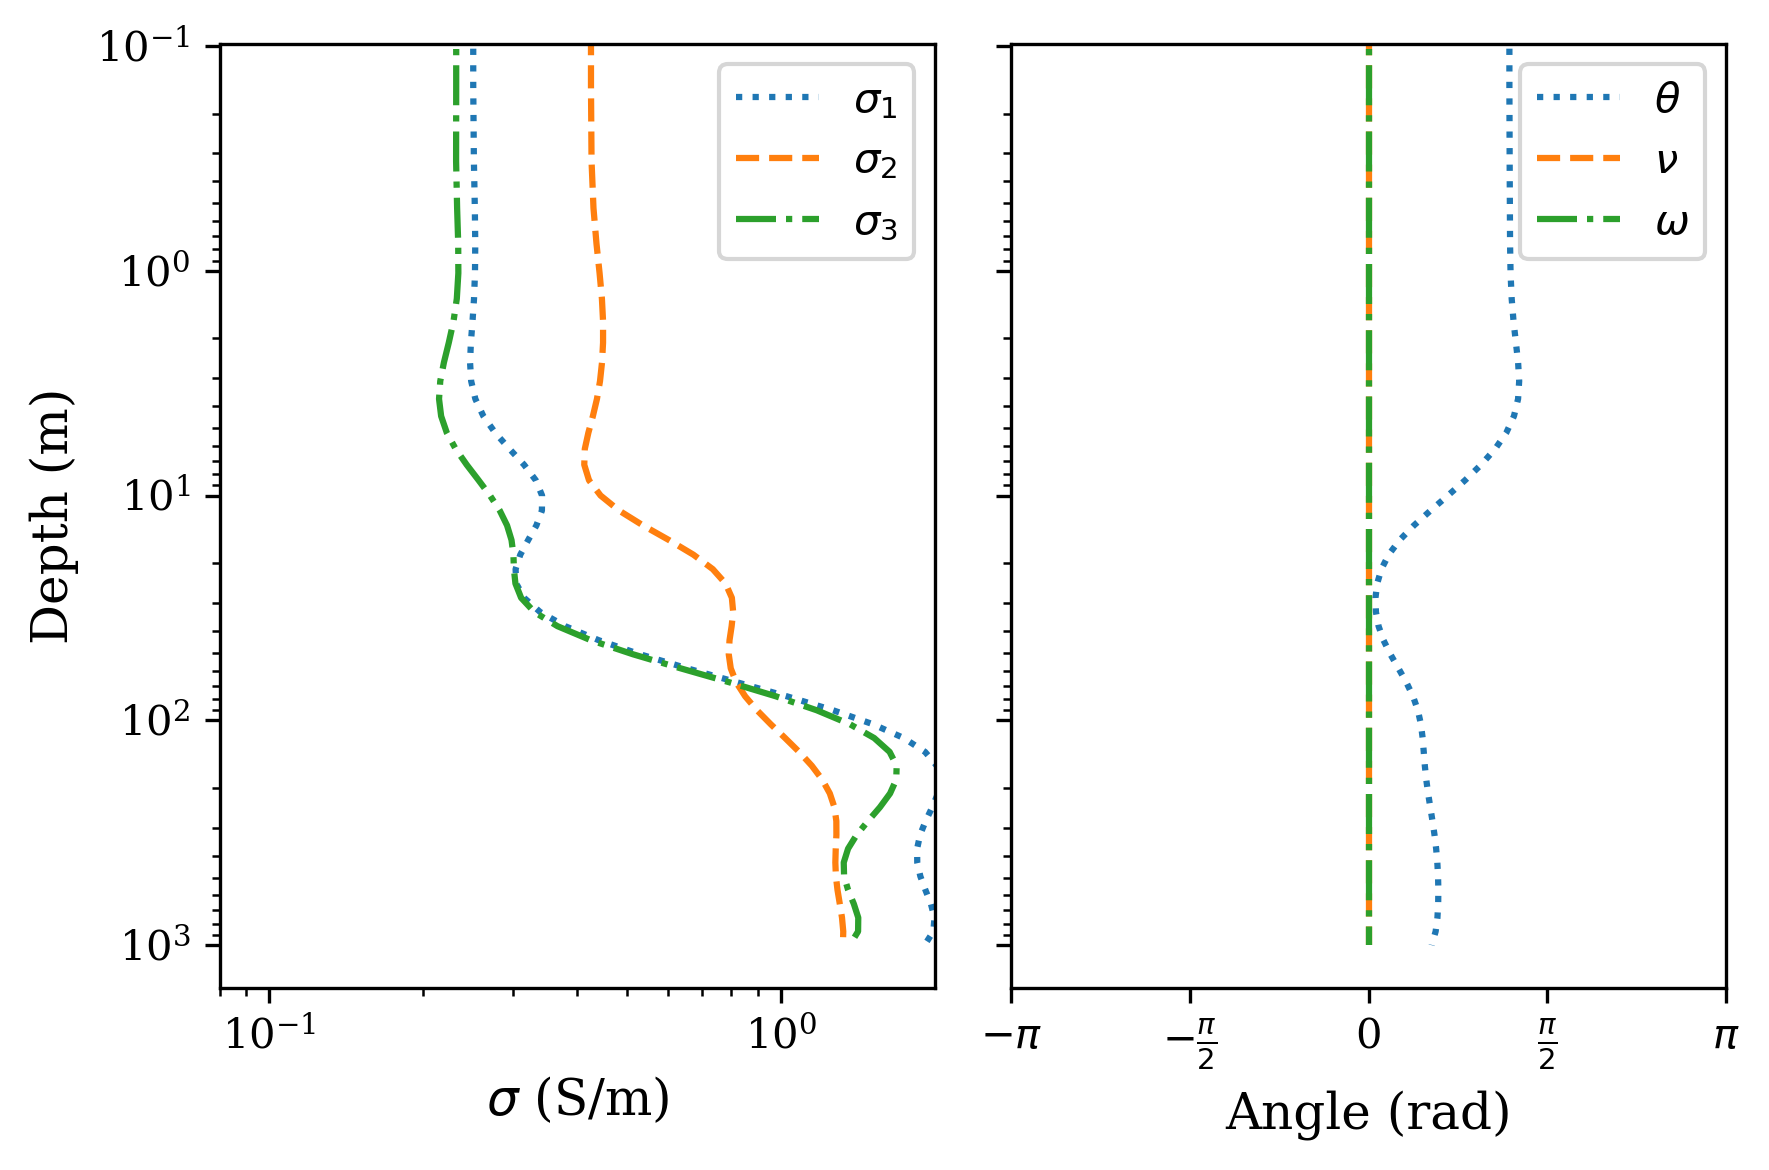

In [50]:
plot_model(m_smooth,zs)

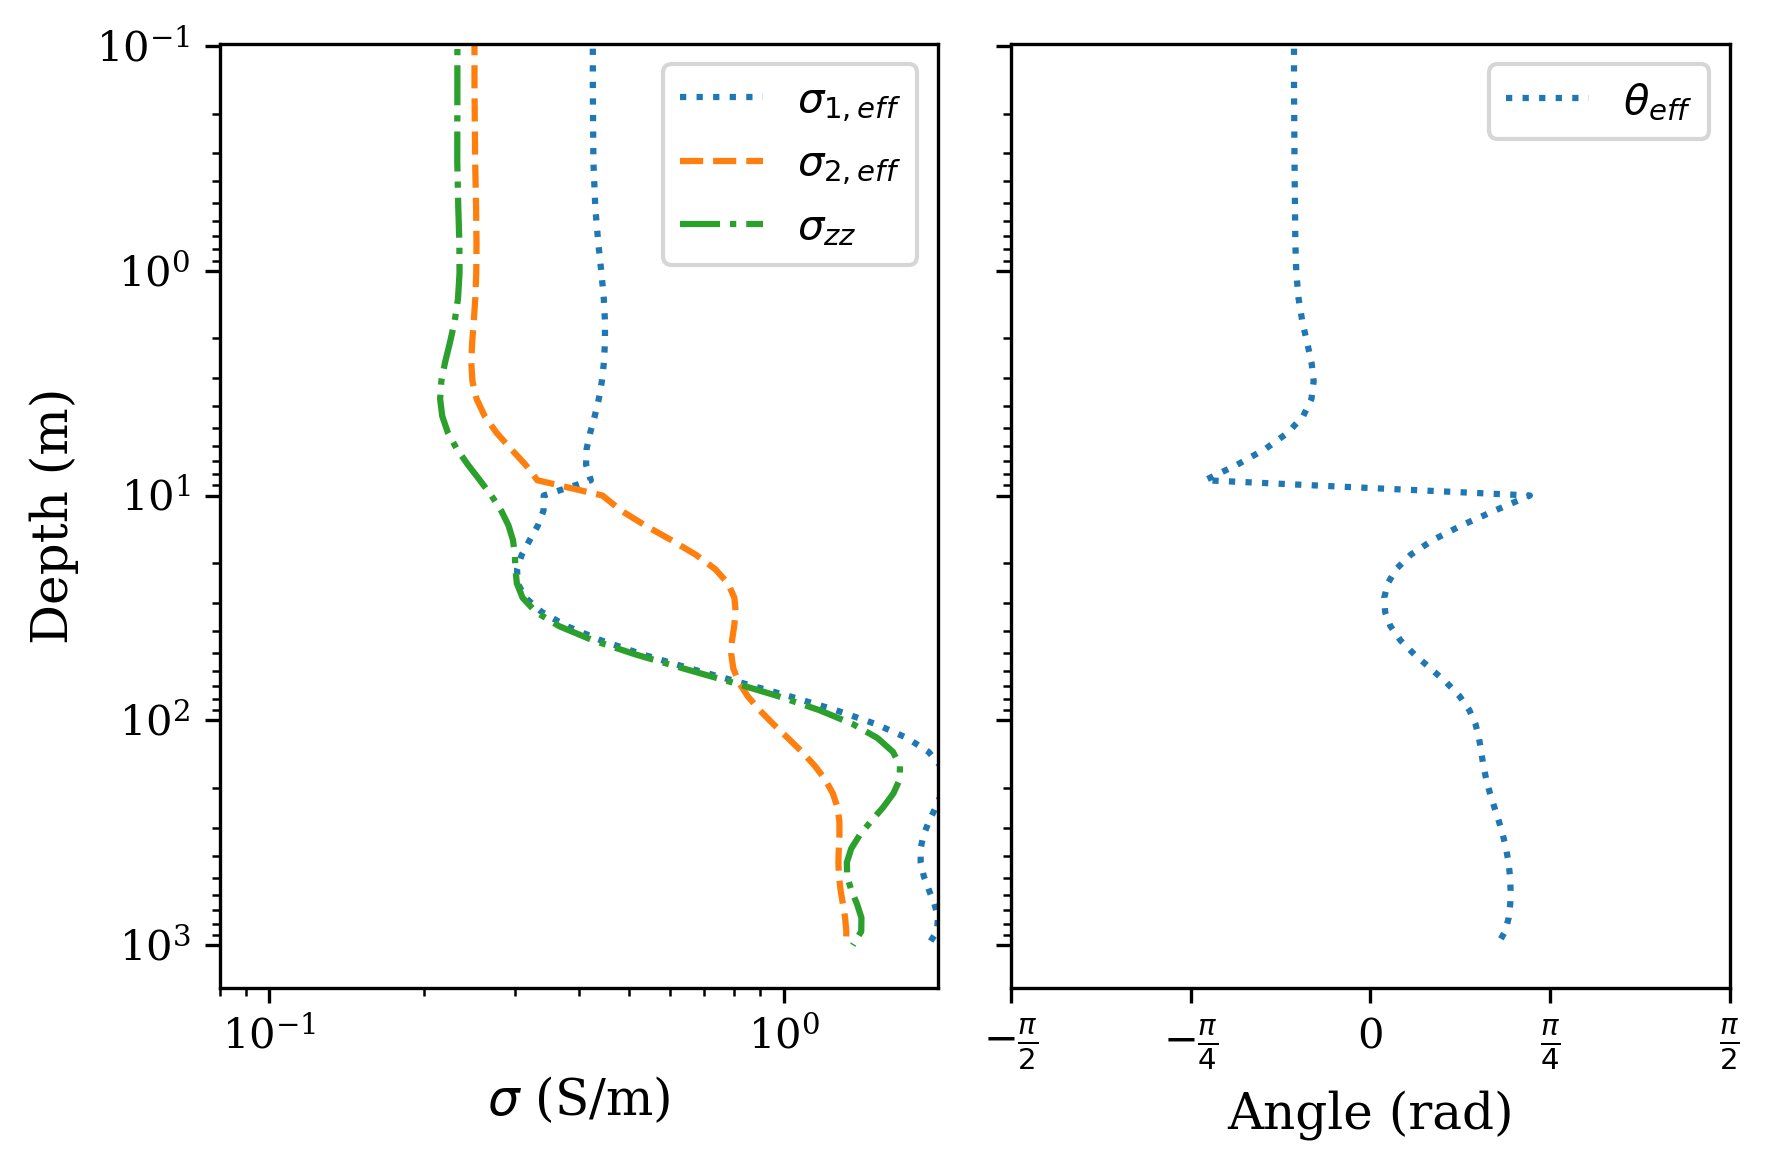

In [51]:
plot_eff_model(m_smooth,zs)

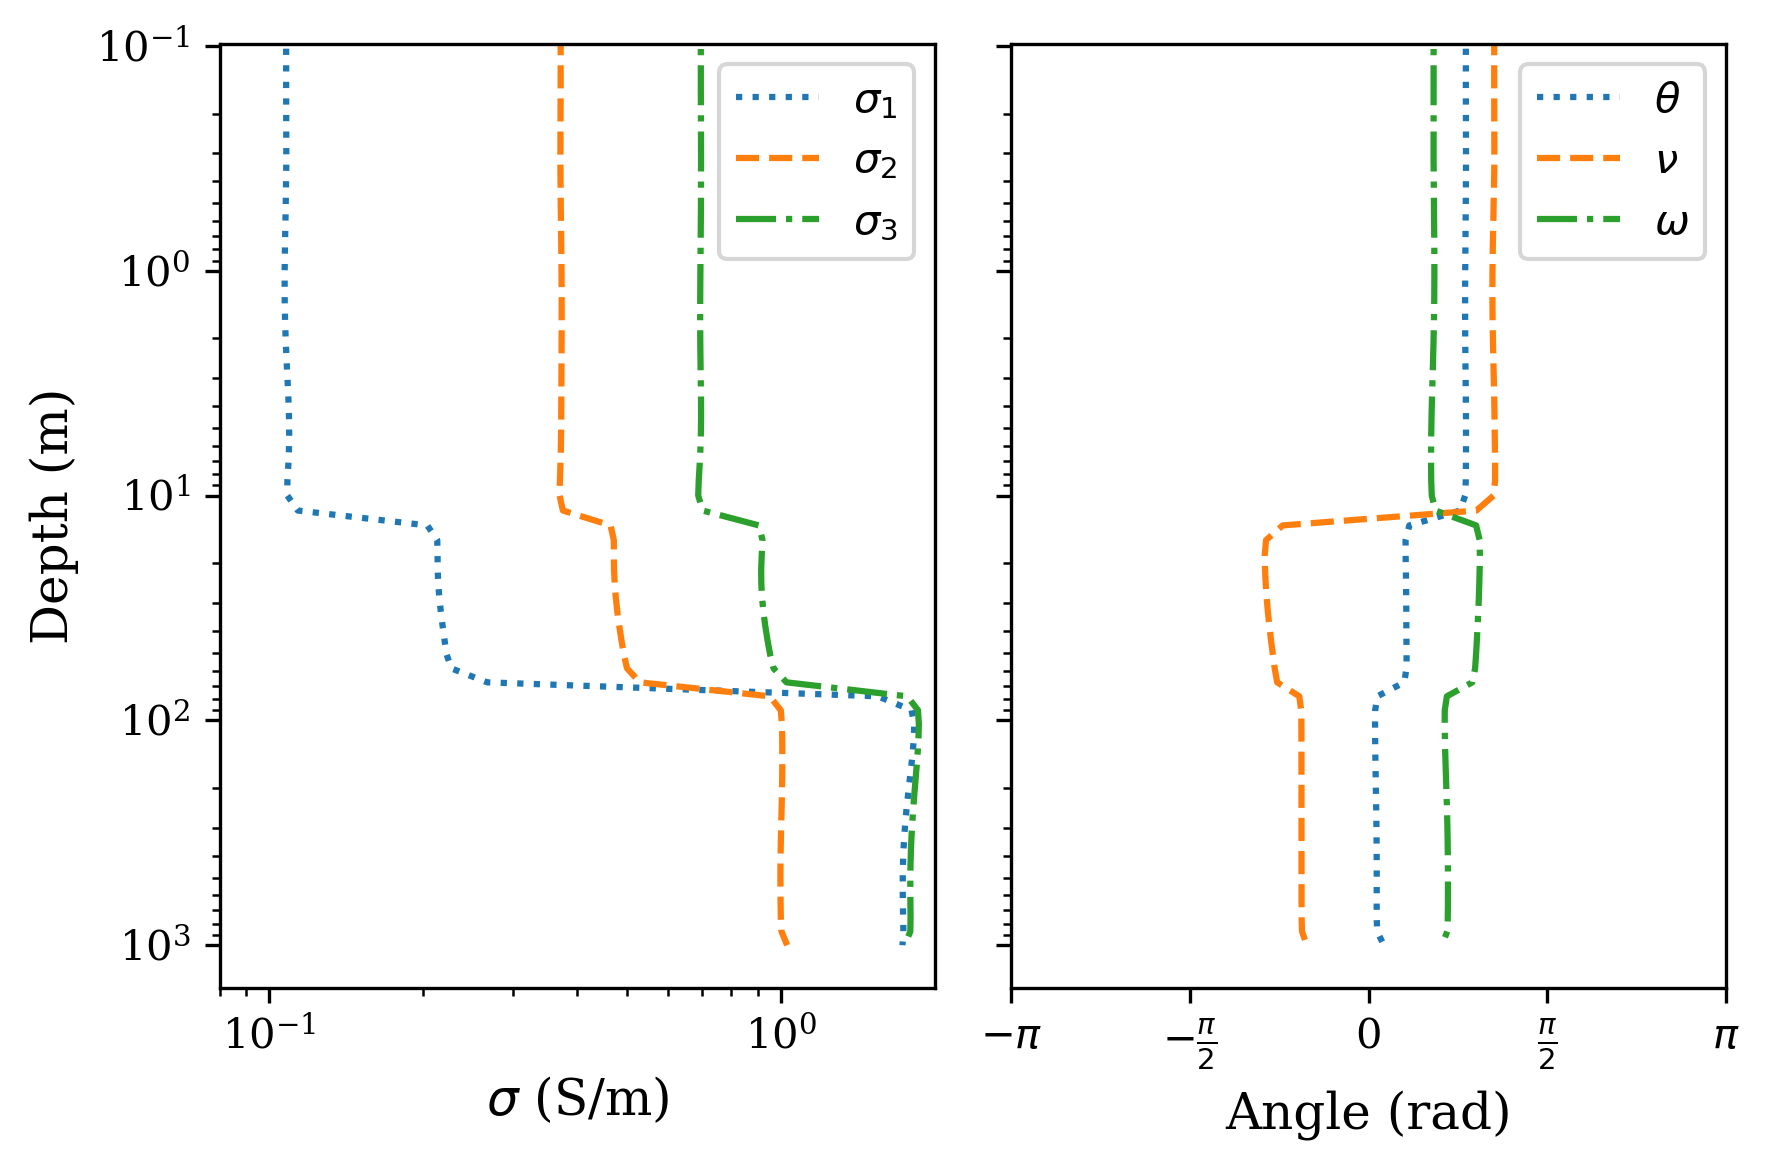

In [52]:
m_fcmE = np.load('Models/mod3/m_fcm_eff.npy').reshape(6,-1)
m_fcmE[:3] = np.exp(m_fcmE[:3])
plot_model(m_fcmE, zs)